<a href="https://colab.research.google.com/github/pinkiepie1811/ESG/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

In [1]:
import pandas as pd

import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords, words
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import string
from collections import Counter

from google.colab import files
uploaded = files.upload()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Saving formresponses.csv to formresponses.csv


In [2]:
responses = pd.read_csv(r'formresponses.csv')

In [3]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [4]:
def noun_str(str):
    noun_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'NN':
            noun_list.append(token[0])
    finalnounq1 = " ".join(noun_list)
    return finalnounq1


# Question 1 Clusters

In [8]:
records = responses.iloc[:, 1].dropna()

In [9]:
# Define the category words
category_words = ['community', 'town', 'small', 'people', 'college']
col1 = responses.iloc[:, 1].dropna()
responses1 = col1.tolist()

# responses['What are things that make you glad to live in Grinnell?  '].dropna()

# Create a dictionary to hold the categories and their corresponding responses
category_responses = {}
for word in category_words:
    category_responses[word] = []

# Loop over each response and assign it to the category with the highest count
for response in responses1:
    counts = {word: response.count(word) for word in category_words}
    max_count = max(counts.values())
    category = [word for word, count in counts.items() if count == max_count][0]
    category_responses[category].append(response)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# extract the text data from the "text" column
text_data = records.values

# Download the stopwords and words from nltk
nltk.download('stopwords')
nltk.download('words')

# remove stop words
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text_data = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_data]    

#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
#https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/

# transform text data into numerical vector
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

#verify by summing all columns, and they should all equal to 1
df.to_csv("Tokenized.csv", sep = ',' )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [11]:
# calculate the cosine similarity matrix
cosine_sim = cosine_similarity(vectors)

# cluster the data based on cosine similarity
kmeans = KMeans(n_clusters=5, random_state=0).fit(cosine_sim)

# Print the cluster labels for each response
labels = kmeans.labels_

# create a dictionary to store the responses in each cluster
k_clusters = {}
for i, label in enumerate(labels):
    if label not in k_clusters:
        k_clusters[label] = []
    k_clusters[label].append(i)

# print the responses in each cluster
for label, first in k_clusters.items():
    print(f"Cluster {label}:")
    print(first)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 4:
[0, 1, 4, 5, 6, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 57, 58, 60, 61, 66, 69, 71, 73, 74, 75, 76, 79, 80, 82, 83, 84, 86, 88, 89, 92, 93, 96, 99, 104, 105, 108, 110, 111, 113, 115, 122, 123, 125, 126, 128, 129, 130, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 151, 152, 154, 157, 158, 159, 162, 163, 166, 168, 172, 174, 175, 176, 177, 178, 179, 181, 182, 183, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 199, 200, 203, 204, 205, 207, 208, 209, 210, 212, 213, 216, 217, 219, 223, 228, 230, 233, 235, 236, 237, 239, 241, 242, 244, 245, 247, 248, 250, 251, 252, 253, 254, 255, 258, 259, 260, 262, 263, 267, 269, 273, 275, 276, 277, 278, 280, 281, 285, 289, 291, 293, 294, 296, 297, 298, 301, 302, 303, 304, 305, 306, 309, 312, 313, 314, 315, 319, 320, 321, 323, 324, 325, 326, 327, 333, 337, 338, 339, 341, 344, 346, 347, 349, 351, 353, 354, 355, 356, 357, 359, 360, 361, 36

In [12]:
#Cluster 
k_cluster0_response = ''
for response in k_clusters[0]:
    k_cluster0_response += " " 
    k_cluster0_response += text_data[response]
    
#Cluster 1
k_cluster1_response = ''
for response in k_clusters[1]:
    k_cluster1_response += " " 
    k_cluster1_response += text_data[response]
 
#k_Cluster 2
k_cluster2_response = ''
for response in k_clusters[2]:
    k_cluster2_response += " " 
    k_cluster2_response += text_data[response]

#k_Cluster 3
k_cluster3_response = ''
for response in k_clusters[3]:
    k_cluster3_response += " " 
    k_cluster3_response += text_data[response]

#k_Cluster 4
k_cluster4_response = ''
for response in k_clusters[4]:
    k_cluster4_response += " " 
    k_cluster4_response += text_data[response]



{'community': 12, 'town': 12, 'size': 1, 'pride': 1, 'vibe': 1, 'activity': 1, 'feel': 1, 'atmosphere': 1}


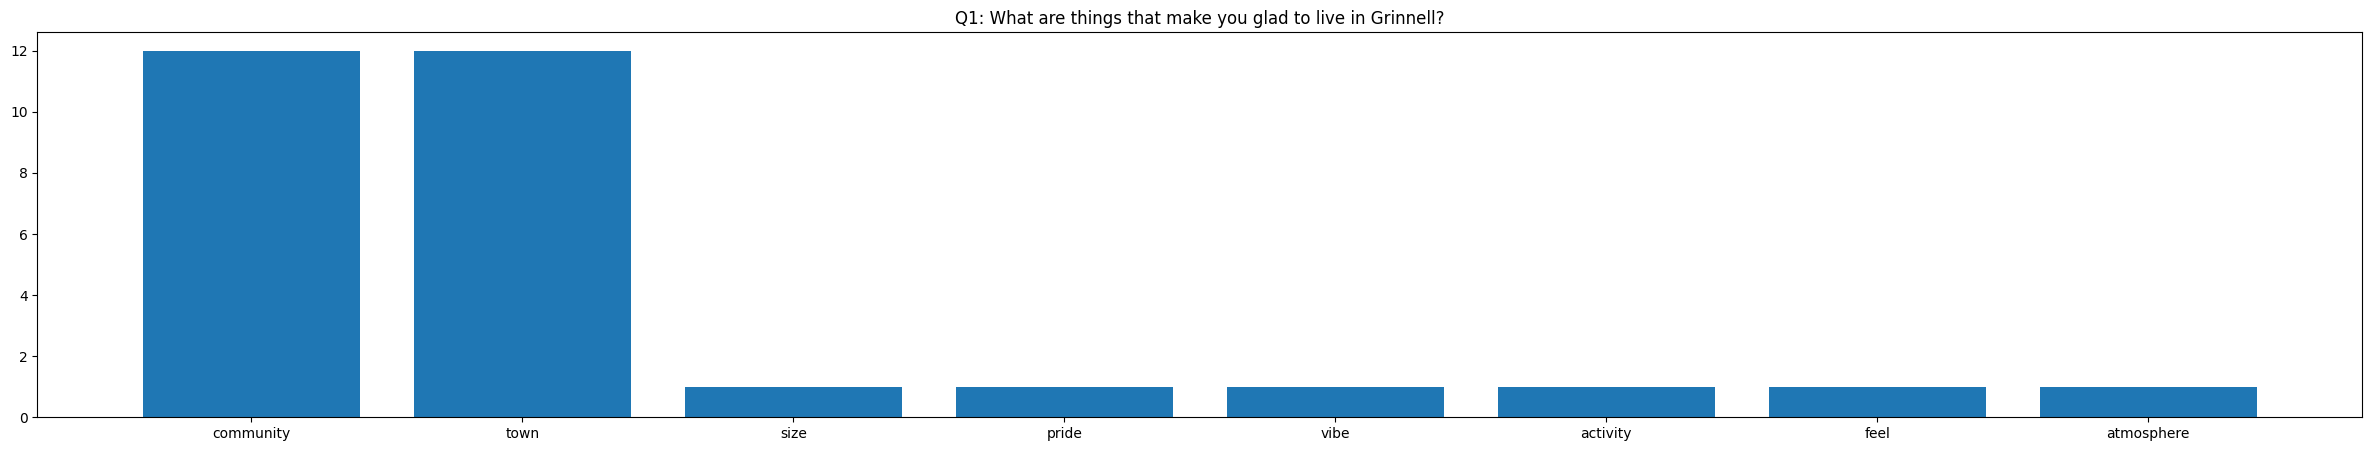

In [13]:
#Nouns count for k mean cluster 1

nounsk1 = noun_str(k_cluster1_response)
nck1 = word_count(nounsk1)
sorted_nouns1 = sorted(nck1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk1 = dict(sorted_nouns1)
print(dict_sorted_nounsk1)

nouns_resultk1 = {key:value for (key, value) in dict_sorted_nounsk1.items()}

nouns_keyk1 = list(nouns_resultk1.keys())
nouns_countsk1 = list(nouns_resultk1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk1)), nouns_countsk1, tick_label=nouns_keyk1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'community': 8, 'lot': 4, 'event': 3, 'town': 3, 'traffic': 3, 'college': 3, 'activity': 3, 'diversity': 2, 'student': 2, 'business': 2, 'walk': 1, 'place': 1, 'world': 1, 'playground': 1, 'walkability': 1, 'neighbor': 1, 'get': 1, 'color': 1, 'lack': 1, 'downtown': 1, 'connection': 1, 'area': 1, 'sledding': 1, 'hill': 1, 'art': 1, 'park': 1, 'kid': 1, 'school': 1, 'store': 1, 'church': 1, 'committee': 1, 'group': 1, 'work': 1, 'need': 1, 'property': 1, 'size': 1, 'willingness': 1, 'crime': 1, 'rate': 1, 'culture': 1, 'kind': 1, 'caring': 1, 'space': 1, 'campus': 1}


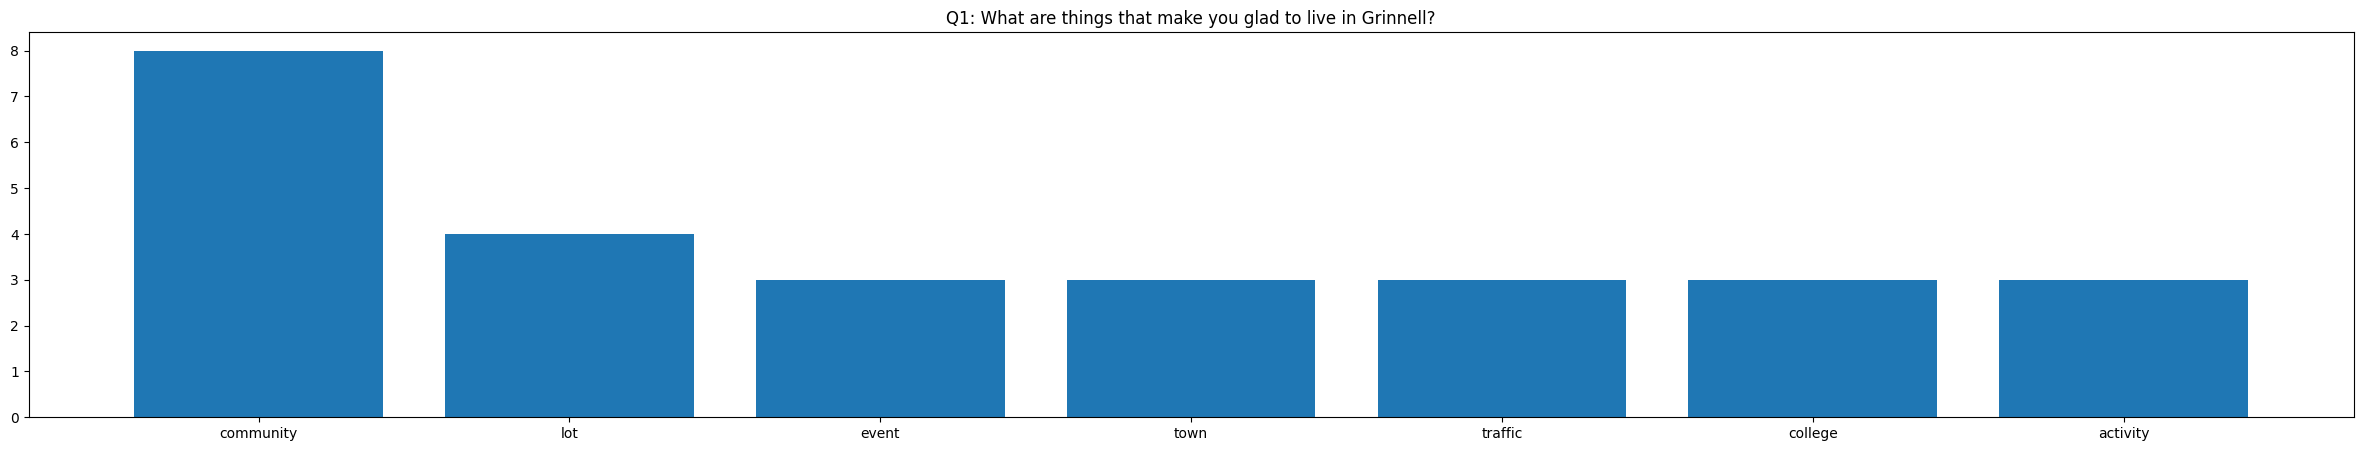

In [14]:
#Nouns count for k mean cluster 0

nounsk0 = noun_str(k_cluster0_response)
nck0 = word_count(nounsk0)
sorted_nouns0 = sorted(nck0.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk0 = dict(sorted_nouns0)
print(dict_sorted_nounsk0)

nouns_resultk0 = {key:value for (key, value) in dict_sorted_nounsk0.items() if value > 2}

nouns_keyk0 = list(nouns_resultk0.keys())
nouns_countsk0 = list(nouns_resultk0.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk0)), nouns_countsk0, tick_label=nouns_keyk0)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

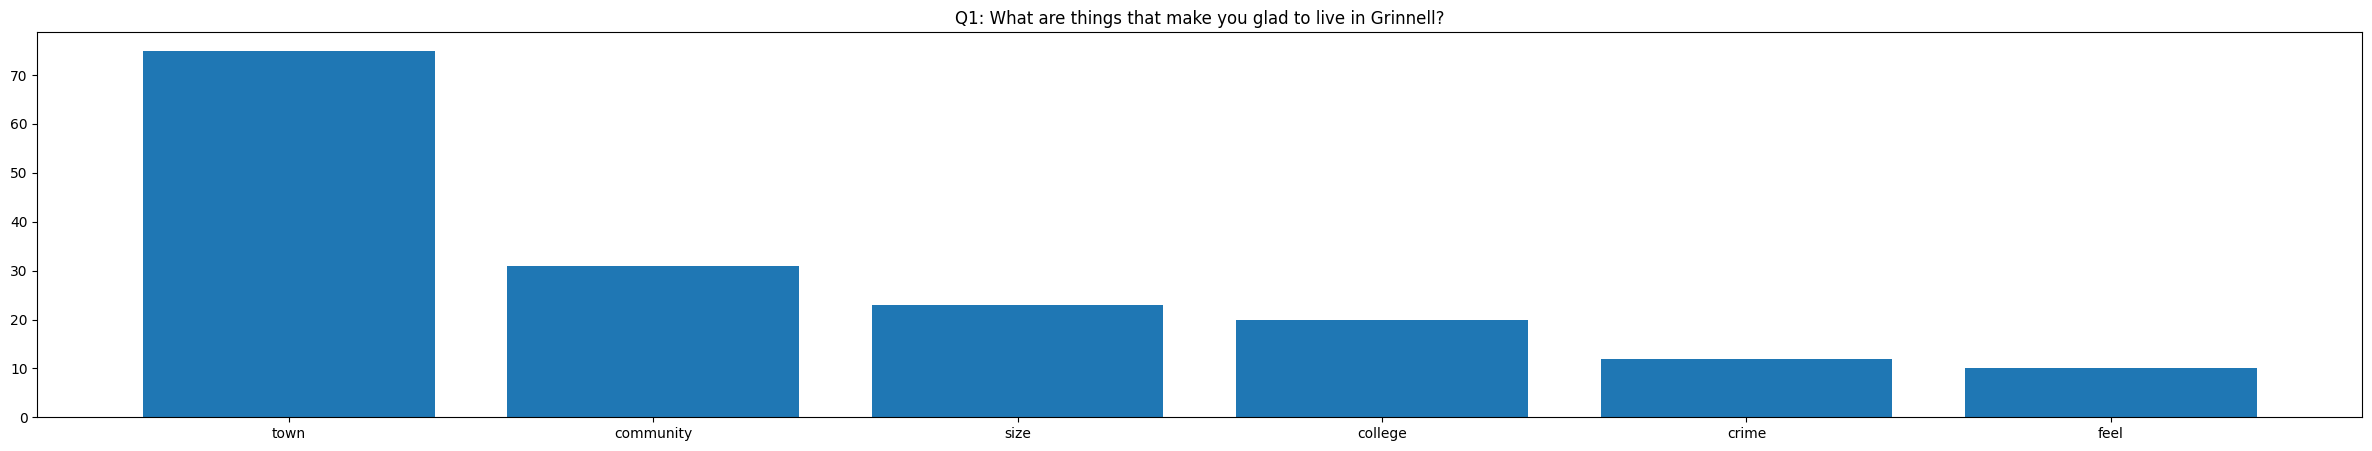

In [15]:
#Nouns count for k mean cluster 2
nounsk2 = noun_str(k_cluster2_response)
nck2 = word_count(nounsk2)
sorted_nouns2 = sorted(nck2.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk2 = dict(sorted_nouns2)
print(dict_sorted_nounsk2)

nouns_resultk2 = {key:value for (key, value) in dict_sorted_nounsk2.items() if value > 9}

nouns_keyk2 = list(nouns_resultk2.keys())
nouns_countsk2 = list(nouns_resultk2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk2)), nouns_countsk2, tick_label=nouns_keyk2)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'family': 19, 'community': 6, 'friend': 5, 'shop': 3, 'pizza': 3, 'school': 3, 'town': 2, 'restaurant': 2, 'year': 2, 'history': 1, 'sport': 1, 'opportunity': 1, 'farm': 1, 'job': 1, 'neighborhood': 1, 'park': 1, 'lot': 1, 'place': 1, 'life': 1, 'grow': 1, 'grinnell': 1, 'play': 1, 'date': 1, '-Dari': 1, 'cream': 1, 'donut': 1, 'house': 1, '-The': 1, 'wall': 1, 'bell': 1, 'room': 1, 'run': 1, 'sleepover': 1, '-Nobody': 1}


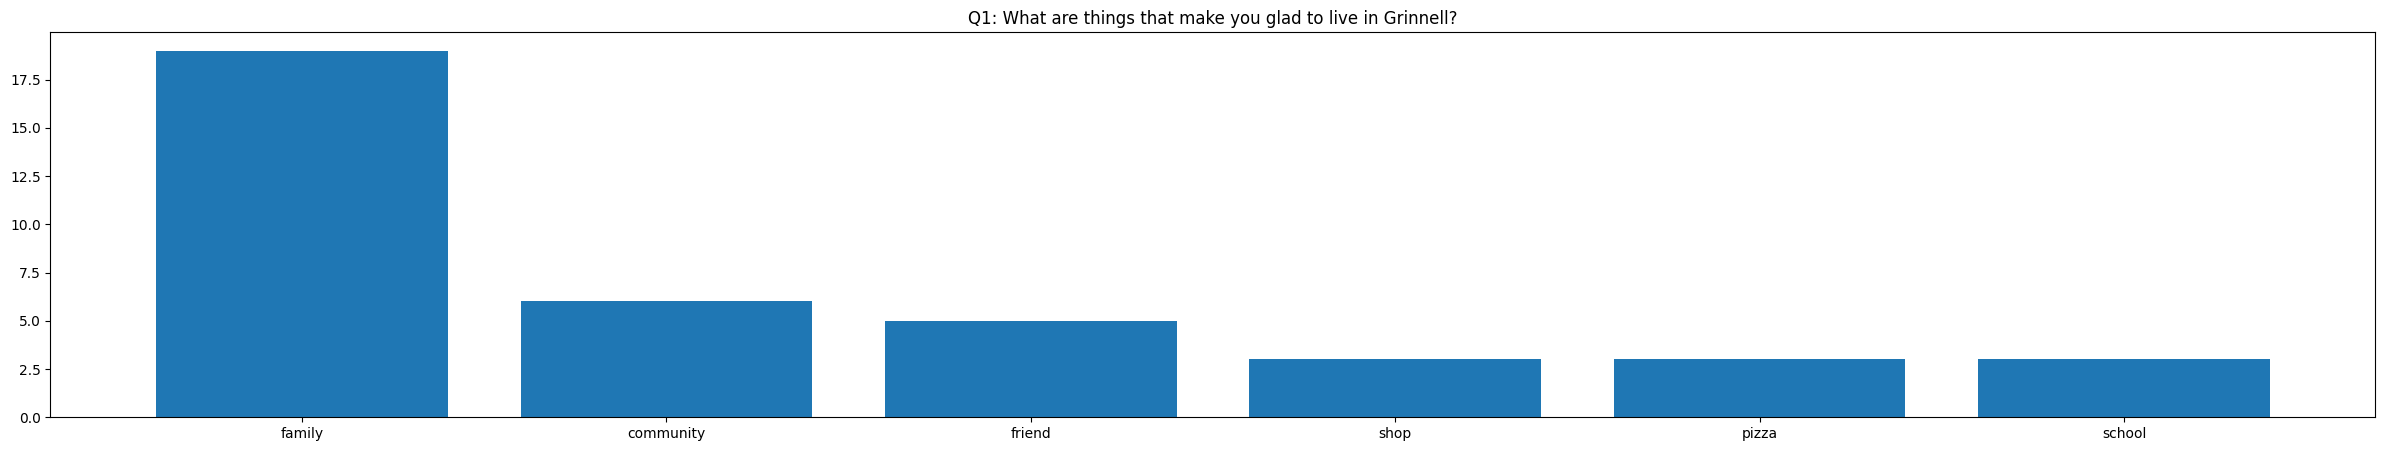

In [16]:
#Nouns count for k mean cluster 3
nounsk3 = noun_str(k_cluster3_response)
nck3 = word_count(nounsk3)
sorted_nouns3 = sorted(nck3.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk3 = dict(sorted_nouns3)
print(dict_sorted_nounsk3)

nouns_resultk3 = {key:value for (key, value) in dict_sorted_nounsk3.items() if value > 2}

nouns_keyk3 = list(nouns_resultk3.keys())
nouns_countsk3 = list(nouns_resultk3.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk3)), nouns_countsk3, tick_label=nouns_keyk3)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'community': 88, 'park': 32, 'college': 28, 'town': 25, 'school': 22, 'event': 18, 'opportunity': 17, 'restaurant': 16, 'place': 16, 'downtown': 16, 'size': 14, 'city': 14, 'art': 13, 'lot': 12, 'work': 12, 'market': 12, 'service': 12, 'thing': 12, 'store': 11, 'option': 11, 'farmer': 10, 'access': 10, 'friend': 10, 'resource': 9, 'year': 9, 'time': 9, 'family': 9, 'traffic': 9, 'music': 8, 'activity': 8, 'care': 8, 'business': 8, 'living': 8, 'summer': 7, 'history': 7, 'shop': 7, 'student': 7, 'sense': 7, 'area': 7, 'center': 7, 'diversity': 7, 'crime': 7, 'campus': 7, 'quality': 6, 'library': 6, 'variety': 6, 'home': 6, 'recreation': 6, 'space': 6, 'cost': 6, 'day': 6, 'hospital': 6, 'neighborhood': 5, 'location': 5, 'get': 5, 'neighbor': 5, 'life': 5, 'distance': 5, 'need': 5, 'job': 5, 'housing': 4, 'everyone': 4, 'drive': 4, 'facility': 4, 'help': 4, 'commute': 4, 'group': 4, 'movie': 4, 'safety': 4, 'member': 4, 'retirement': 4, 'everything': 4, 'museum': 4, 'walkability': 4, 'f

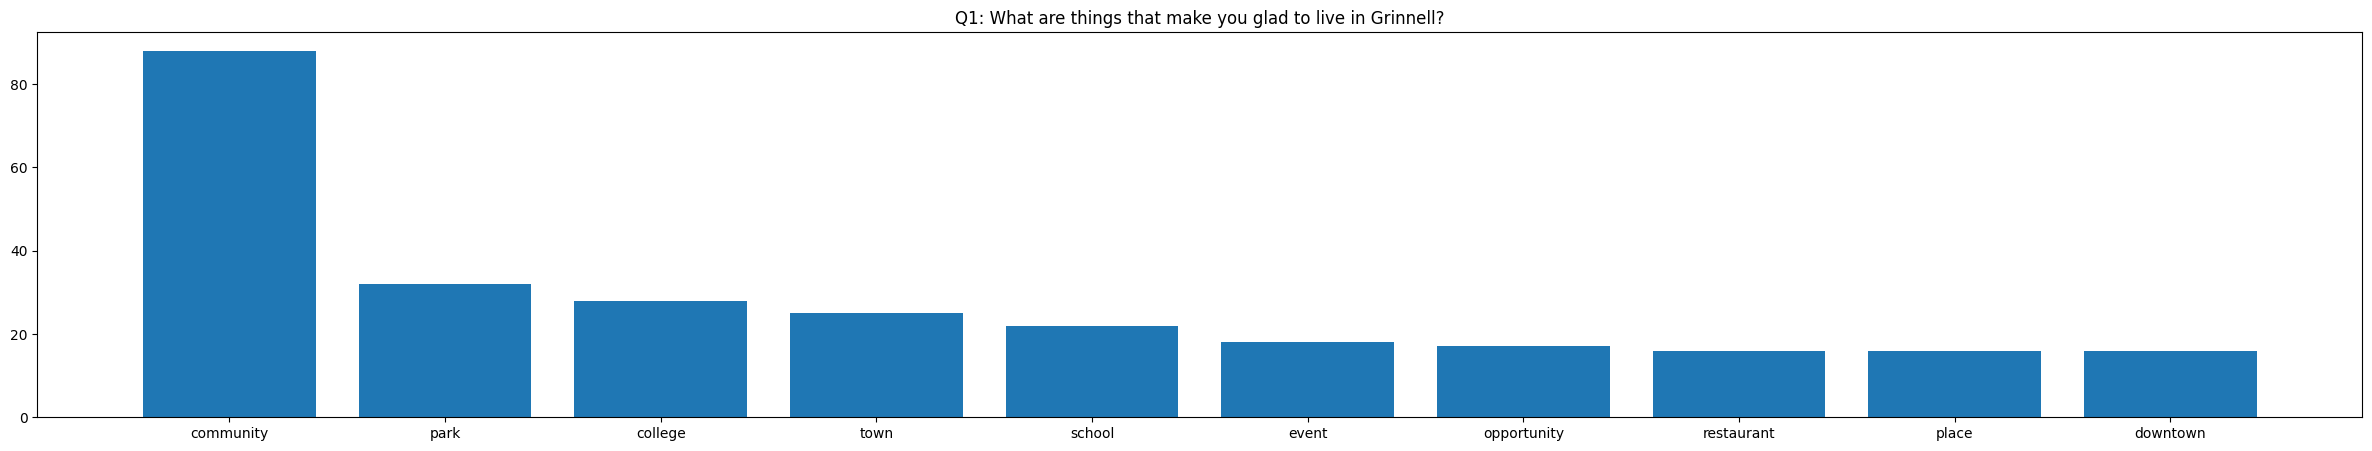

In [17]:
#Nouns count for k mean cluster 4
nounsk4 = noun_str(k_cluster4_response)
nck4 = word_count(nounsk4)
sorted_nouns4 = sorted(nck4.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk4 = dict(sorted_nouns4)
print(dict_sorted_nounsk4)

nouns_resultk4 = {key:value for (key, value) in dict_sorted_nounsk4.items() if value > 15}

nouns_keyk4 = list(nouns_resultk4.keys())
nouns_countsk4 = list(nouns_resultk4.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk4)), nouns_countsk4, tick_label=nouns_keyk4)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

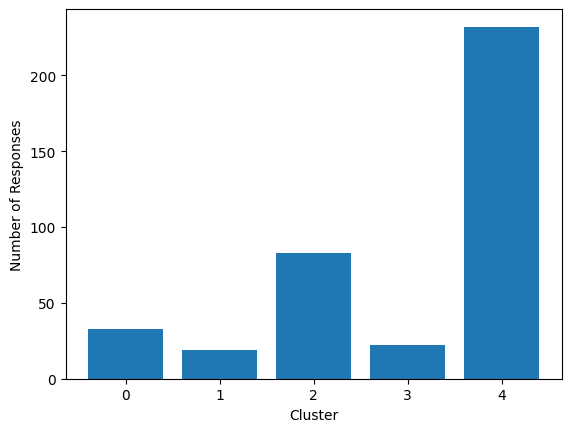

In [18]:
import matplotlib.pyplot as plt

# Create histogram showing cluster sizes
cluster_sizes = [sum(labels == i) for i in range(kmeans.n_clusters)]
plt.bar(range(kmeans.n_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Responses')
plt.show()


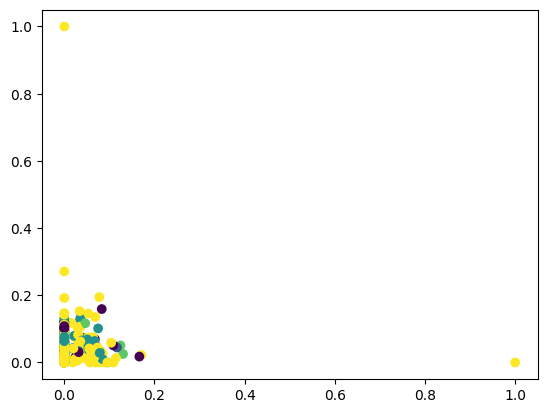

In [19]:
import matplotlib.pyplot as plt

# visualize the clustering results
plt.scatter(cosine_sim[:, 0], cosine_sim[:, 1], c=kmeans.labels_)
plt.show()

#do pca to find axis. the derived dimensioin captures where there is maximal variation between data points
# dimension where there is most variation
# number of pca is the same as no. of variables

#get a rotation matrix

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# calculate the pairwise distance matrix
distance_matrix = 1 - np.array(cosine_similarity(vectors))

# apply agglomerative clustering
Z = linkage(distance_matrix, method='ward')
labels = fcluster(Z, t=6, criterion='maxclust')



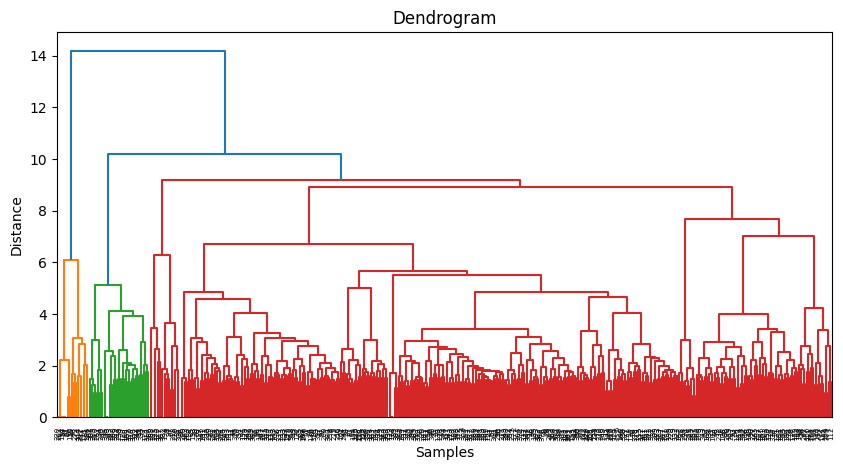

In [21]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

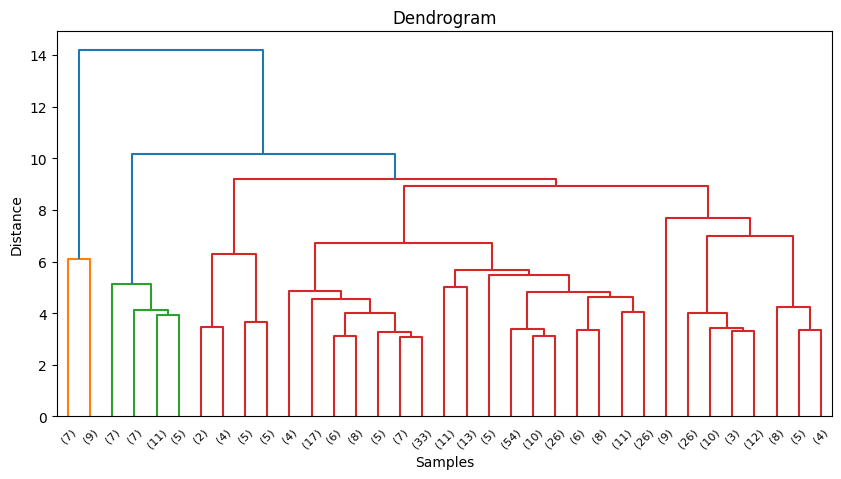

In [22]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
#truncated to 35 responses
dn = dendrogram(Z, truncate_mode='lastp', p=35)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [23]:
first = responses.iloc[:, 1].dropna().tolist()

# create a dictionary to store the responses in each cluster
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

# print the responses in each cluster
for label, first in clusters.items():
    print(f"Cluster {label}:")
    print(first)
    print()

Cluster 4:
[0, 1, 2, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 27, 28, 29, 30, 32, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 57, 58, 60, 61, 65, 66, 69, 71, 73, 74, 75, 76, 80, 82, 83, 84, 86, 88, 89, 92, 93, 94, 95, 96, 99, 102, 104, 105, 107, 108, 109, 111, 115, 118, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 151, 152, 153, 154, 157, 158, 161, 162, 163, 166, 168, 171, 172, 174, 176, 177, 178, 179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 195, 196, 197, 199, 200, 204, 208, 209, 212, 213, 215, 216, 217, 219, 222, 223, 228, 230, 233, 235, 236, 237, 238, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 258, 259, 260, 263, 267, 269, 270, 273, 275, 276, 277, 278, 279, 280, 281, 283, 285, 287, 289, 291, 293, 294, 296, 297, 298, 299, 301, 302, 303, 304, 306, 309, 312, 313, 314, 315, 318, 319, 320, 321, 323, 324, 325, 326, 327, 328, 333, 337, 338, 339, 341, 346, 347

In [24]:
#Cluster 
k_cluster0_response = ''
for response in k_clusters[0]:
    k_cluster0_response += " " 
    k_cluster0_response += text_data[response]
    
#Cluster 1
k_cluster1_response = ''
for response in k_clusters[1]:
    k_cluster1_response += " " 
    k_cluster1_response += text_data[response]
 
#k_Cluster 2
k_cluster2_response = ''
for response in k_clusters[2]:
    k_cluster2_response += " " 
    k_cluster2_response += text_data[response]

#k_Cluster 3
k_cluster3_response = ''
for response in k_clusters[3]:
    k_cluster3_response += " " 
    k_cluster3_response += text_data[response]

#k_Cluster 4
k_cluster4_response = ''
for response in k_clusters[4]:
    k_cluster4_response += " " 
    k_cluster4_response += text_data[response]

{'community': 8, 'lot': 4, 'event': 3, 'town': 3, 'traffic': 3, 'college': 3, 'activity': 3, 'diversity': 2, 'student': 2, 'business': 2, 'walk': 1, 'place': 1, 'world': 1, 'playground': 1, 'walkability': 1, 'neighbor': 1, 'get': 1, 'color': 1, 'lack': 1, 'downtown': 1, 'connection': 1, 'area': 1, 'sledding': 1, 'hill': 1, 'art': 1, 'park': 1, 'kid': 1, 'school': 1, 'store': 1, 'church': 1, 'committee': 1, 'group': 1, 'work': 1, 'need': 1, 'property': 1, 'size': 1, 'willingness': 1, 'crime': 1, 'rate': 1, 'culture': 1, 'kind': 1, 'caring': 1, 'space': 1, 'campus': 1}


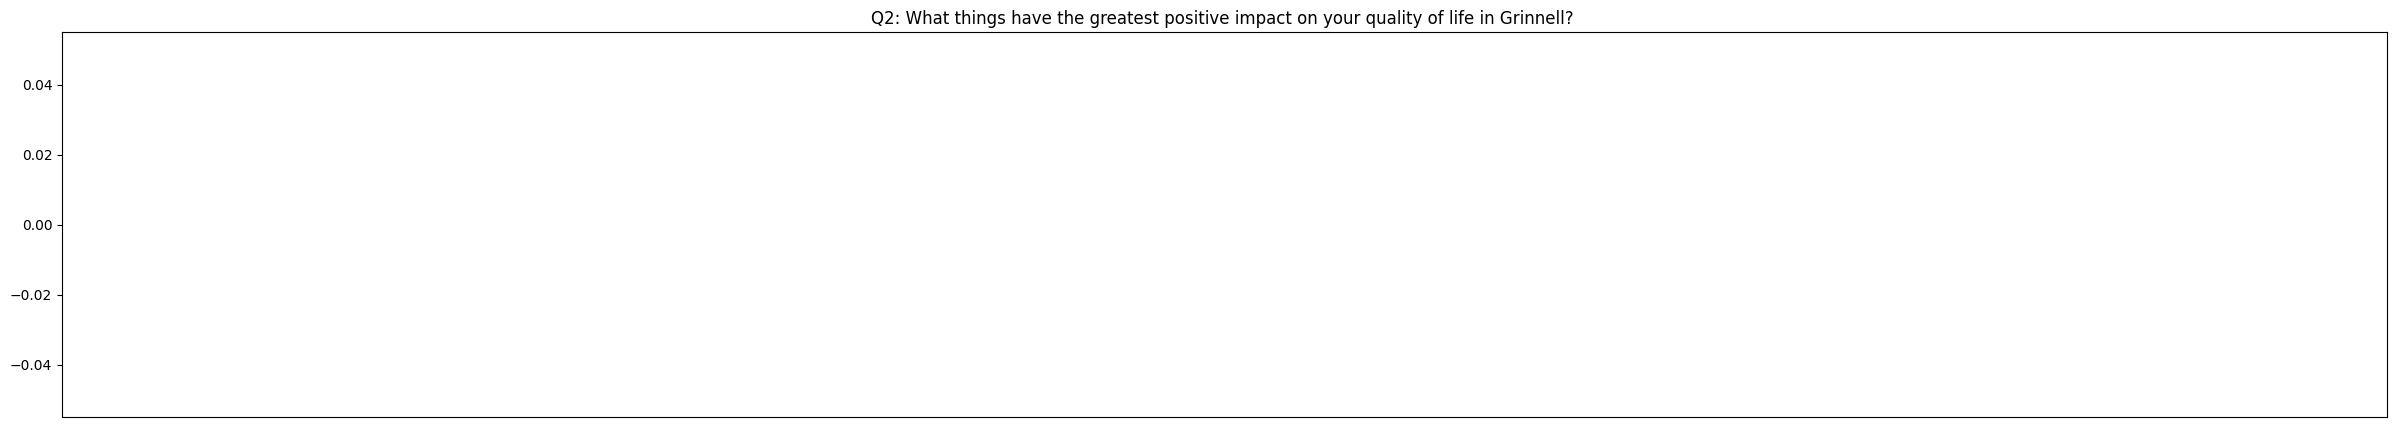

In [25]:
#Nouns count for k mean cluster 0

nounsk0 = noun_str(k_cluster0_response)
nck0 = word_count(nounsk0)
sorted_nouns0 = sorted(nck0.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk0 = dict(sorted_nouns0)
print(dict_sorted_nounsk0)

nouns_resultk0 = {key:value for (key, value) in dict_sorted_nounsk0.items() if value > 15}

nouns_keyk0 = list(nouns_resultk0.keys())
nouns_countsk0 = list(nouns_resultk0.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk0)), nouns_countsk0, tick_label=nouns_keyk0)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell? ")
plt.show()

{'community': 12, 'town': 12, 'size': 1, 'pride': 1, 'vibe': 1, 'activity': 1, 'feel': 1, 'atmosphere': 1}


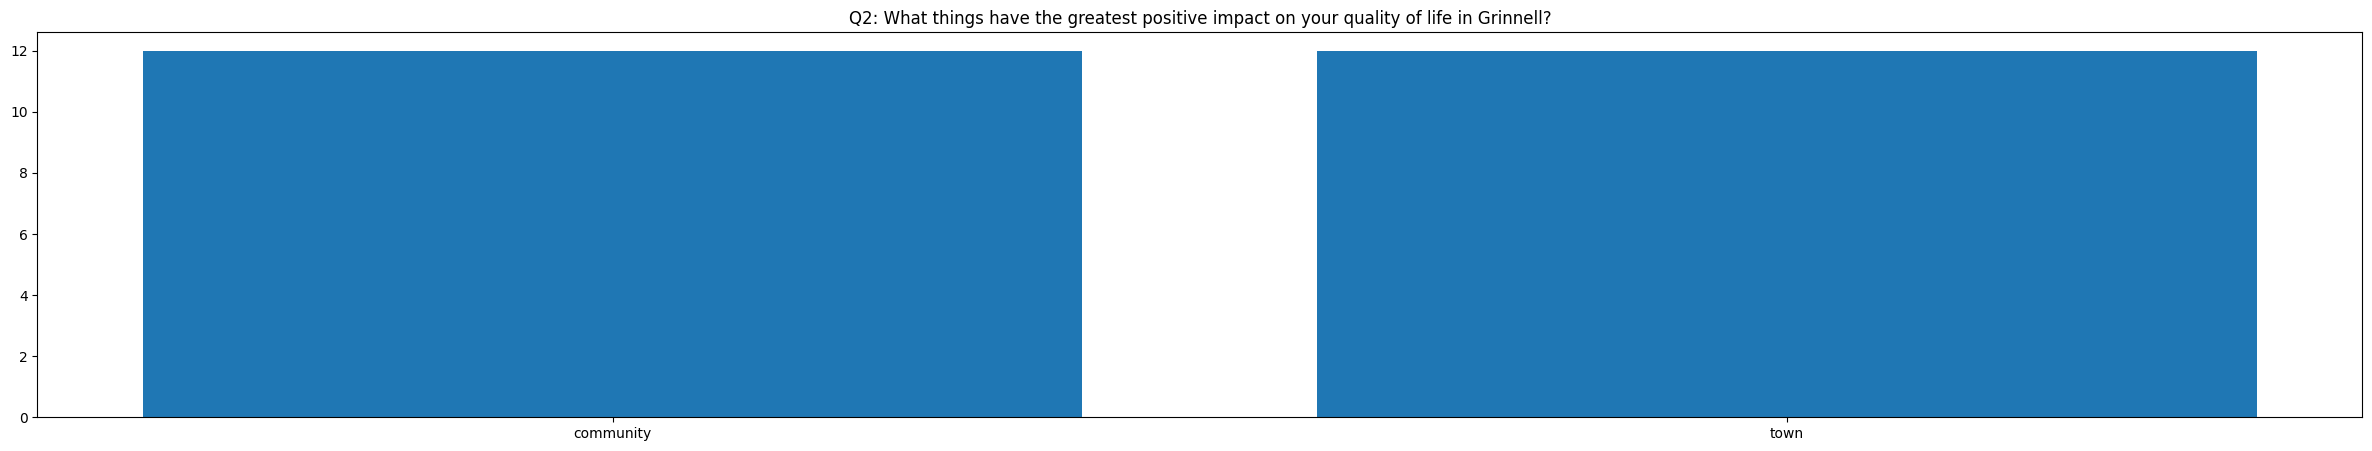

In [26]:
#Nouns count for k mean cluster 1

nounsk1 = noun_str(k_cluster1_response)
nck1 = word_count(nounsk1)
sorted_nouns1 = sorted(nck1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk1 = dict(sorted_nouns1)
print(dict_sorted_nounsk1)

nouns_resultk1 = {key:value for (key, value) in dict_sorted_nounsk1.items() if value > 4}

nouns_keyk1 = list(nouns_resultk1.keys())
nouns_countsk1 = list(nouns_resultk1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk1)), nouns_countsk1, tick_label=nouns_keyk1)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

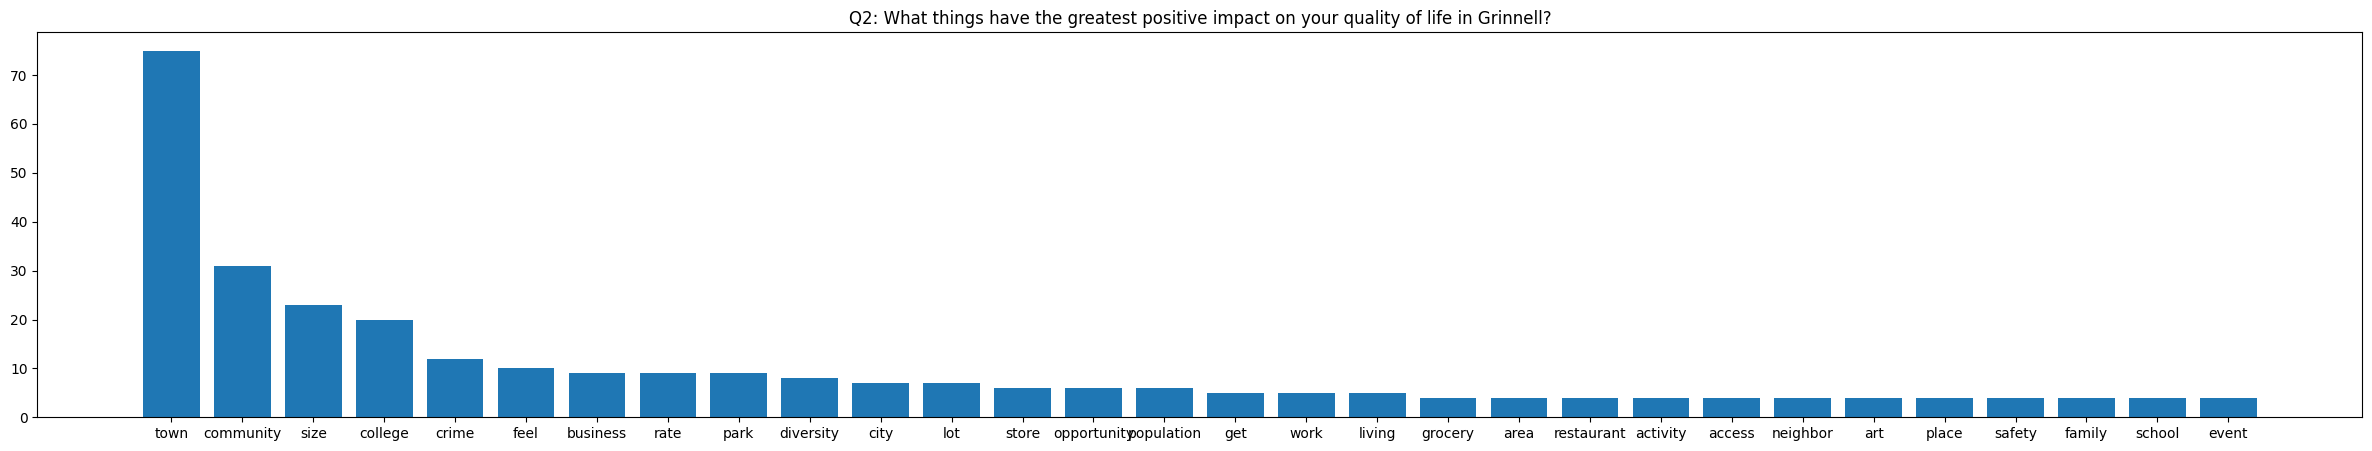

In [27]:
#Nouns count for k mean cluster 2

nounsk2 = noun_str(k_cluster2_response)
nck2 = word_count(nounsk2)
sorted_nouns2 = sorted(nck2.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk2 = dict(sorted_nouns2)
print(dict_sorted_nounsk2)

nouns_resultk2 = {key:value for (key, value) in dict_sorted_nounsk2.items() if value > 3}

nouns_keyk2 = list(nouns_resultk2.keys())
nouns_countsk2 = list(nouns_resultk2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk2)), nouns_countsk2, tick_label=nouns_keyk2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'family': 19, 'community': 6, 'friend': 5, 'shop': 3, 'pizza': 3, 'school': 3, 'town': 2, 'restaurant': 2, 'year': 2, 'history': 1, 'sport': 1, 'opportunity': 1, 'farm': 1, 'job': 1, 'neighborhood': 1, 'park': 1, 'lot': 1, 'place': 1, 'life': 1, 'grow': 1, 'grinnell': 1, 'play': 1, 'date': 1, '-Dari': 1, 'cream': 1, 'donut': 1, 'house': 1, '-The': 1, 'wall': 1, 'bell': 1, 'room': 1, 'run': 1, 'sleepover': 1, '-Nobody': 1}


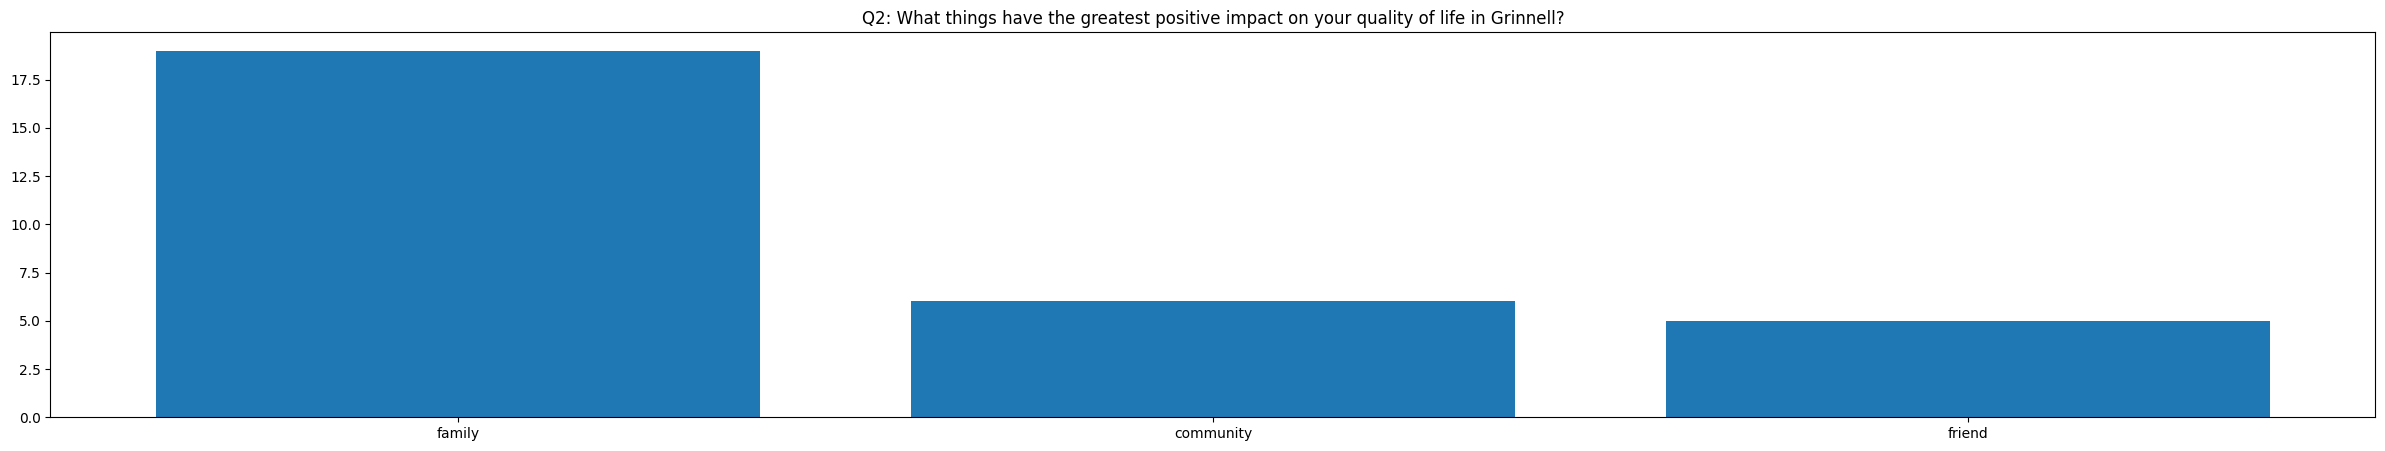

In [28]:
#Nouns count for k mean cluster 3

nounsk3 = noun_str(k_cluster3_response)
nck3 = word_count(nounsk3)
sorted_nouns3 = sorted(nck3.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk3 = dict(sorted_nouns3)
print(dict_sorted_nounsk3)

nouns_resultk3 = {key:value for (key, value) in dict_sorted_nounsk3.items() if value > 3}

nouns_keyk3 = list(nouns_resultk3.keys())
nouns_countsk3 = list(nouns_resultk3.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk3)), nouns_countsk3, tick_label=nouns_keyk3)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'community': 88, 'park': 32, 'college': 28, 'town': 25, 'school': 22, 'event': 18, 'opportunity': 17, 'restaurant': 16, 'place': 16, 'downtown': 16, 'size': 14, 'city': 14, 'art': 13, 'lot': 12, 'work': 12, 'market': 12, 'service': 12, 'thing': 12, 'store': 11, 'option': 11, 'farmer': 10, 'access': 10, 'friend': 10, 'resource': 9, 'year': 9, 'time': 9, 'family': 9, 'traffic': 9, 'music': 8, 'activity': 8, 'care': 8, 'business': 8, 'living': 8, 'summer': 7, 'history': 7, 'shop': 7, 'student': 7, 'sense': 7, 'area': 7, 'center': 7, 'diversity': 7, 'crime': 7, 'campus': 7, 'quality': 6, 'library': 6, 'variety': 6, 'home': 6, 'recreation': 6, 'space': 6, 'cost': 6, 'day': 6, 'hospital': 6, 'neighborhood': 5, 'location': 5, 'get': 5, 'neighbor': 5, 'life': 5, 'distance': 5, 'need': 5, 'job': 5, 'housing': 4, 'everyone': 4, 'drive': 4, 'facility': 4, 'help': 4, 'commute': 4, 'group': 4, 'movie': 4, 'safety': 4, 'member': 4, 'retirement': 4, 'everything': 4, 'museum': 4, 'walkability': 4, 'f

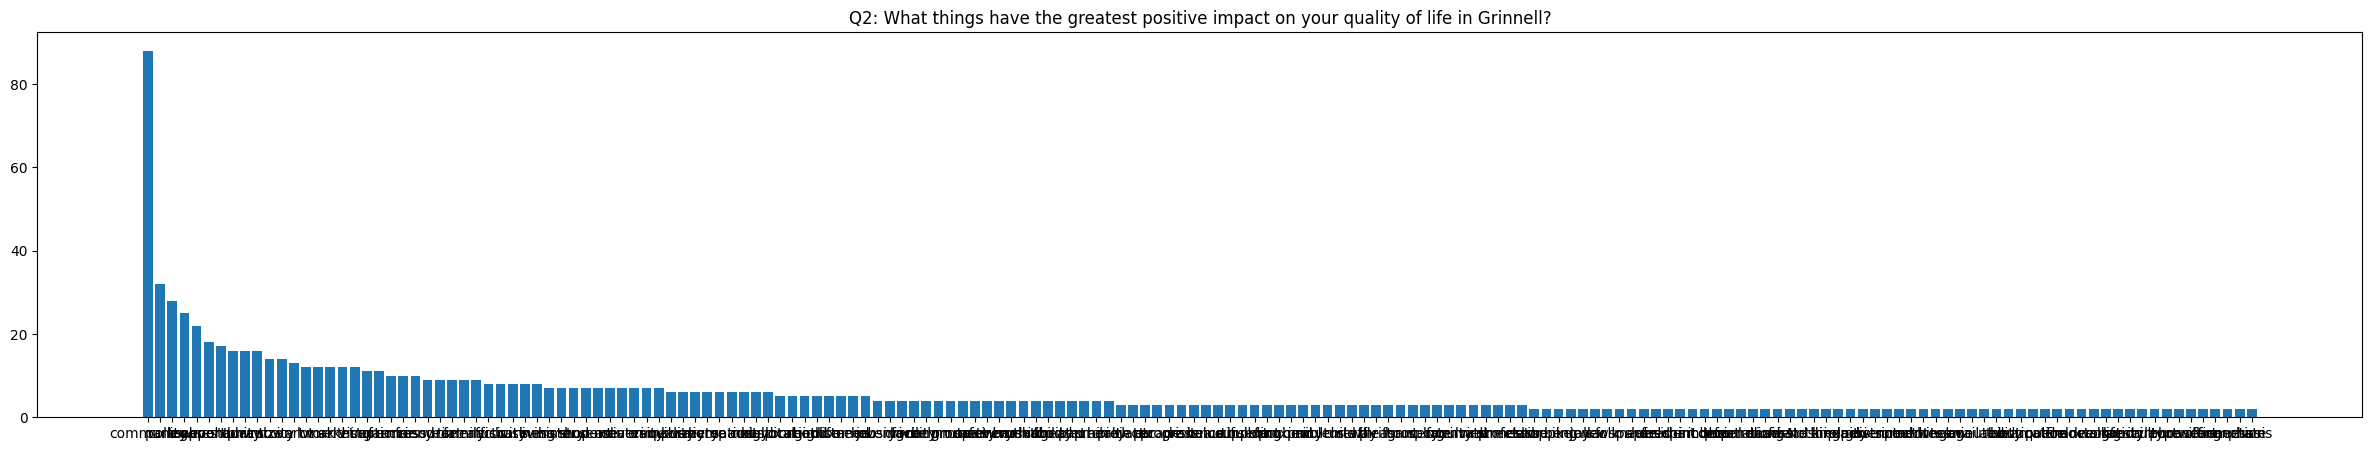

In [29]:
#Nouns count for k mean cluster 4

nounsk4 = noun_str(k_cluster4_response)
nck4 = word_count(nounsk4)
sorted_nouns4 = sorted(nck4.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk4 = dict(sorted_nouns4)
print(dict_sorted_nounsk4)

nouns_resultk4 = {key:value for (key, value) in dict_sorted_nounsk4.items() if value > 1}

nouns_keyk4 = list(nouns_resultk4.keys())
nouns_countsk4 = list(nouns_resultk4.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk4)), nouns_countsk4, tick_label=nouns_keyk4)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

**Analysis for cluster family**

In [30]:
family_cluster = responses.dropna(subset = "What are things that make you glad to live in Grinnell?  ").iloc[k_clusters[3]]

{'lack': 6, 'school': 4, 'college': 4, 'city': 4, 'business': 4, 'town': 4, 'look': 3, 'community': 3, 'student': 3, 'tax': 3, 'anything': 3, 'variety': 3, 'thing': 3, 'member': 2, 'election': 2, 'safety': 2, 'home': 2, 'property': 2, 'owner': 2, 'road': 2, 'place': 2, 'food': 2, 'restaurant': 2, 'lot': 2, 'association': 2, 'frustration': 2, 'defend': 1, 'harder': 1, 'art': 1, 'installation': 1, 'corner': 1, 'hwy': 1, 'baby': 1, 'gate': 1, 'lattice': 1, 'porch': 1, 'run': 1, 'house': 1, 'field': 1, 'underwhelming': 1, 'agenda': 1, 'organization': 1, 'patriotism': 1, 'struggle': 1, 'guess': 1, 'issue': 1, 'professor': 1, 'change': 1, 'residency': 1, 'resident': 1, 'article': 1, 'scarlet': 1, 'board': 1, 'sum': 1, 'author': 1, 'message': 1, 'need': 1, 'vote': 1, '’': 1, 'perception': 1, 'step': 1, 'highway': 1, 'traffic': 1, 'stop': 1, 'bicycle': 1, 'downtown': 1, 'sidewalk': 1, 'headphone': 1, 'texting': 1, 'concern': 1, 'pay': 1, 'use': 1, 'park': 1, 'shelter': 1, 'venue': 1, 'code': 1

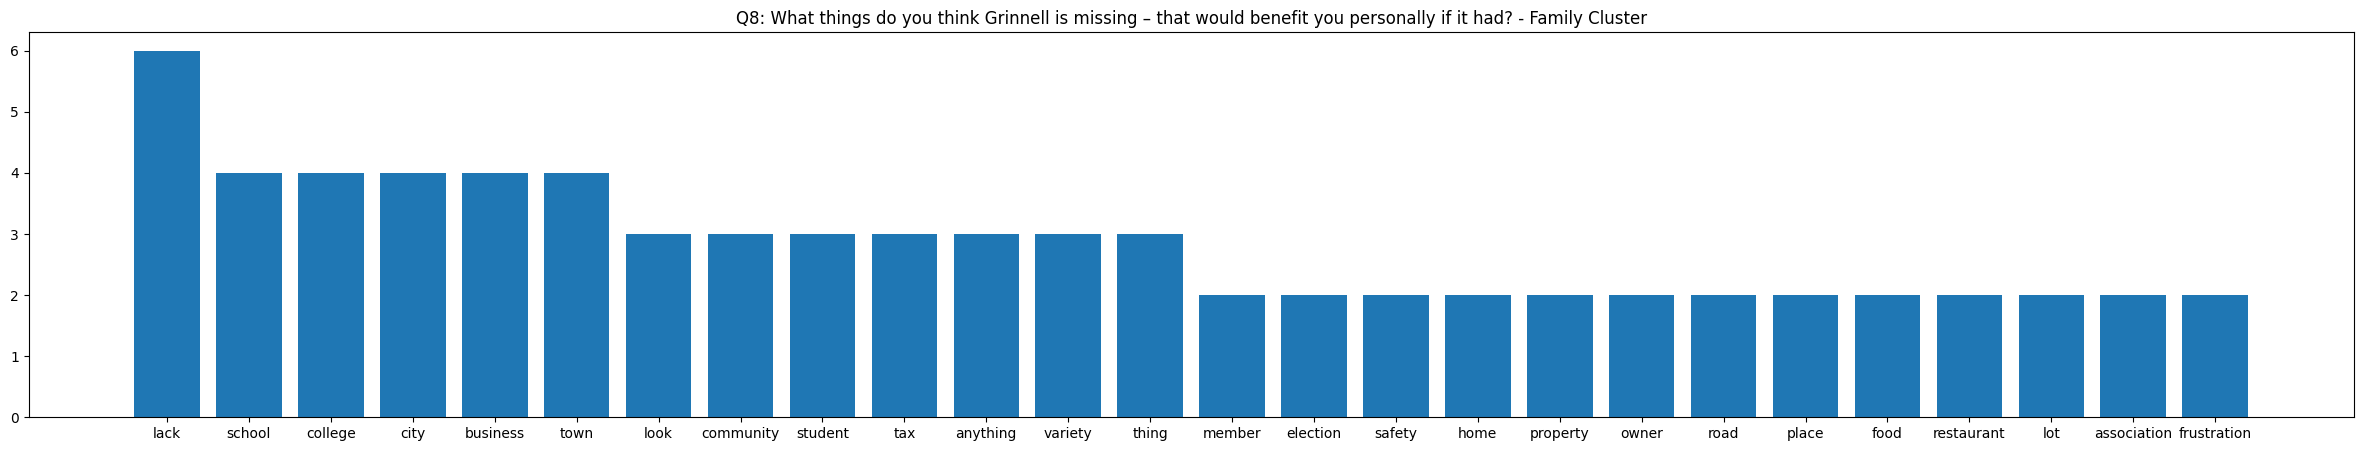

In [31]:
#Extract responses for question 8
family_response_8 = family_cluster.iloc[:,8].dropna()
text_family_response_8 = family_response_8.values

text_family_response_8 = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_family_response_8]    

text_family_response_8 = " ". join(text_family_response_8)


nouns_family = noun_str(text_family_response_8)
nc_family = word_count(nouns_family)
sorted_nouns_family = sorted(nc_family.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nouns_family = dict(sorted_nouns_family)
print(dict_sorted_nouns_family)

nouns_result_family = {key:value for (key, value) in dict_sorted_nouns_family.items() if value > 1}

nouns_key_family = list(nouns_result_family.keys())
nouns_counts_family = list(nouns_result_family.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_result_family)), nouns_counts_family, tick_label=nouns_key_family)
plt.title("Q8: What things do you think Grinnell is missing – that would benefit you personally if it had? - Family Cluster")
plt.show()

{'school': 6, 'town': 4, 'building': 4, 'program': 4, 'street': 3, 'student': 3, 'activity': 3, 'restaurant': 3, 'area': 3, 'veteran': 2, 'idea': 2, 'home': 2, 'hwy': 2, 'lot': 2, 'city': 2, 'renovation': 2, 'use': 2, 'community': 2, 'option': 2, 'place': 2, 'friend': 2, 'lunch': 2, 'family': 2, 'system': 2, 'business': 2, 'road': 2, 'bike': 2, 'project': 1, 'residency': 1, 'impression': 1, 'storage': 1, 'parking': 1, 'taste': 1, 'wrecker': 1, 'service': 1, 'limit': 1, 'salvage': 1, 'yard': 1, 'college': 1, 'artist': 1, 'etc': 1, 'quality': 1, 'founder': 1, 'statue': 1, 'view': 1, 'jewel': 1, 'box': 1, 'bank': 1, 'help': 1, 'visitor': 1, 'citizen': 1, 'history': 1, 'hangout': 1, 'income': 1, 'point': 1, 'grant': 1, 'property': 1, 'permit': 1, 'requirement': 1, 'district': 1, 'cheese': 1, 'milk': 1, 'child': 1, 'dance': 1, 'supply': 1, 'question': 1, 'band': 1, 'water': 1, 'softener': 1, 'miniature': 1, 'golfing': 1, 'eat': 1, 'attraction': 1, 'skating': 1, 'rink': 1, 'rent': 1, 'energy

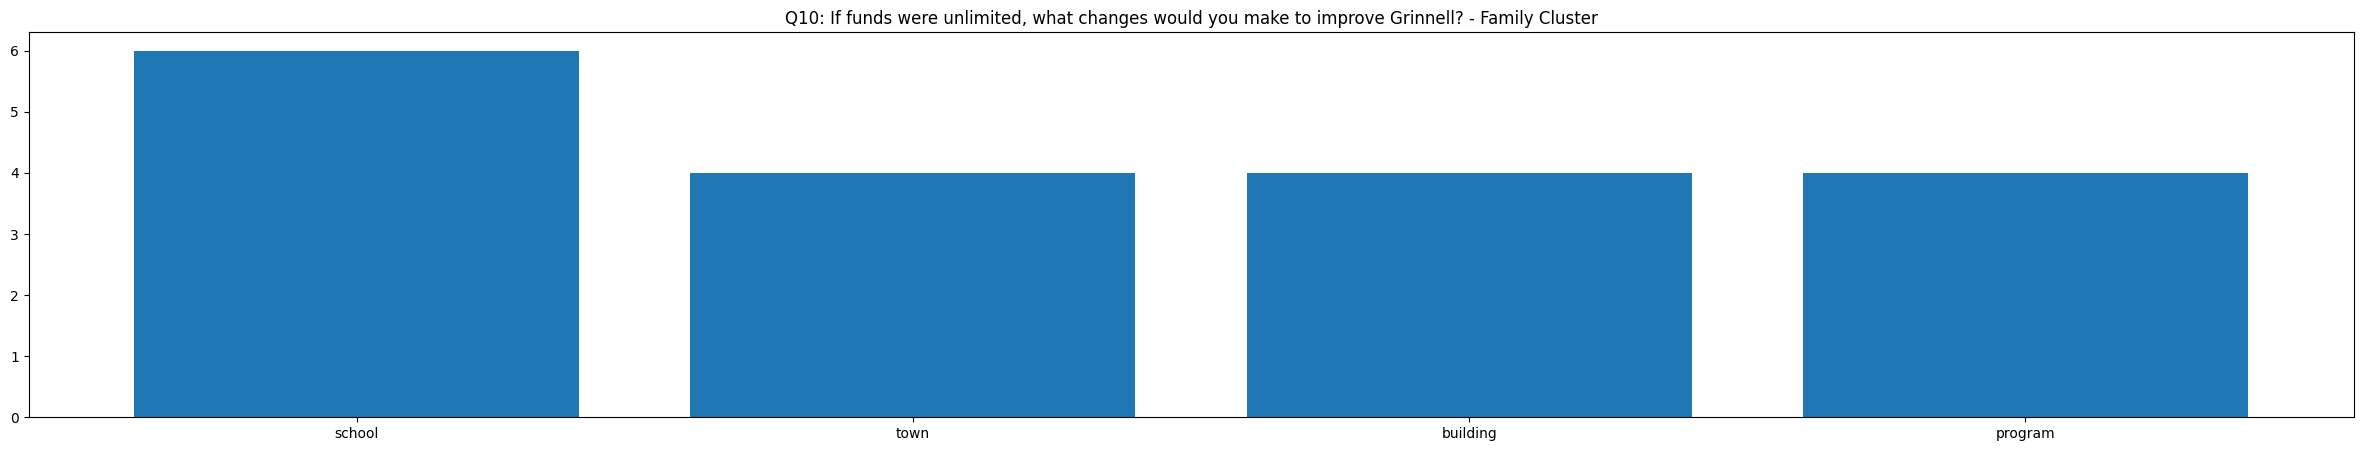

In [32]:
#Extract responses for question 10
family_response_10 = family_cluster.iloc[:,10].dropna()
text_family_response_10 = family_response_10.values

text_family_response_10 = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_family_response_10]    

text_family_response_10 = " ". join(text_family_response_10)


nouns_family = noun_str(text_family_response_10)
nc_family = word_count(nouns_family)
sorted_nouns_family = sorted(nc_family.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nouns_family = dict(sorted_nouns_family)
print(dict_sorted_nouns_family)

nouns_result_family = {key:value for (key, value) in dict_sorted_nouns_family.items() if value > 3}

nouns_key_family = list(nouns_result_family.keys())
nouns_counts_family = list(nouns_result_family.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_result_family)), nouns_counts_family, tick_label=nouns_key_family)
plt.title("Q10: If funds were unlimited, what changes would you make to improve Grinnell? - Family Cluster")
plt.show()

# Question 10 Clusters:

In [33]:
def subset_clusters (clusters_df, question_id, question_name, graph_limit):
  #Extract responses for question 8
  input = clusters_df.iloc[:,question_id].dropna()
  text_input = input.values

  text_input = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_input]    

  text_input = " ". join(text_input)


  nouns = noun_str(text_input)
  nc = word_count(nouns)
  sorted_nouns = sorted(nc.items(), key=lambda x:x[1], reverse=True)
  dict_sorted_nouns = dict(sorted_nouns)
  print(dict_sorted_nouns)

  nouns_result = {key:value for (key, value) in dict_sorted_nouns.items() if value > graph_limit}

  nouns_key = list(nouns_result.keys())
  nouns_counts = list(nouns_result.values())
  #resizing
  fig = plt.figure(figsize=(30, 5))
  plt.bar(range(len(nouns_result)), nouns_counts, tick_label=nouns_key)
  plt.show()

In [34]:
def clusters_noun (responses, question, graph_limit):
  nouns = noun_str(responses)
  nc = word_count(nouns)
  sorted_nouns  = sorted(nc.items(), key=lambda x:x[1], reverse=True)
  dict_sorted_nouns = dict(sorted_nouns)
  print(dict_sorted_nouns)
  nouns_result = {key:value for (key, value) in dict_sorted_nouns.items() if value >graph_limit}

  nouns_key = list(nouns_result.keys())
  nouns_counts = list(nouns_result.values())
  #resizing
  fig = plt.figure(figsize=(30, 5))
  plt.bar(range(len(nouns_result)), nouns_counts, tick_label=nouns_key)
  plt.title(question)
  plt.show()

In [35]:
records10 = responses.iloc[:, 10].dropna()

# extract the text data from the "text" column
text_data10 = records10.values

text_data10 = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_data10]    


# transform text data into numerical vector
vectors10 = vectorizer.fit_transform(text_data10)

cosine_sim10 = cosine_similarity(vectors10)

# cluster the data based on cosine similarity
kmeans10 = KMeans(n_clusters=5, random_state=0).fit(cosine_sim10)

# Print the cluster labels for each response
labels10 = kmeans10.labels_

# create a dictionary to store the responses in each cluster
k_clusters10 = {}
for i, label in enumerate(labels10):
    if label not in k_clusters10:
        k_clusters10[label] = []
    k_clusters10[label].append(i)

# print the responses in each cluster
for label, first in k_clusters10.items():
    print(f"Cluster {label}:")
    print(first)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 4:
[0, 1, 2, 3, 4, 7, 8, 11, 13, 14, 17, 19, 21, 23, 25, 26, 29, 30, 33, 34, 41, 42, 43, 44, 45, 46, 49, 52, 53, 54, 55, 56, 63, 64, 65, 66, 67, 70, 72, 76, 79, 80, 81, 82, 83, 86, 87, 88, 90, 92, 93, 94, 97, 100, 104, 107, 110, 111, 114, 115, 116, 117, 118, 122, 124, 125, 126, 129, 130, 131, 132, 134, 136, 137, 138, 139, 143, 145, 146, 147, 149, 157, 160, 167, 168, 169, 170, 172, 173, 177, 179, 180, 181, 183, 185, 186, 188, 192, 193, 198, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 217, 219, 220, 221, 222, 225, 227, 228, 229, 230, 231, 232, 236, 240, 241, 244, 246, 249, 251, 253, 254, 256, 257, 258, 259, 262, 264, 267, 268, 270, 272, 273, 274, 277, 281, 282, 287, 288, 291, 298, 300, 302, 303, 308, 310, 314, 315, 318, 326, 327, 329, 330, 332, 333, 335, 336, 339, 340, 341, 342, 343, 344, 350, 351, 352, 354, 355, 356, 362, 363, 367, 369, 370, 371, 373, 376, 377, 378, 380, 381, 382, 383, 384]

Cluster 1:
[5, 6, 9, 18, 24, 27, 31, 32, 35, 36, 37, 39, 47, 4

In [36]:
#Cluster 
k_cluster0_response10 = ''
for response in k_clusters10[0]:
    k_cluster0_response10 += " " 
    k_cluster0_response10 += text_data10[response]
    
#Cluster 1
k_cluster1_response10 = ''
for response in k_clusters10[1]:
    k_cluster1_response10 += " " 
    k_cluster1_response10 += text_data10[response]
 
#k_Cluster 2
k_cluster2_response10 = ''
for response in k_clusters10[2]:
    k_cluster2_response10 += " " 
    k_cluster2_response10 += text_data10[response]

#k_Cluster 3
k_cluster3_response10 = ''
for response in k_clusters10[3]:
    k_cluster3_response10 += " " 
    k_cluster3_response10 += text_data10[response]

#k_Cluster 4
k_cluster4_response10 = ''
for response in k_clusters10[4]:
    k_cluster4_response10 += " " 
    k_cluster4_response10 += text_data[response]

print(k_cluster1_response10)

 affordable housing attract good quality people work local business . Improved wage benefit attract good quality people work local business . Additional improvement make Grinnell pedestrian friendly . Additional pedestrian/bicycle trail . regular street sidewalk maintenance . applaud City Grinnell consistently improving regularly repairing downtown street , sidewalk , public area , keeping downtown area good repair looking nice . would like see happen throughout City Grinnell . 'm fan amount trash come across community . need trash can place like Arbor lake ( may one thing city worker may ) . notice overflow trash last time Lake Nyanza . Trash lying around school tacky . Maybe education school prevention , etc . 'm sure type committee ( something year Earth Day ) . safety standpoint , ballfields Ahrens Park overdue repair update . would also like see safety measure place protect folk foul ball , rain , heat , etc . thing grandstand , shelter , netting , etc . Utilize Merrill Park ball 

{'restaurant': 27, 'option': 26, 'pool': 7, 'housing': 7, 'community': 5, 'shop': 5, 'lot': 5, 'school': 5, 'store': 5, 'thing': 4, 'coffee': 4, 'sport': 4, 'road': 4, 'entertainment': 4, 'downtown': 3, 'town': 3, 'facility': 3, 'rink': 3, 'childcare': 3, 'place': 3, 'trail': 2, 'bar': 2, 'park': 2, 'bring': 2, 'grocery': 2, 'improvement': 2, 'lunch': 2, 'field': 2, 'diversity': 2, 'opportunity': 2, 'activity': 2, 'parking': 2, 'building': 2, 'campus': 2, 'space': 2, 'child': 2, 'care': 2, 'service': 2, 'program': 2, 'street': 2, 'food': 2, 'variety': 2, 'ton': 2, 'night': 2, 'business': 1, 'college/community': 1, 'center': 1, 'bicycle': 1, 'visitor': 1, 'event': 1, 'question': 1, 'yoga': 1, 'studio': 1, 'type': 1, 'basketball': 1, 'track': 1, 'indoor': 1, 'area': 1, 'winter': 1, 'season': 1, 'gender': 1, 'Synagogue': 1, 'city': 1, 'sign': 1, 'intersection': 1, 'water': 1, 'line': 1, 'funding': 1, 'art': 1, 'skate': 1, 'arcade': 1, 'waterpark': 1, 'share': 1, 'poverty': 1, 'hunger': 1,

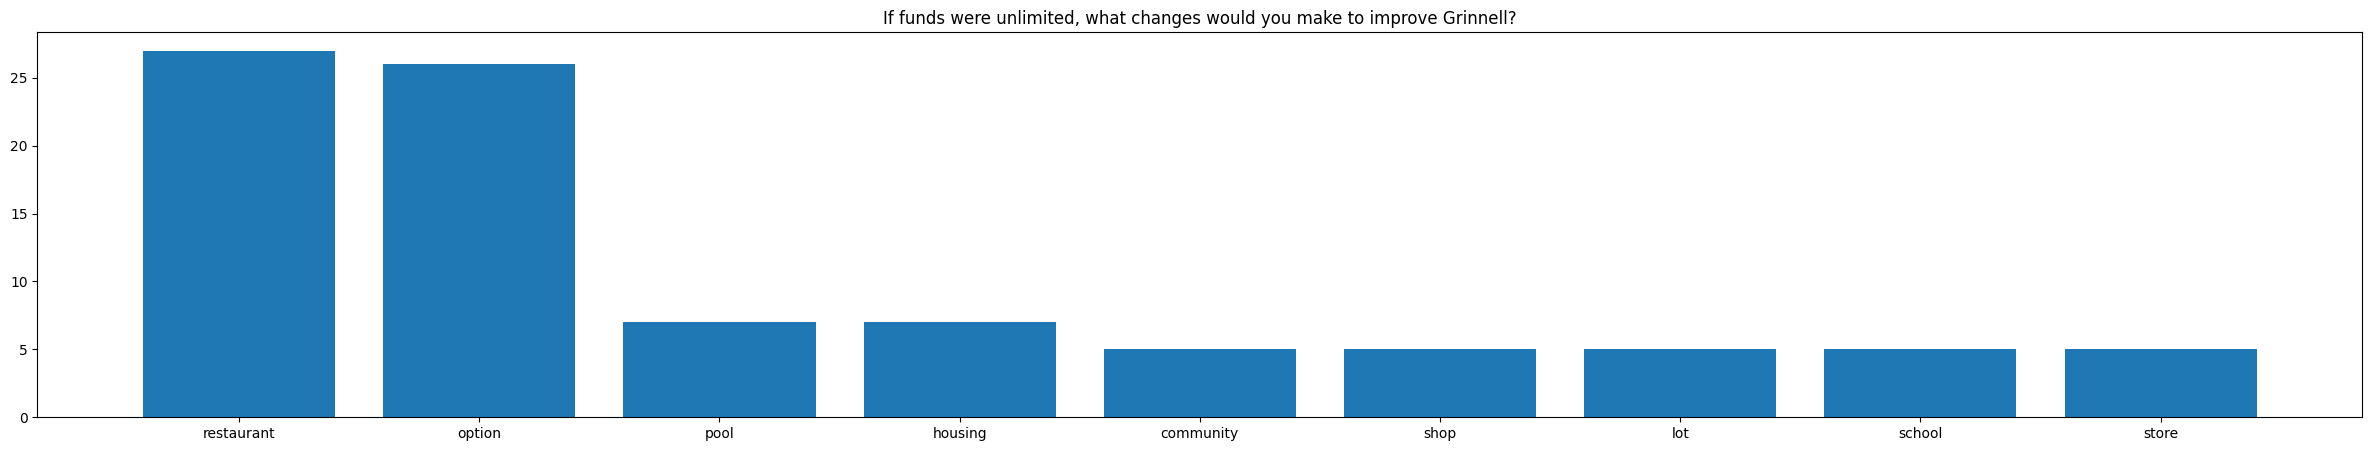

In [37]:
clusters_noun(k_cluster0_response10, "If funds were unlimited, what changes would you make to improve Grinnell?",  4)

{'community': 35, 'town': 35, 'school': 30, 'business': 21, 'home': 21, 'housing': 20, 'place': 18, 'thing': 17, 'option': 17, 'service': 17, 'park': 17, 'way': 16, 'restaurant': 15, 'building': 15, 'food': 15, 'space': 13, 'lot': 13, 'street': 12, 'city': 12, 'center': 12, 'money': 11, 'college': 11, 'family': 11, 'area': 10, 'fund': 10, 'program': 10, 'activity': 10, 'downtown': 10, 'time': 9, 'music': 9, 'student': 9, 'event': 9, 'improvement': 8, 'class': 8, 'sidewalk': 7, 'look': 7, 'kid': 7, 'movie': 7, 'property': 7, 'part': 7, 'support': 7, 'quality': 6, 'use': 6, 'resource': 6, 'system': 6, 'child': 6, 'income': 6, 'daycare': 6, 'road': 6, '’': 6, 'end': 6, 'car': 6, 'something': 5, 'year': 5, 'see': 5, 'adult': 5, 'apartment': 5, 'care': 5, 'staff': 5, 'age': 5, 'house': 5, 'path': 5, 'water': 5, 'bike': 5, 'trail': 4, 'trash': 4, 'need': 4, 'veteran': 4, 'store': 4, 'transportation': 4, 'access': 4, 'parking': 4, 'yard': 4, 'create': 4, 'development': 4, 'get': 4, 'renovatio

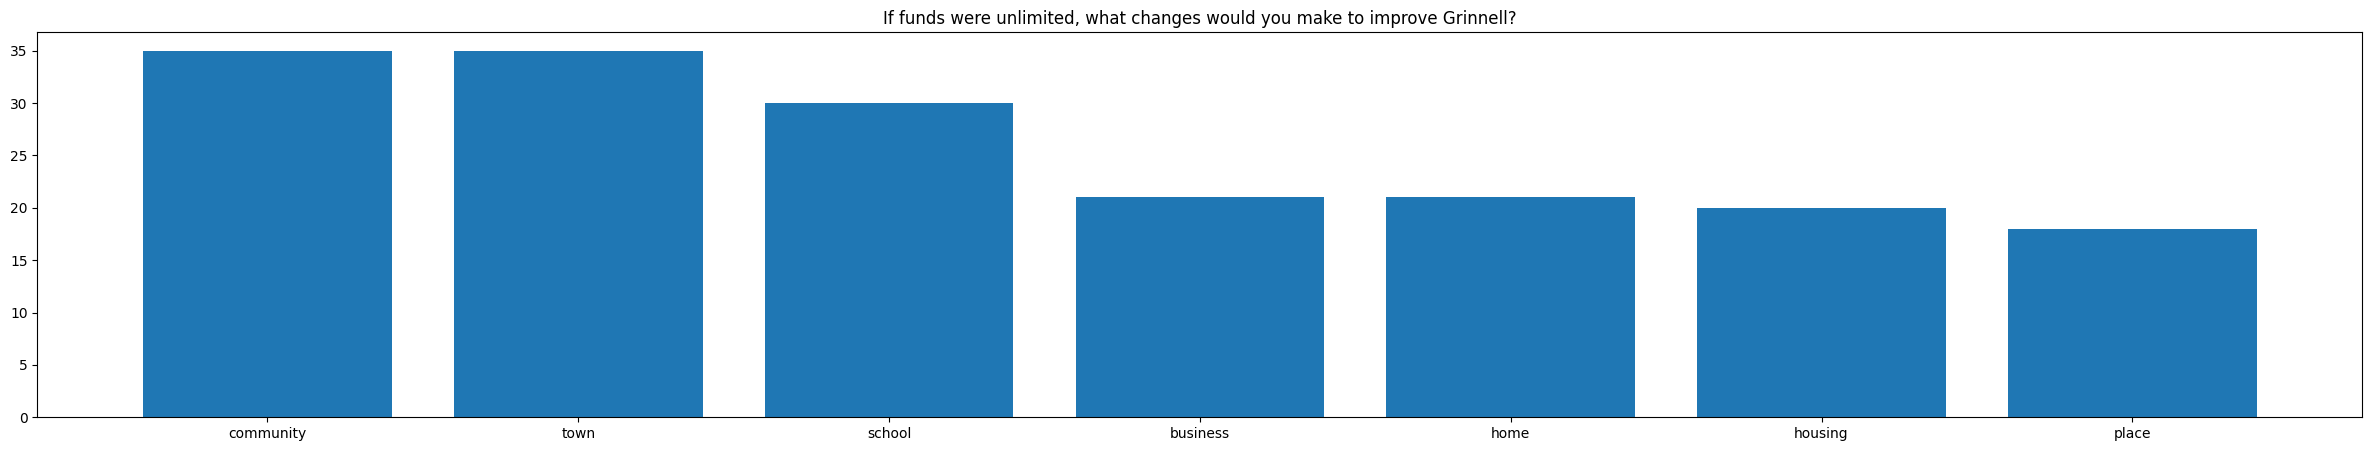

In [38]:
clusters_noun(k_cluster1_response10, "If funds were unlimited, what changes would you make to improve Grinnell?",  17)

{'sidewalk': 13, 'lane': 2, 'park': 2, 'improvement': 2, 'school': 2, 'road': 2, 'activity': 1, 'family': 1, 'farm': 1, 'sustainable': 1, 'farming': 1, 'practice': 1, 'area': 1, 'thoroughfare': 1, 'example': 1, 'college': 1, 'neighborhood': 1, 'expansion': 1, 'revamp/update': 1, 'curriculum': 1}


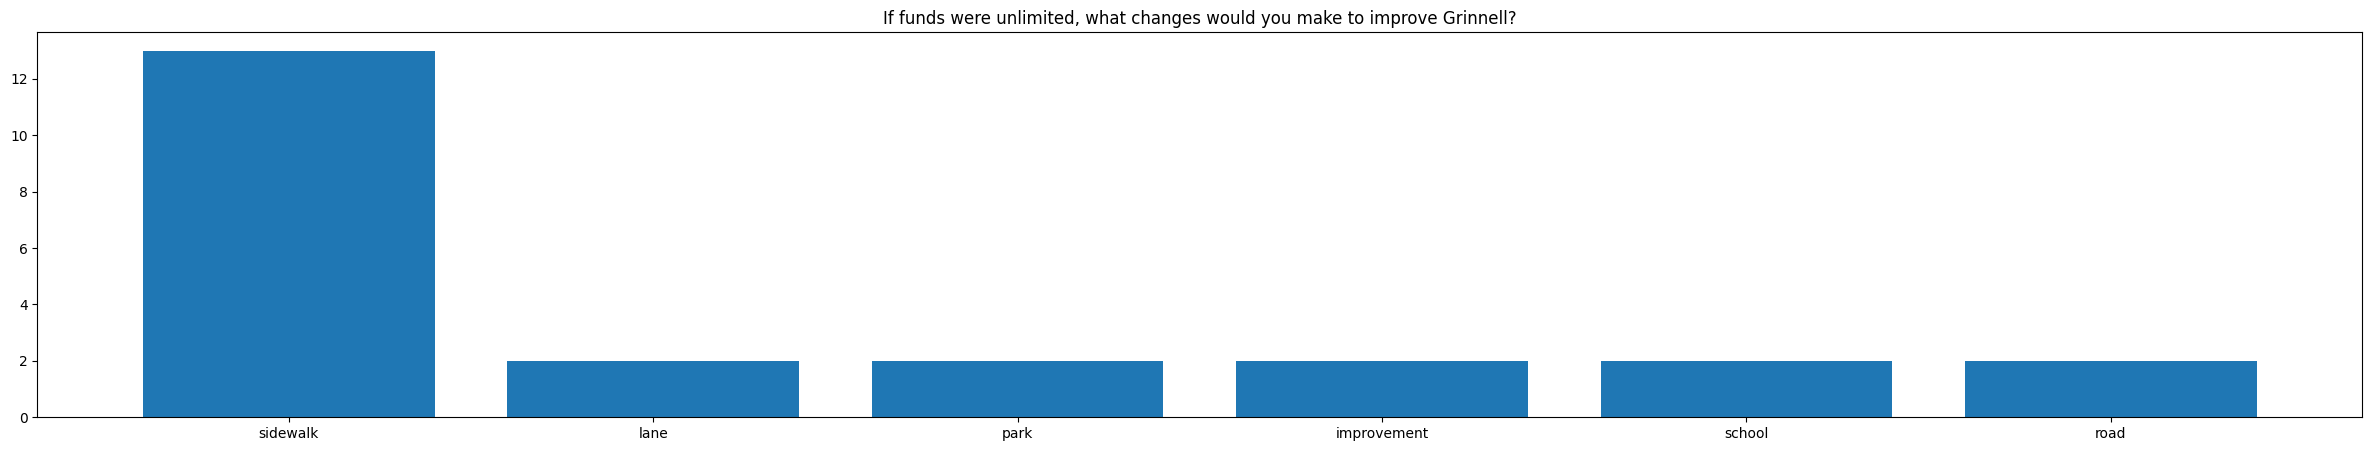

In [39]:
clusters_noun(k_cluster2_response10, "If funds were unlimited, what changes would you make to improve Grinnell?",  1)

{'school': 66, 'road': 8, 'facility': 8, 'restaurant': 8, 'building': 6, 'city': 6, 'activity': 6, 'community': 5, 'sport': 5, 'housing': 5, 'child': 5, 'park': 5, 'job': 4, 'center': 4, 'place': 4, 'option': 4, 'need': 4, 'age': 4, 'sidewalk': 3, 'care': 3, 'family': 3, 'kid': 3, 'tree': 3, 'town': 3, 'opportunity': 3, 'indoor': 3, 'store': 3, 'event': 2, 'equipment': 2, 'type': 2, 'health': 2, 'work': 2, 'business': 2, 'art': 2, 'pool': 2, 'development': 2, 'hang': 2, 'plant': 2, 'struggle': 2, 'food': 2, 'diverse': 2, 'club': 2, 'meal': 2, 'remodel': 2, 'fund': 1, 'repair': 1, 'transit': 1, 'grant': 1, 'lead': 1, 'support': 1, 'incorporate': 1, 'daycare': 1, 'resource': 1, 'state': 1, 'month': 1, 'pay': 1, 'employee': 1, 'wage': 1, 'manager': 1, 'superintendent': 1, 'brand': 1, 'highway': 1, 'etc': 1, 'renovation': 1, 'water': 1, 'treatment': 1, 'lane': 1, 'thousand': 1, 'assistance': 1, 'table': 1, 'planner': 1, 'feel': 1, 'idea': 1, 'transportation': 1, 'transport': 1, 'path': 1, 

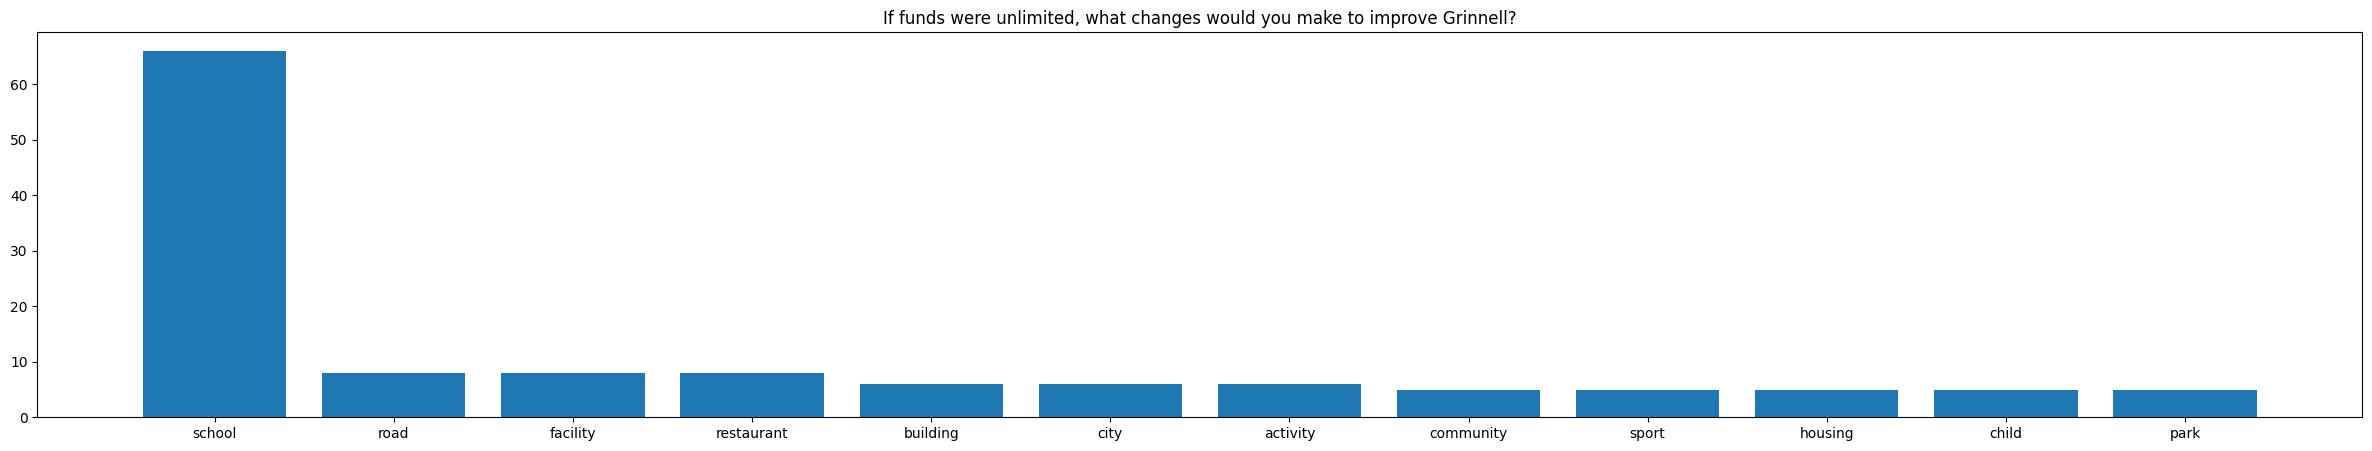

In [40]:
clusters_noun(k_cluster3_response10, "If funds were unlimited, what changes would you make to improve Grinnell?",  4)

{'community': 75, 'town': 63, 'college': 29, 'park': 24, 'size': 21, 'school': 15, 'family': 15, 'restaurant': 14, 'lot': 13, 'city': 13, 'event': 12, 'opportunity': 11, 'crime': 11, 'store': 11, 'art': 10, 'downtown': 10, 'feel': 10, 'shop': 9, 'place': 9, 'diversity': 9, 'business': 9, 'activity': 9, 'work': 9, 'traffic': 9, 'market': 8, 'area': 8, 'access': 8, 'thing': 8, 'farmer': 7, 'friend': 7, 'variety': 7, 'space': 7, 'care': 7, 'resource': 6, 'student': 6, 'year': 6, 'safety': 6, 'rate': 6, 'need': 6, 'campus': 6, 'summer': 5, 'sense': 5, 'time': 5, 'option': 5, 'grocery': 5, 'hospital': 5, 'quality': 4, 'music': 4, 'facility': 4, 'presence': 4, 'home': 4, 'population': 4, 'recreation': 4, 'life': 4, 'distance': 4, 'project': 3, 'water': 3, 'etc': 3, 'everyone': 3, 'parade': 3, 'department': 3, 'walkability': 3, 'neighbor': 3, 'service': 3, 'location': 3, 'help': 3, 'program': 3, 'influence': 3, 'library': 3, 'center': 3, 'retirement': 3, 'get': 3, 'cost': 3, 'living': 3, 'eve

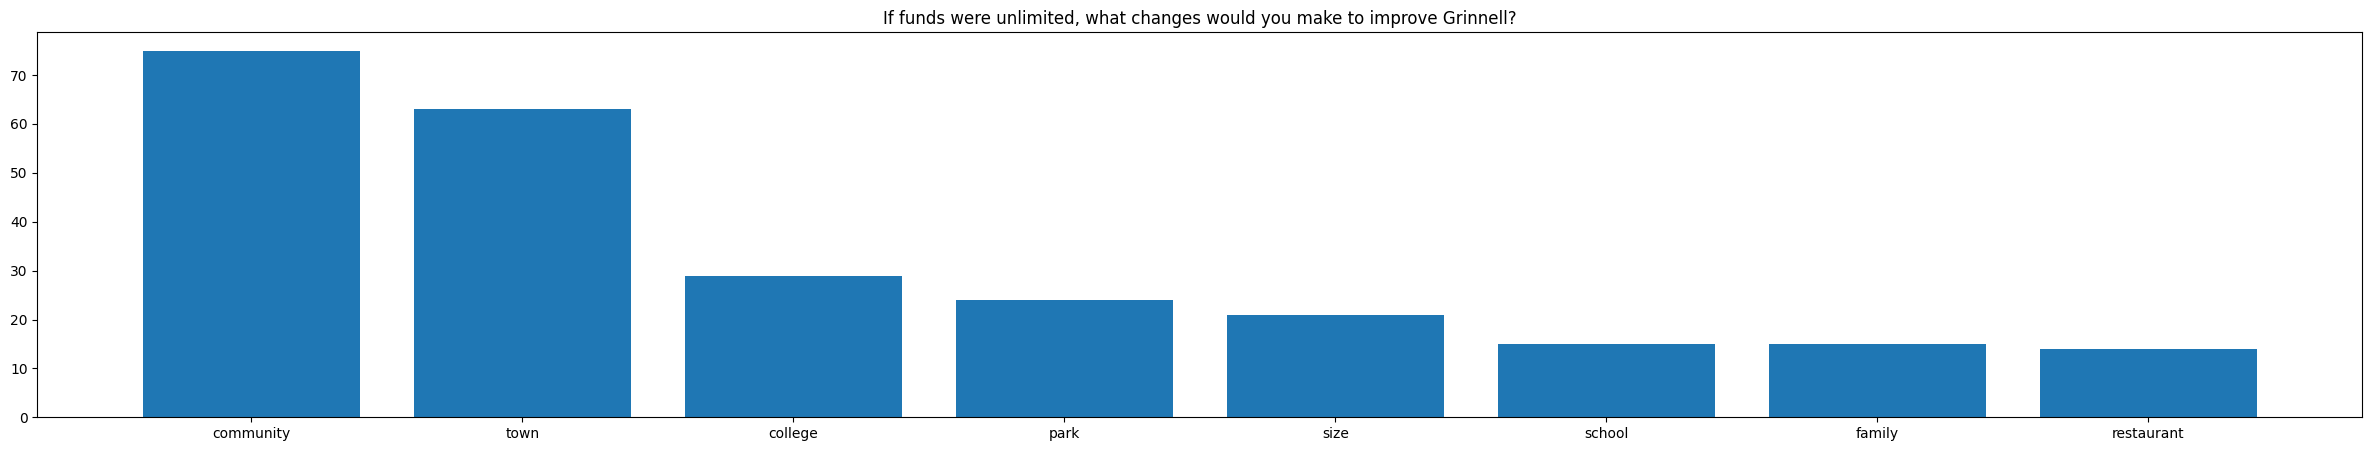

In [41]:
clusters_noun(k_cluster4_response10, "If funds were unlimited, what changes would you make to improve Grinnell?",  13)

## Restaurant group

In [42]:
restaurant_cluster = responses.dropna(subset = "If funds were unlimited, what changes would you make to improve Grinnell?").iloc[k_clusters[0]]

{'community': 10, 'value': 7, 'neighbor': 5, 'school': 4, 'help': 3, 'town': 3, 'sense': 3, 'event': 2, 'college': 2, 'feel': 2, 'way': 2, 'business': 2, 'city': 2, 'family': 2, 'principle': 2, 'child': 2, 'identity': 2, 'show': 2, 'thing': 2, 'everyone': 2, 'residence': 2, 'education': 2, 'sure': 1, 'number': 1, 'ideal': 1, 'belief': 1, 'causing': 1, 'interfering': 1, 'example': 1, 'general': 1, 'nothing': 1, 'resident': 1, 'crisis': 1, 'question': 1, 'nice': 1, 'history': 1, 'view': 1, 'future': 1, 'grow': 1, 'need': 1, 'housing': 1, 'job': 1, 'pay': 1, 'barrier': 1, 'living': 1, 'kind': 1, 'place': 1, 'split': 1, 'gun': 1, 'building': 1, 'park': 1, 'division': 1, 'teach': 1, 'policy': 1, 'rest': 1, 'generosity': 1, 'fund': 1, 'today': 1, 'cause': 1, 'civic': 1, 'duty': 1, 'visit': 1, 'pride': 1, 'experience': 1, 'politeness': 1, 'care': 1, '’': 1, 'system': 1, 'priority': 1, 'power': 1, 'thread': 1, 'amongst': 1, 'spirit': 1, 'neighborliness': 1, 'disaster': 1, 'tornado': 1, 'durati

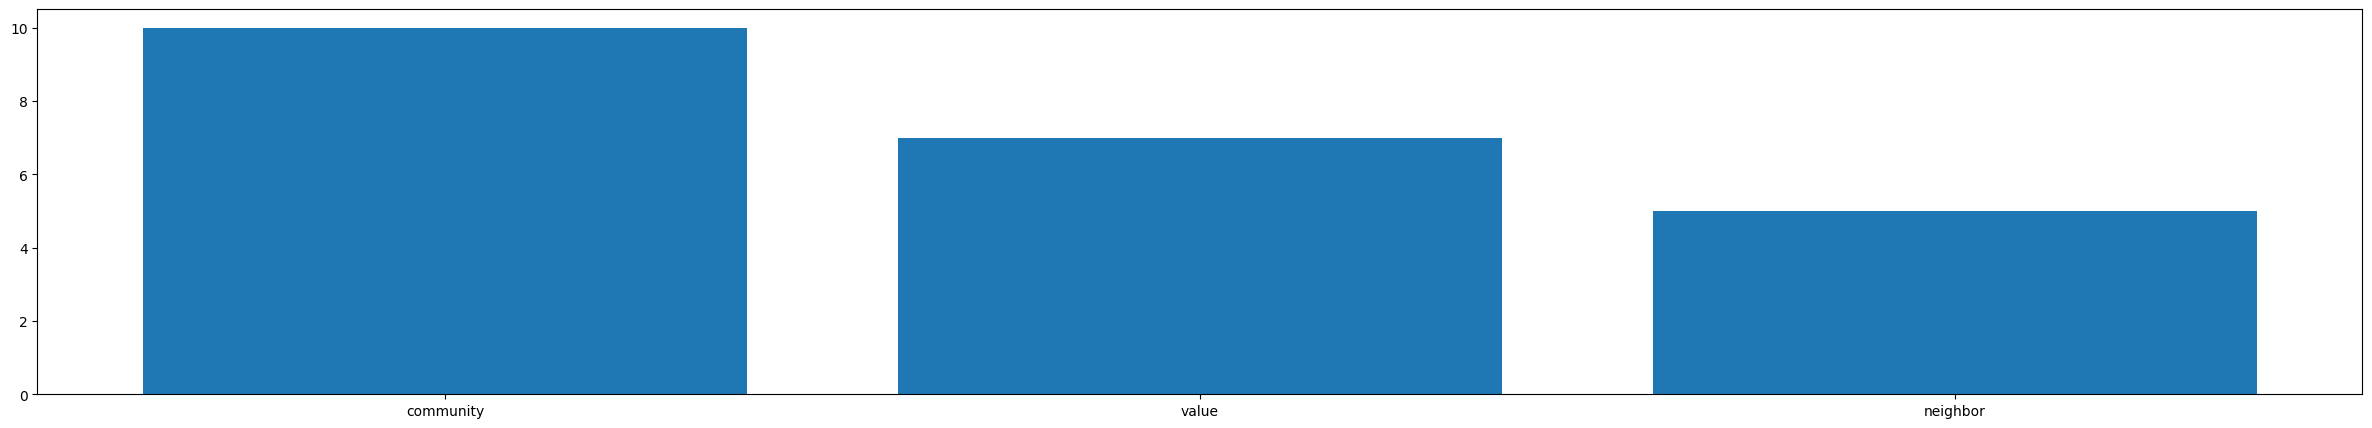

In [43]:
subset_clusters(restaurant_cluster, 4, "Do you think Grinnell has a set of core values? (e.g. what is important, what we believe, principles guiding our behavior) What do you think they are?", 4)

{'college': 13, 'community': 13, 'school': 7, 'restaurant': 4, 'city': 4, 'part': 4, 'business': 4, 'diversity': 3, 'place': 3, 'time': 3, 'town': 3, 'lack': 3, 'end': 3, 'event': 2, 'downtown': 2, 'board': 2, 'car': 2, 'food': 2, 'service': 2, 'activity': 2, 'water': 2, 'nothing': 2, 'property': 2, 'tax': 2, 'building': 2, 'professor': 2, 'family': 2, 'care': 2, 'someone': 2, 'fun': 2, 'resistance': 2, 'something': 2, 'division': 1, 'loss': 1, 'facility': 1, 'need': 1, 'pressure': 1, 'decision': 1, 'acquisition': 1, 'space': 1, 'avenue': 1, 'address': 1, 'block': 1, 'number': 1, 'street': 1, 'grid': 1, 'thinking': 1, 'education': 1, 'attitude': 1, 'opinion': 1, 'junk': 1, 'grass': 1, 'pantry': 1, 'option': 1, 'ambulance': 1, 'summer': 1, 'value': 1, 'threat': 1, 'disrespect': 1, 'intimidation': 1, 'retaliation': 1, 'bullying': 1, 'health': 1, 'choice': 1, 'variety': 1, 'shop': 1, 'set': 1, 'pay': 1, 'amenity': 1, 'mindedness': 1, 'trouble': 1, 'park': 1, 'bond': 1, 'year': 1, 'cost': 

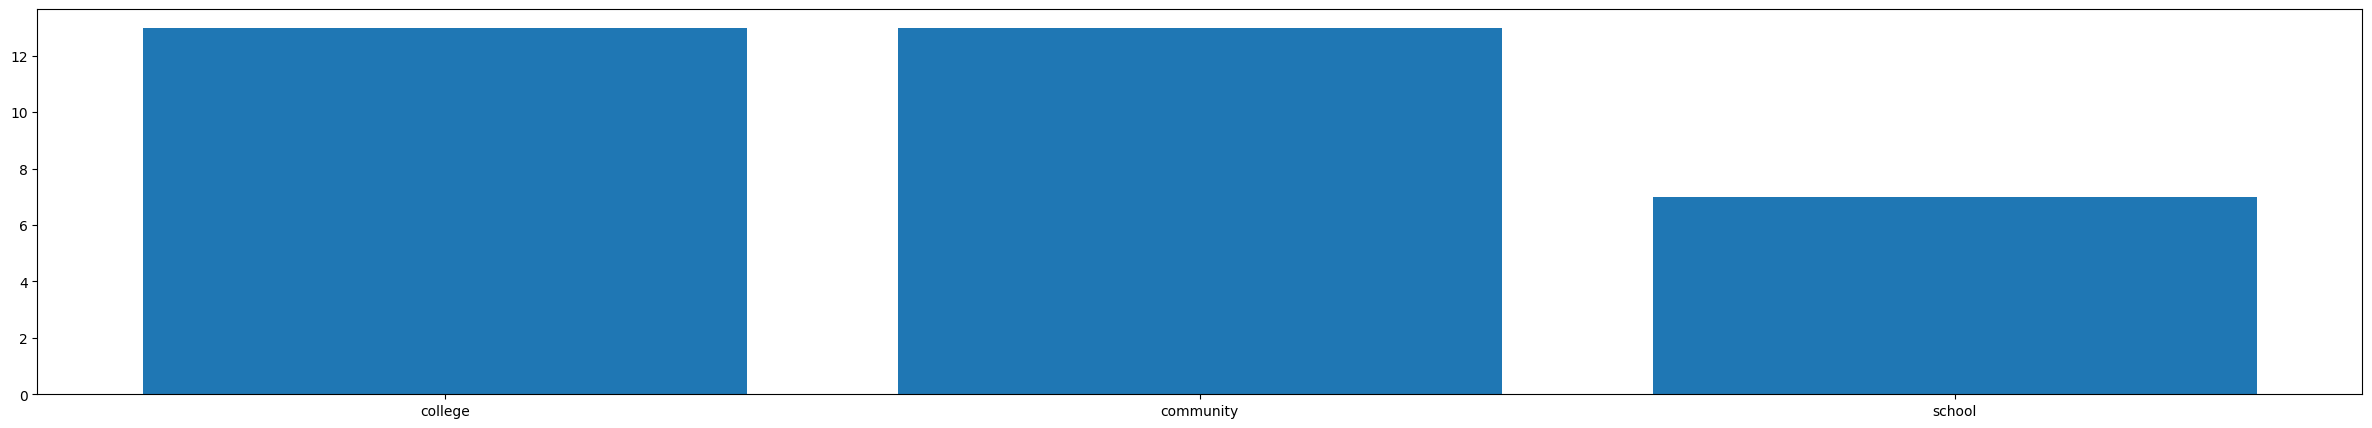

In [44]:
subset_clusters(restaurant_cluster, 8, "What things have frustrated you about living in Grinnell?", 4)

# **Question 2 Clusters**

In [45]:
def clustering(column_id): 
  records = responses.iloc[:, column_id].dropna()

  # extract the text data from the "text" column
  text_data = records.values

  text_data = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_data]    
  #https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
  #https://okan.cloud/posts/0-01-16-text-vectorization-using-python-tf-idf/

  # transform text data into numerical vector
  vectors = vectorizer.fit_transform(text_data)

  cosine_sim = cosine_similarity(vectors)

  # cluster the data based on cosine similarity
  kmeans = KMeans(n_clusters=5, random_state=0).fit(cosine_sim)

  # Print the cluster labels for each response
  labels = kmeans.labels_

  # create a dictionary to store the responses in each cluster
  k_clusters = {}
  for i, label in enumerate(labels):
      if label not in k_clusters:
          k_clusters[label] = []
      k_clusters[label].append(i)

  #Cluster 
  k_cluster0_response = ''
  for response in k_clusters[0]:
      k_cluster0_response += " " 
      k_cluster0_response += text_data[response]
      
  #Cluster 1
  k_cluster1_response = ''
  for response in k_clusters[1]:
      k_cluster1_response += " " 
      k_cluster1_response += text_data[response]
  
  #k_Cluster 2
  k_cluster_response = ''
  for response in k_clusters[2]:
      k_cluster_response += " " 
      k_cluster_response += text_data[response]

  #k_Cluster 3
  k_cluster3_response = ''
  for response in k_clusters[3]:
      k_cluster3_response += " " 
      k_cluster3_response += text_data[response]

  #k_Cluster 4
  k_cluster4_response = ''
  for response in k_clusters[4]:
      k_cluster4_response += " " 
      k_cluster4_response += text_data[response]

  return k_clusters, k_cluster0_response, k_cluster1_response, k_cluster2_response, k_cluster3_response, k_cluster4_response

def print_clusters(k_clusters):
  # print the responses in each cluster
  for label, first in k_clusters.items():
      print(f"Cluster {label}:")
      print(first)
      print()

In [46]:
clustering2 = clustering(2)
k_clusters2 = clustering2[0]
print_clusters(k_clusters2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
[0, 1, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 23, 25, 26, 27, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 50, 51, 53, 55, 56, 57, 59, 61, 62, 64, 65, 68, 70, 71, 72, 73, 75, 76, 80, 82, 83, 84, 86, 88, 90, 92, 93, 94, 98, 100, 101, 102, 107, 108, 110, 111, 112, 114, 117, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 144, 147, 149, 150, 151, 153, 154, 156, 157, 158, 160, 161, 162, 164, 165, 166, 167, 169, 170, 172, 173, 174, 175, 177, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 200, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 217, 219, 220, 221, 222, 226, 228, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 250, 251, 253, 254, 257, 258, 259, 260, 263, 264, 265, 266, 267, 268, 276, 278, 279, 280, 282, 284, 286, 287, 289, 290, 292, 293, 294, 295, 297, 298, 299, 300, 301, 304, 305, 307, 308, 309, 310, 311

{'town': 33, 'park': 20, 'city': 18, 'access': 18, 'school': 18, 'college': 18, 'activity': 17, 'business': 17, 'quality': 16, 'community': 15, 'store': 14, 'life': 13, 'opportunity': 13, 'food': 13, 'thing': 12, 'restaurant': 11, 'need': 11, 'service': 11, 'event': 10, 'option': 10, 'work': 10, 'grocery': 10, 'downtown': 9, 'job': 9, 'friend': 9, 'place': 8, 'space': 8, 'church': 8, 'center': 8, 'resource': 7, 'student': 7, 'crime': 7, 'help': 7, 'care': 7, 'lot': 7, 'health': 7, 'variety': 6, 'shop': 6, 'newspaper': 6, 'family': 6, 'facility': 6, 'trail': 6, 'child': 6, 'hospital': 6, 'art': 6, 'library': 6, 'path': 5, 'market': 5, 'course': 5, 'fact': 5, 'distance': 5, 'traffic': 5, 'everything': 5, 'cost': 5, 'living': 5, 'sport': 5, 'group': 4, 'travel': 4, 'time': 4, 'support': 4, 'money': 4, 'golf': 4, 'housing': 4, 'proximity': 4, 'location': 4, 'ability': 4, 'drive': 4, 'area': 4, 'music': 4, 'campus': 4, 'impact': 4, 'year': 4, 'pool': 4, 'walk': 4, 'example': 4, 'organizatio

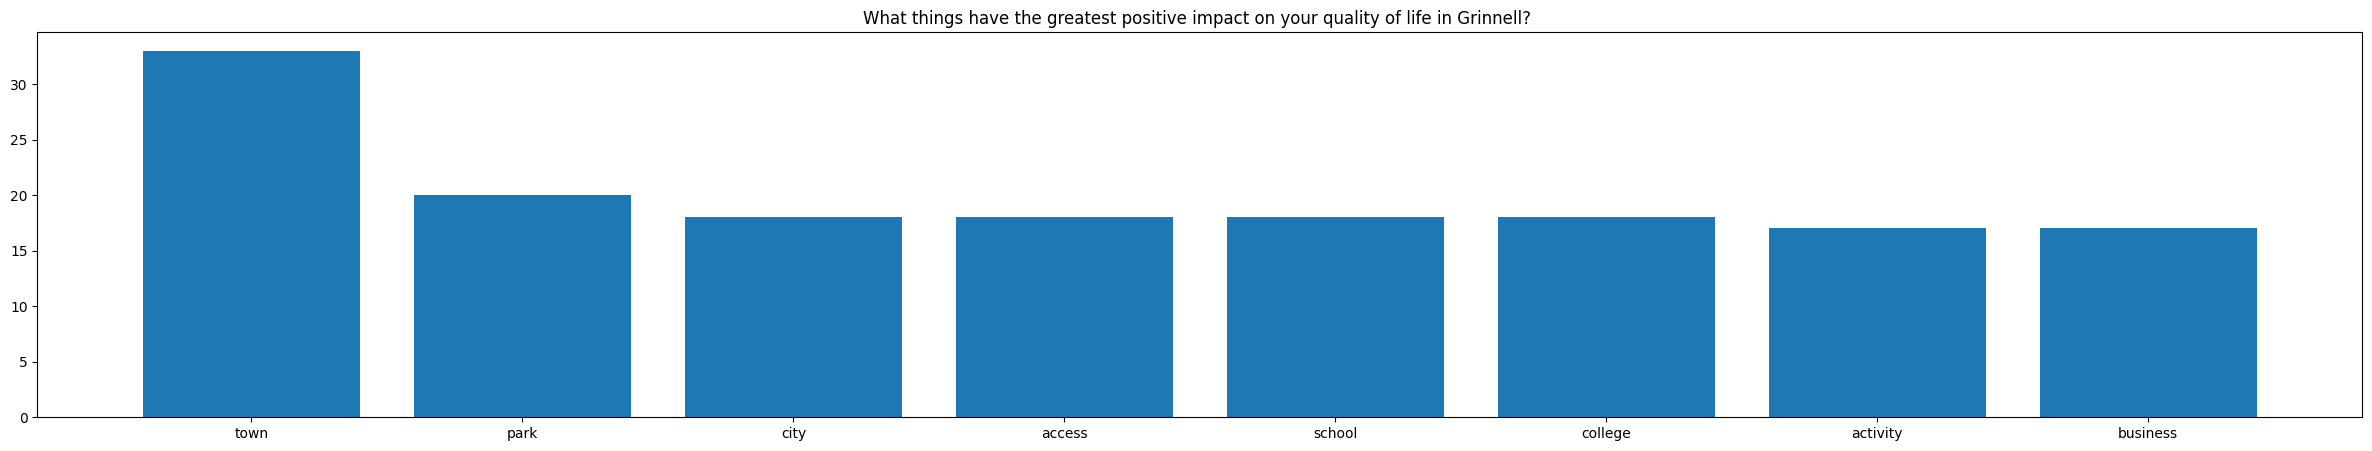

{'community': 58, 'activity': 13, 'event': 10, 'town': 10, 'college': 7, 'opportunity': 6, 'family': 5, 'church': 4, 'friend': 3, 'access': 3, 'park': 3, 'school': 3, 'sense': 3, 'living': 3, 'service': 3, 'work': 3, 'campus': 3, 'job': 2, 'amenity': 2, 'feel': 2, 'kid': 2, 'district': 2, '’': 2, 'entertainment': 2, 'grocery': 2, 'store': 2, 'restaurant': 2, 'business': 2, 'lot': 2, 'area': 2, 'organization': 2, 'cost': 2, 'home': 2, 'size': 2, 'impact': 2, 'investment': 2, 'child': 2, 'relationship': 2, 'partnership': 1, 'place': 1, 'student': 1, 'togetherness': 1, 'neighbor': 1, 'downtown': 1, 'college…you': 1, 'population': 1, 'tolerance': 1, 'environment': 1, 'preservation': 1, 'city': 1, 'pool': 1, 'program': 1, 'adult': 1, 'project': 1, 'variety': 1, 'shopping': 1, 'thriving': 1, 'live': 1, 'care': 1, 'expert': 1, 'economy': 1, 'movie': 1, 'theater': 1, 'hospital': 1, 'shop': 1, 'amendment': 1, 'group': 1, 'need': 1, 'neighborhood': 1, 'volunteer': 1, 'time': 1, 'kind': 1, 'food'

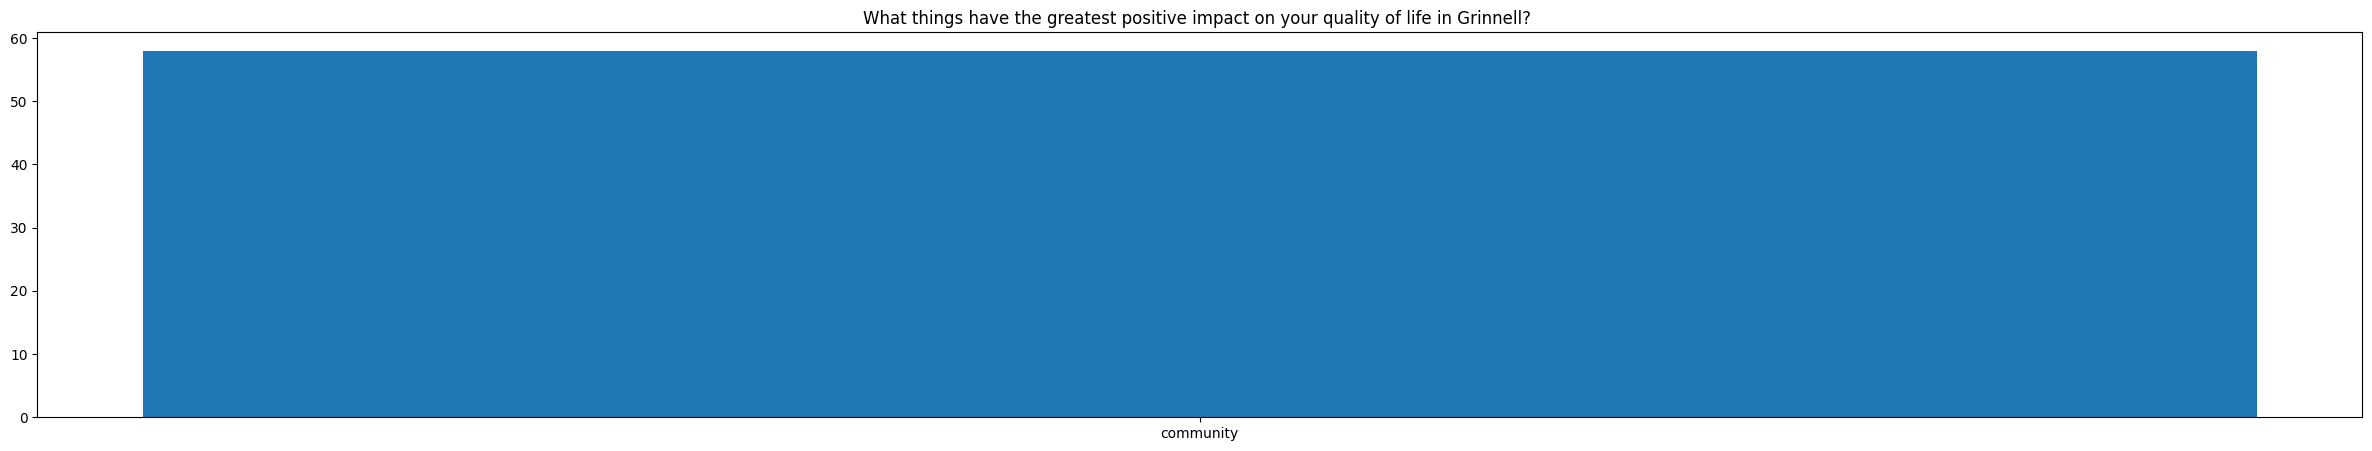

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

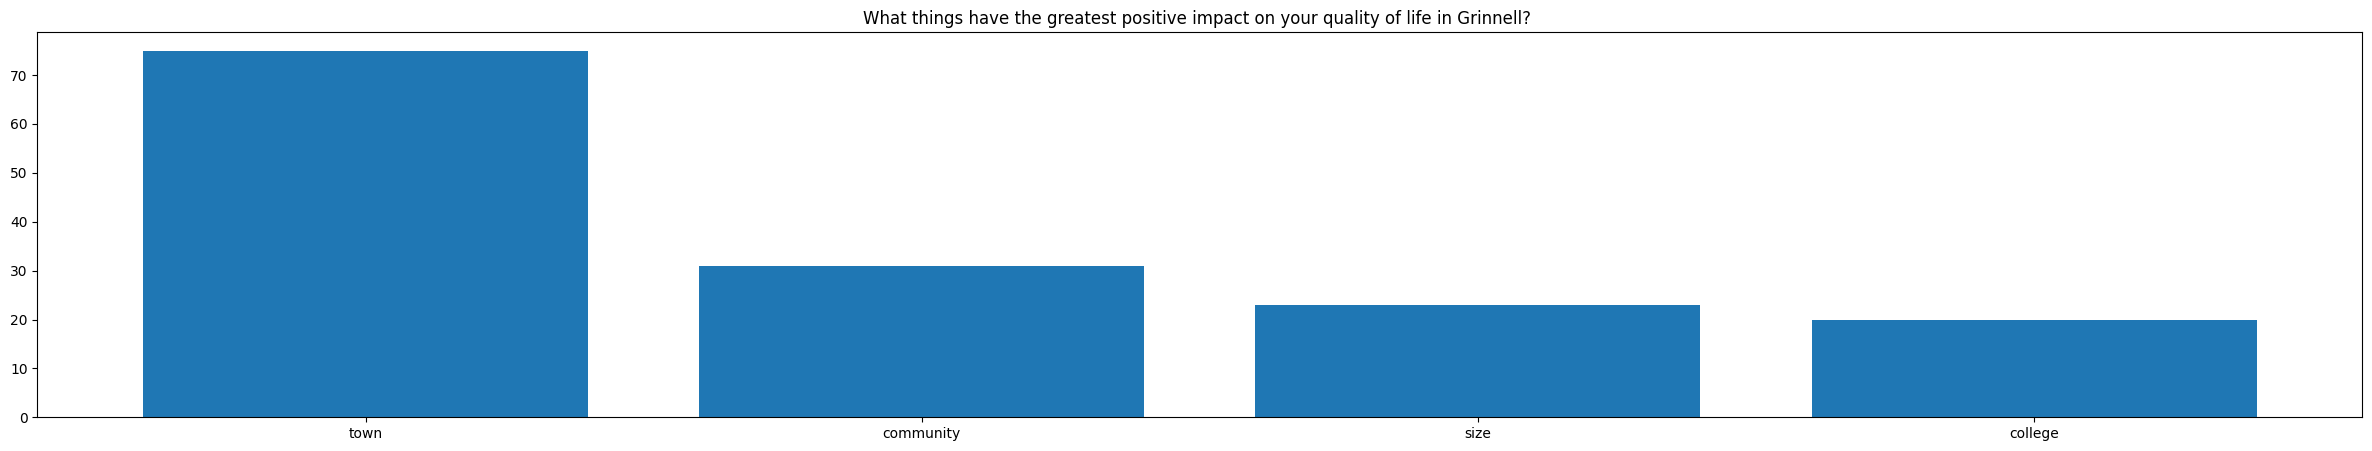

{'family': 8, 'friend': 3, 'living': 2, 'value': 1, 'customer': 1, 'child': 1, 'crime': 1, 'support': 1, 'job': 1, 'distance': 1, 'business': 1, 'organization': 1, 'town': 1, 'cost': 1}


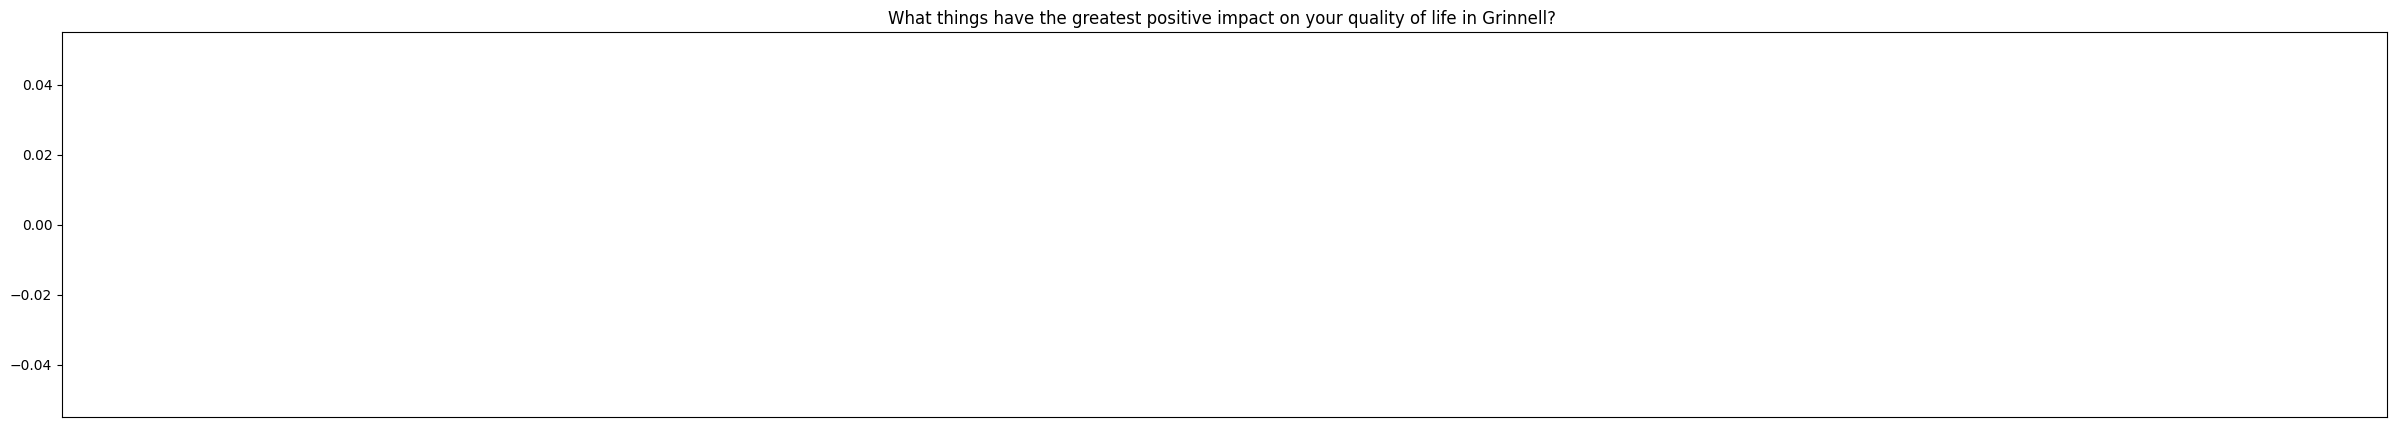

{'college': 4, 'friend': 3, 'church': 2, 'event': 2, 'family': 2, 'living': 1, 'job': 1, 'opportunity': 1, 'town': 1, 'impact': 1, 'quality': 1, 'life': 1, 'program': 1, 'summer': 1, 'park': 1, 'bike': 1, 'trail': 1, 'club': 1, 'school': 1, 'service': 1, 'education': 1, 'career': 1}


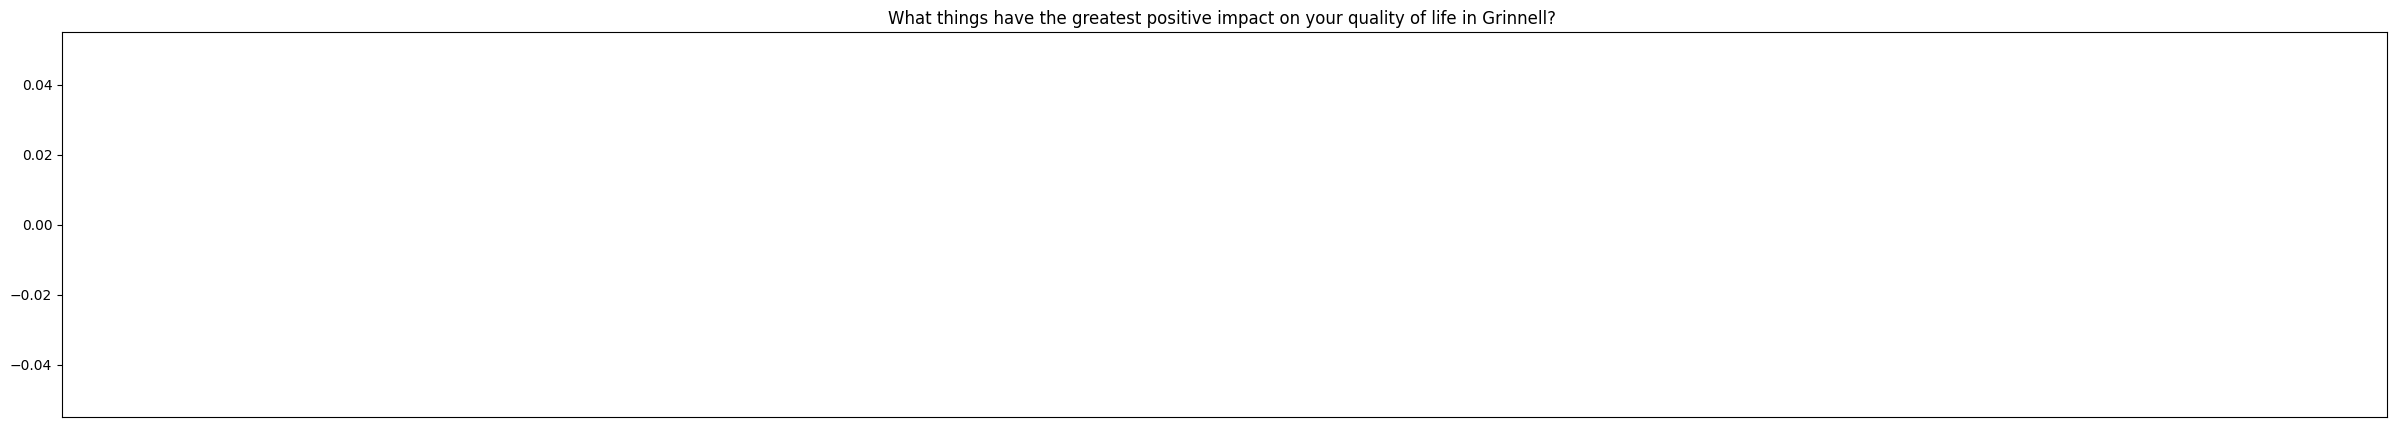

In [47]:
clusters_noun(clustering2[1], "What things have the greatest positive impact on your quality of life in Grinnell? ",  16)
clusters_noun(clustering2[2], "What things have the greatest positive impact on your quality of life in Grinnell? ",  16)
clusters_noun(clustering2[3], "What things have the greatest positive impact on your quality of life in Grinnell? ",  16)
clusters_noun(clustering2[4], "What things have the greatest positive impact on your quality of life in Grinnell? ",  16)
clusters_noun(clustering2[5], "What things have the greatest positive impact on your quality of life in Grinnell? ",  16)

# Question 3 Clusters


In [48]:
clustering3 = clustering(3)
k_clusters3 = clustering3[0]
print_clusters(k_clusters3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
[0, 1, 2, 3, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 25, 27, 29, 33, 35, 38, 39, 40, 42, 43, 44, 48, 50, 51, 52, 55, 56, 57, 58, 59, 61, 62, 63, 65, 68, 72, 73, 74, 75, 76, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97, 99, 104, 105, 106, 107, 108, 109, 112, 113, 115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 128, 141, 143, 148, 151, 156, 157, 158, 159, 163, 164, 166, 168, 169, 171, 172, 174, 175, 176, 179, 181, 183, 185, 189, 190, 192, 193, 194, 195, 197, 198, 200, 201, 203, 204, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 221, 222, 224, 225, 229, 230, 233, 234, 237, 246, 252, 254, 256, 257, 258, 263, 264, 267, 268, 269, 270, 273, 275, 276, 277, 278, 280, 283, 284, 285, 288, 289, 291, 292, 293, 294, 299, 300, 301, 302, 305, 307, 309, 311, 312, 313, 314, 315, 317, 318, 320, 321, 327, 328, 330, 331, 332, 333, 334, 335, 336, 337, 338, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350]

Cluster 3:
[5, 21, 22, 28, 36, 37, 41, 45, 49, 53, 5

{'event': 38, 'park': 20, 'community': 18, 'music': 13, 'school': 10, 'thing': 5, 'support': 5, 'town': 4, 'downtown': 4, 'parade': 4, 'college': 4, 'time': 4, 'year': 3, 'concert': 3, 'activity': 3, 'everyone': 3, 'effort': 2, 'summer': 2, 'lighting': 2, 'breakfast': 2, 'sport': 2, 'art': 2, 'farmer': 2, 'market': 2, 'theatre': 2, 'banner': 2, 'family': 2, 'band': 2, 'play': 2, 'service': 2, 'student': 2, 'game': 2, 'derecho': 2, 'evening': 2, 'member': 2, 'pool': 2, 'campaign': 1, 'protect': 1, 'organization': 1, 'program': 1, 'ceremony': 1, 'volunteer': 1, 'fire': 1, 'house': 1, 'pancake': 1, 'tree': 1, 'food': 1, 'beer': 1, 'garden': 1, 'team': 1, 'state': 1, 'competition': 1, 'story': 1, 'history': 1, 'graduation': 1, 'attend': 1, 'block': 1, 'party': 1, 'festival': 1, 'jazz': 1, 'basketball': 1, 'performance': 1, 'hospital': 1, 'project': 1, 'accomplishment': 1, 'radio': 1, 'age': 1, 'interest': 1, 'gather': 1, 'enjoy': 1, 'variety': 1, 'business': 1, 'leader': 1, 'candy': 1, 'sm

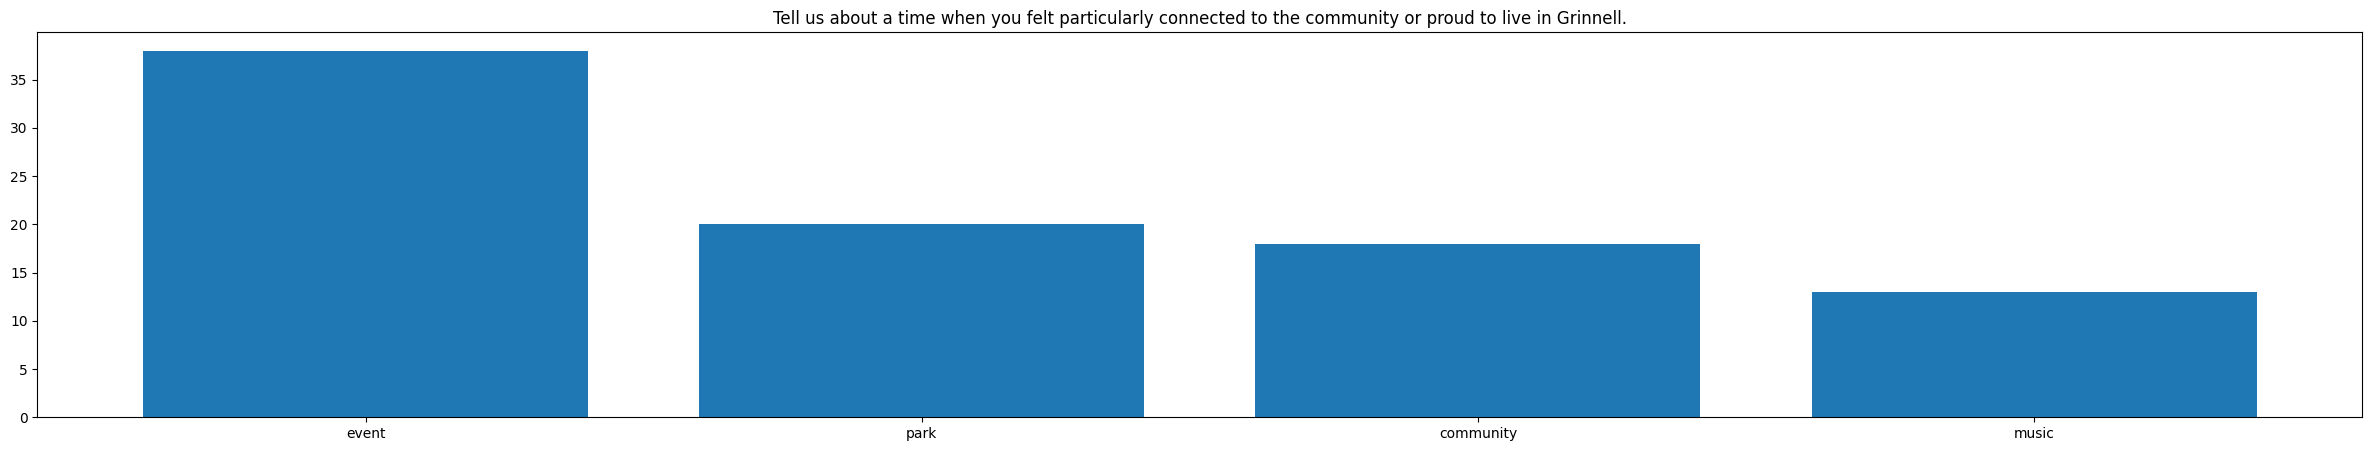

{'community': 64, 'town': 27, 'year': 16, 'school': 16, 'business': 15, 'family': 15, 'neighbor': 13, 'time': 12, 'member': 11, 'college': 11, 'help': 10, 'work': 10, 'support': 10, 'day': 9, 'church': 9, 'thing': 8, 'student': 8, 'friend': 7, 'way': 7, 'opportunity': 7, 'service': 6, 'organization': 6, 'place': 6, 'experience': 6, 'activity': 6, 'market': 6, 'lot': 6, 'derecho': 5, 'food': 5, 'farmer': 5, 'idea': 5, 'storm': 5, 'housing': 4, 'something': 4, 'city': 4, 'group': 4, 'health': 4, 'life': 4, 'visit': 4, 'home': 4, 'night': 4, 'part': 4, 'farm': 4, 'music': 4, 'morning': 4, 'effort': 4, 'shop': 4, 'development': 3, 'choice': 3, 'board': 3, 'person': 3, 'week': 3, 'resident': 3, 'fact': 3, 'store': 3, 'project': 3, 'money': 3, 'hospital': 3, 'fun': 3, 'care': 3, 'play': 3, 'response': 3, 'safety': 3, 'power': 3, 'month': 3, 'talk': 3, 'share': 3, 'owner': 3, 'son': 3, 'visitor': 3, 'park': 3, 'team': 3, 'campus': 3, 'film': 3, 'location': 3, 'coffee': 3, 'space': 3, 'option'

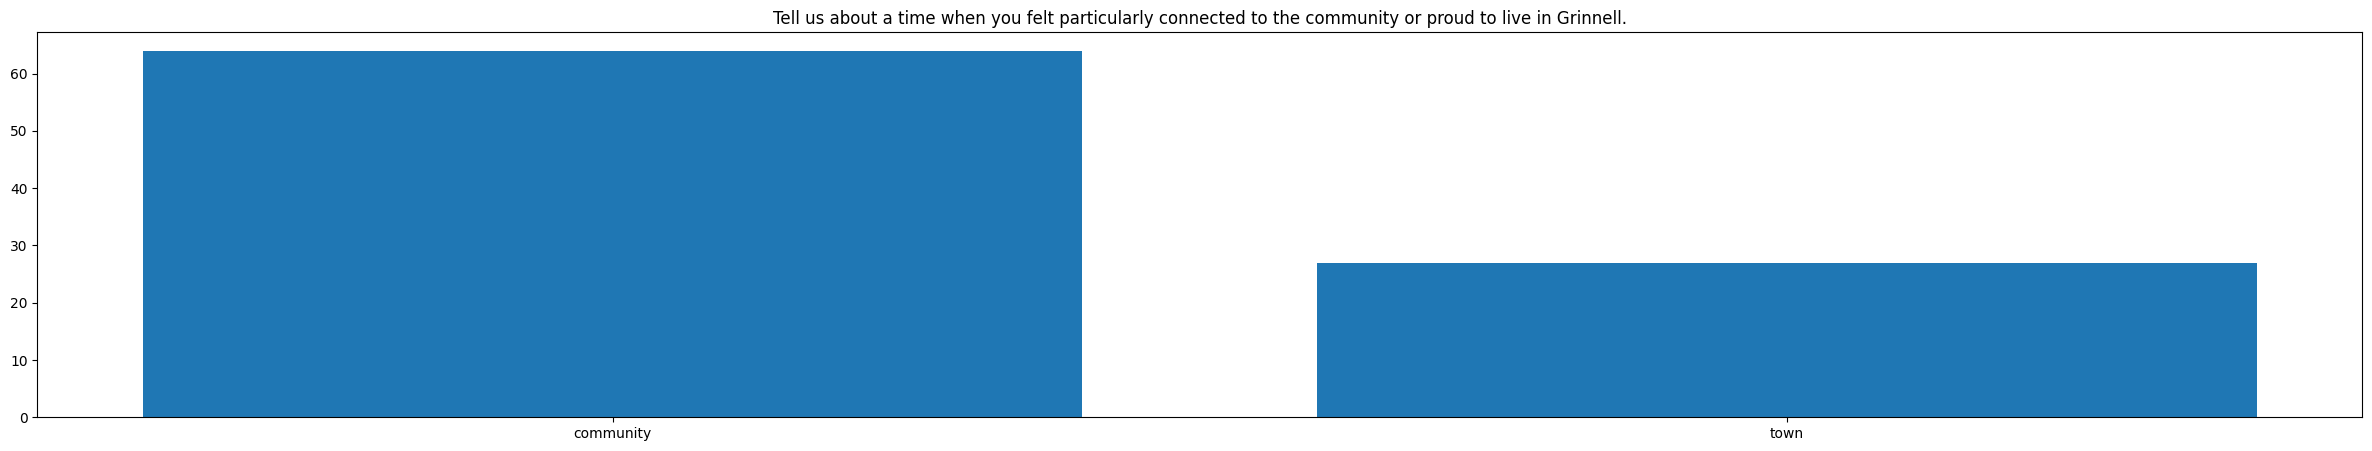

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

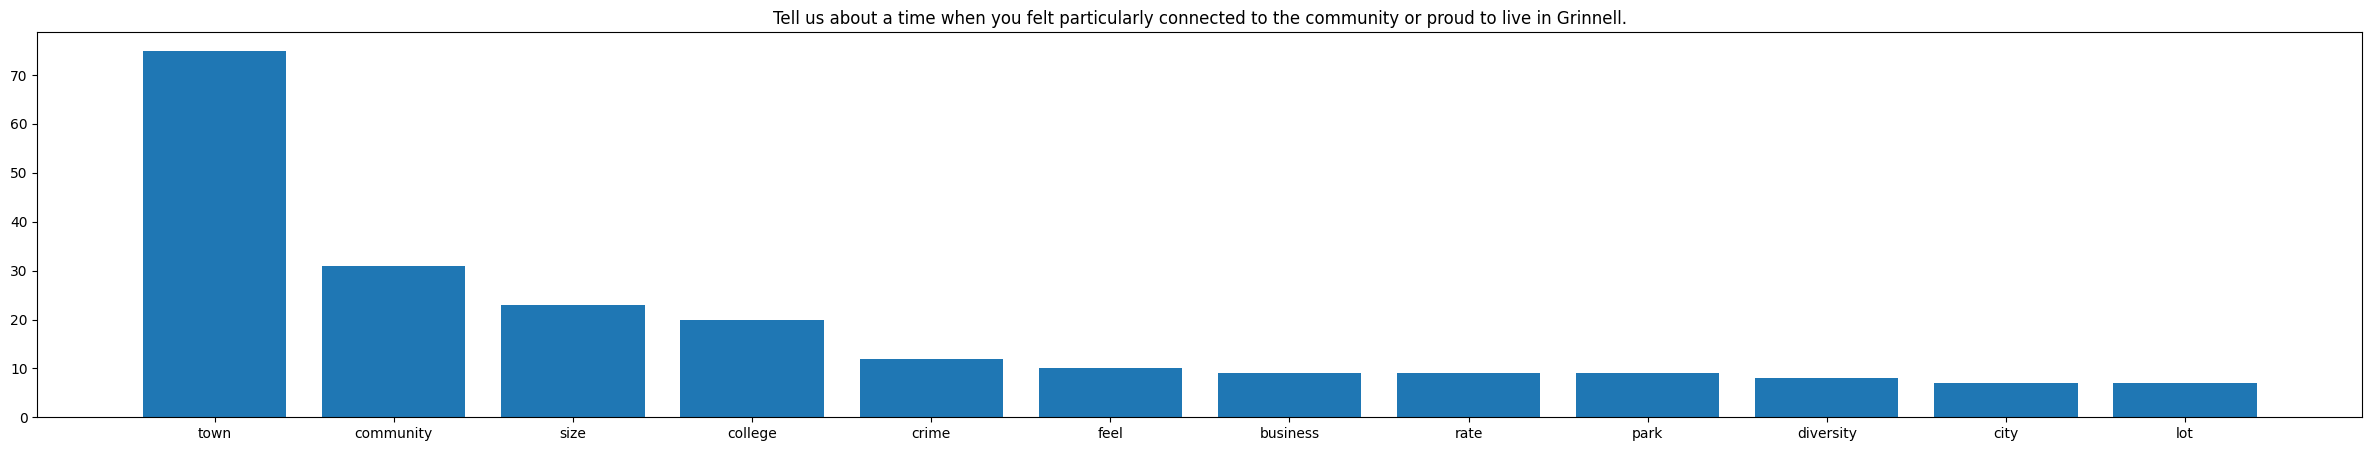

{'everyone': 15, 'derecho': 12, 'help': 8, 'community': 6, 'neighbor': 4, 'time': 3, 'effort': 2, 'power': 2, 'way': 2, 'support': 2, 'partnership': 1, 'activity': 1, 'disaster': 1, 'recovery': 1, 'outage': 1, 'park': 1, 'sense': 1, 'history': 1, 'food': 1, 'Everyone': 1, 'pull': 1, 'day': 1, 'everybody': 1, 'clean': 1, 'lot': 1, 'matter': 1, 'cause': 1, 'street': 1, 'sport': 1, 'need': 1, 'crisis': 1, 'death': 1, 'division': 1}


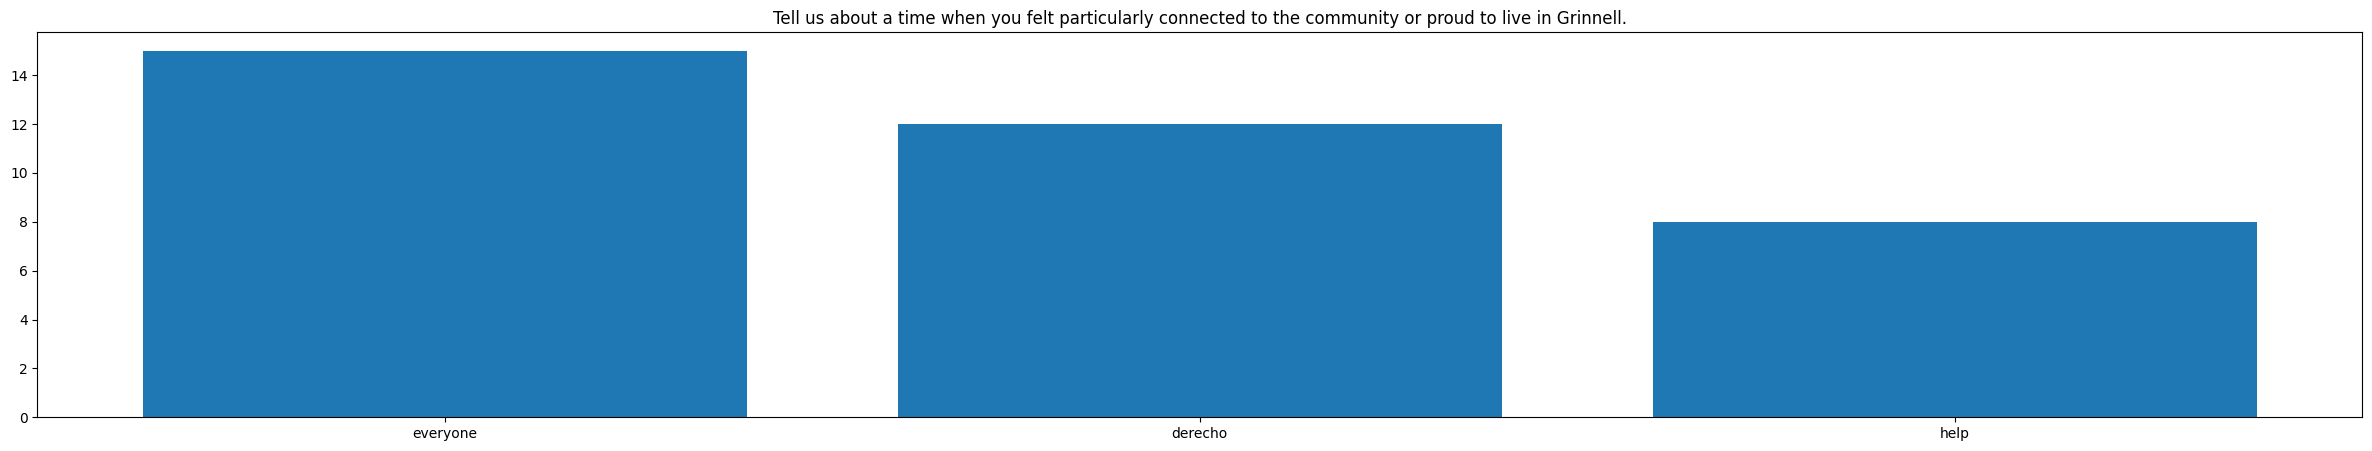

{'community': 26, 'time': 14, 'year': 10, 'feel': 6, 'school': 6, 'part': 5, 'business': 4, 'event': 4, 'friend': 4, 'season': 4, 'way': 3, 'see': 3, 'support': 3, 'holiday': 3, 'organization': 2, 'grinnell': 2, 'work': 2, 'group': 2, 'miss': 2, 'memory': 2, 'restaurant': 2, 'summer': 2, 'show': 2, 'life': 2, 'farm': 2, 'student': 2, 'college': 2, 'church': 1, 'belong': 1, 'reach': 1, 'involvement': 1, 'employer': 1, 'teaching': 1, 'son': 1, 'team': 1, 'place': 1, 'pride': 1, 'connection': 1, 'shop': 1, 'neighbor': 1, 'resource': 1, 'activity': 1, 'museum': 1, 'art': 1, 'council': 1, 'system': 1, 'attendence': 1, 'participation': 1, 'live': 1, 'congregation': 1, 'charity': 1, 'attend': 1, 'look': 1, 'family': 1, 'variety': 1, 'instance': 1, 'devastation': 1, 'derecho': 1, 'mentality': 1, 'celebration': 1, 'crisis': 1, 'felt': 1, 'area': 1, 'decade': 1, 'moment': 1, 'music': 1, 'food': 1, 'vibe': 1, 'point': 1, 'experience': 1, 'cookout': 1, 'backyard': 1, 'night': 1, 'culmination': 1, 

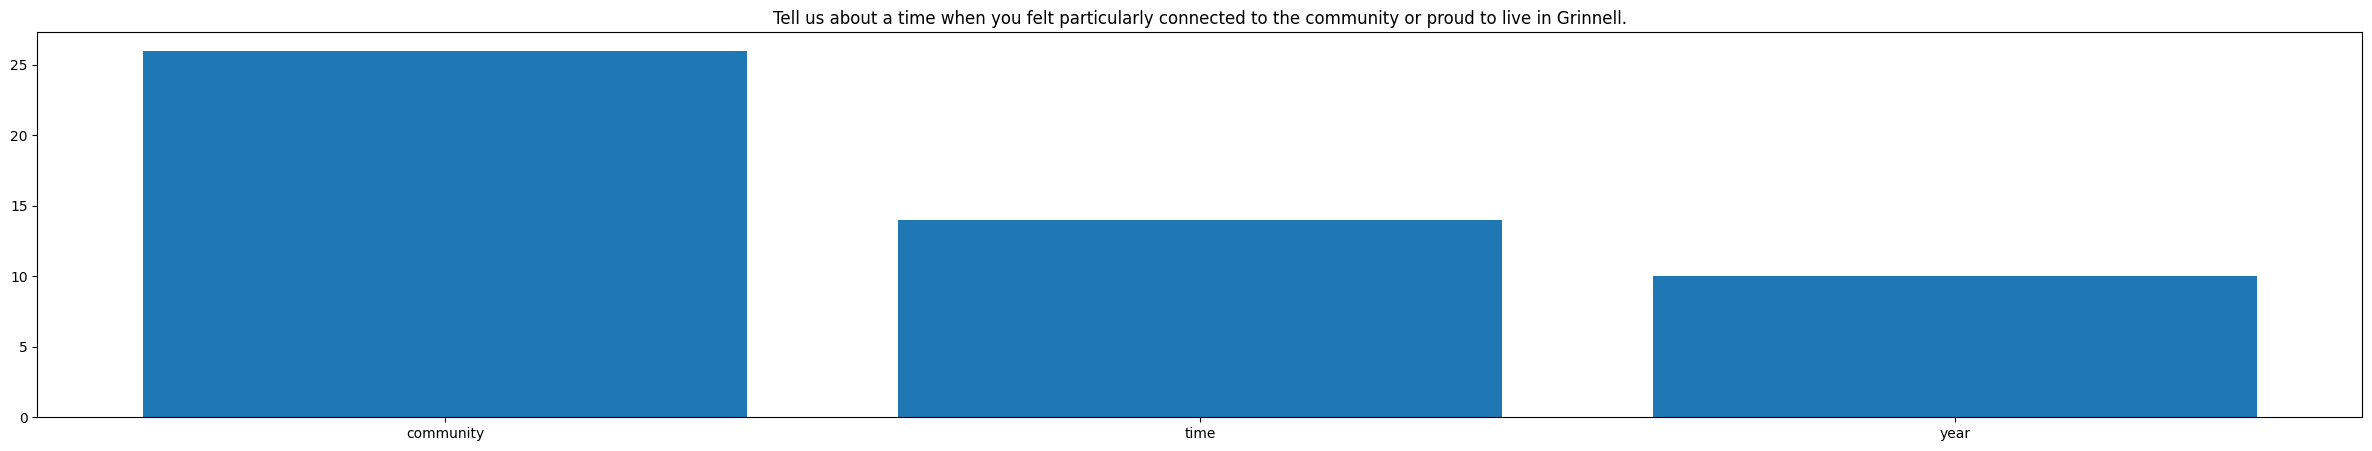

In [50]:
clusters_noun(clustering3[1], "Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.",  10)
clusters_noun(clustering3[2], "Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.",  16)
clusters_noun(clustering3[3], "Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.",  6)
clusters_noun(clustering3[4], "Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.",  6)
clusters_noun(clustering3[5], "Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.",  6)

# Question 4 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3:
[0, 1, 3, 4, 5, 7, 8, 13, 15, 16, 17, 19, 20, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 42, 45, 46, 47, 48, 50, 51, 52, 55, 56, 57, 60, 62, 65, 66, 68, 69, 70, 74, 76, 78, 81, 84, 86, 88, 89, 90, 91, 93, 94, 95, 99, 101, 102, 103, 106, 107, 109, 110, 111, 112, 113, 115, 117, 118, 120, 122, 123, 124, 127, 128, 132, 133, 135, 138, 139, 140, 144, 147, 149, 152, 153, 157, 159, 162, 163, 165, 167, 168, 170, 171, 174, 175, 178, 179, 181, 182, 183, 185, 188, 191, 192, 193, 194, 198, 200, 203, 207, 208, 209, 211, 212, 214, 215, 216, 218, 219, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 239, 240, 241, 242, 243, 244, 246, 247, 248, 253, 255, 257, 259, 261, 262, 263, 266, 267, 268, 269, 274, 275, 276, 277, 280, 281, 283, 284, 285, 289, 293, 294, 295, 296, 297, 300, 301, 303, 310, 311, 313, 315, 317, 318, 319, 321, 323, 324, 329, 330, 331, 337, 338, 339, 340, 342, 343]

Cluster 2:
[2, 6, 9, 14, 18, 21, 22, 34, 43, 44, 49, 54, 58, 61, 63, 67, 7

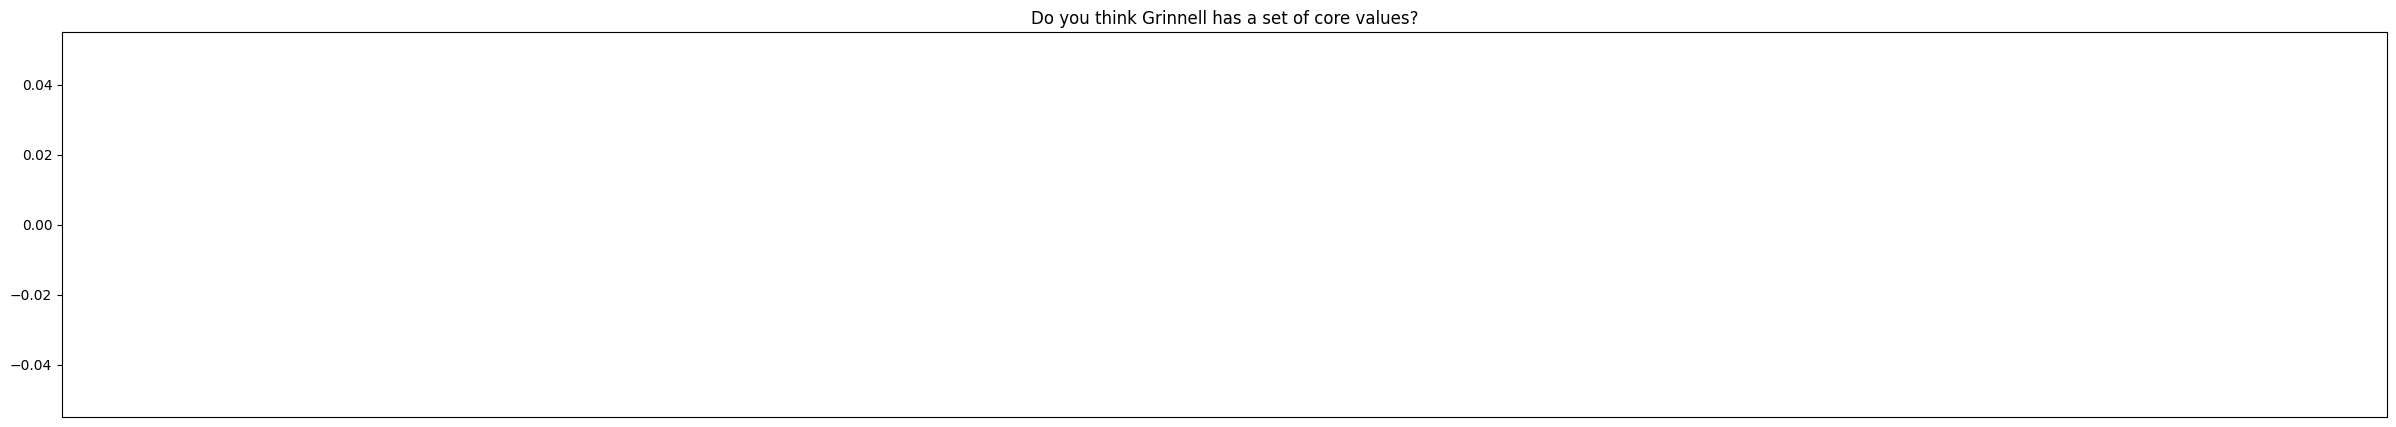

{'sure': 2, 'value': 2, 'feel': 1, 'day': 1, 'question': 1, 'community': 1, 'state': 1, 'college': 1, 'core': 1, 'city': 1}


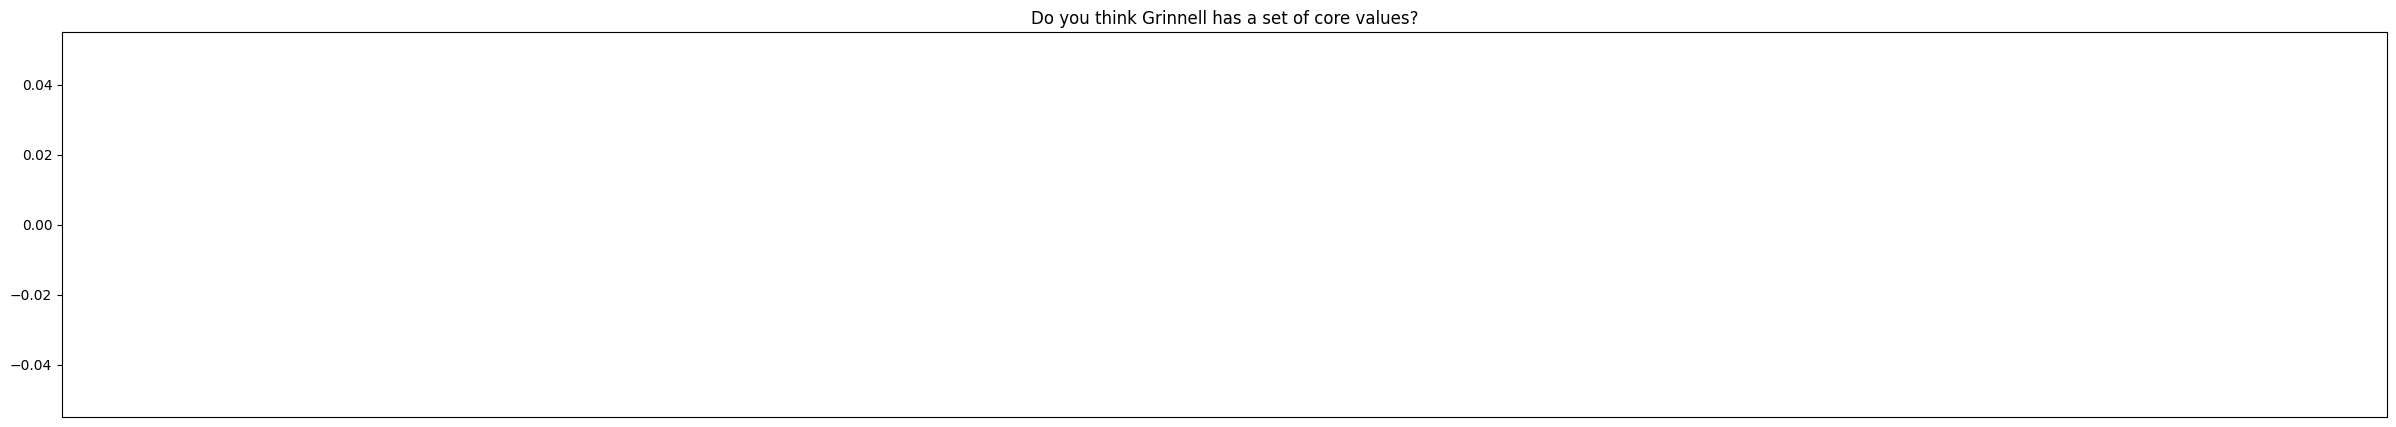

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

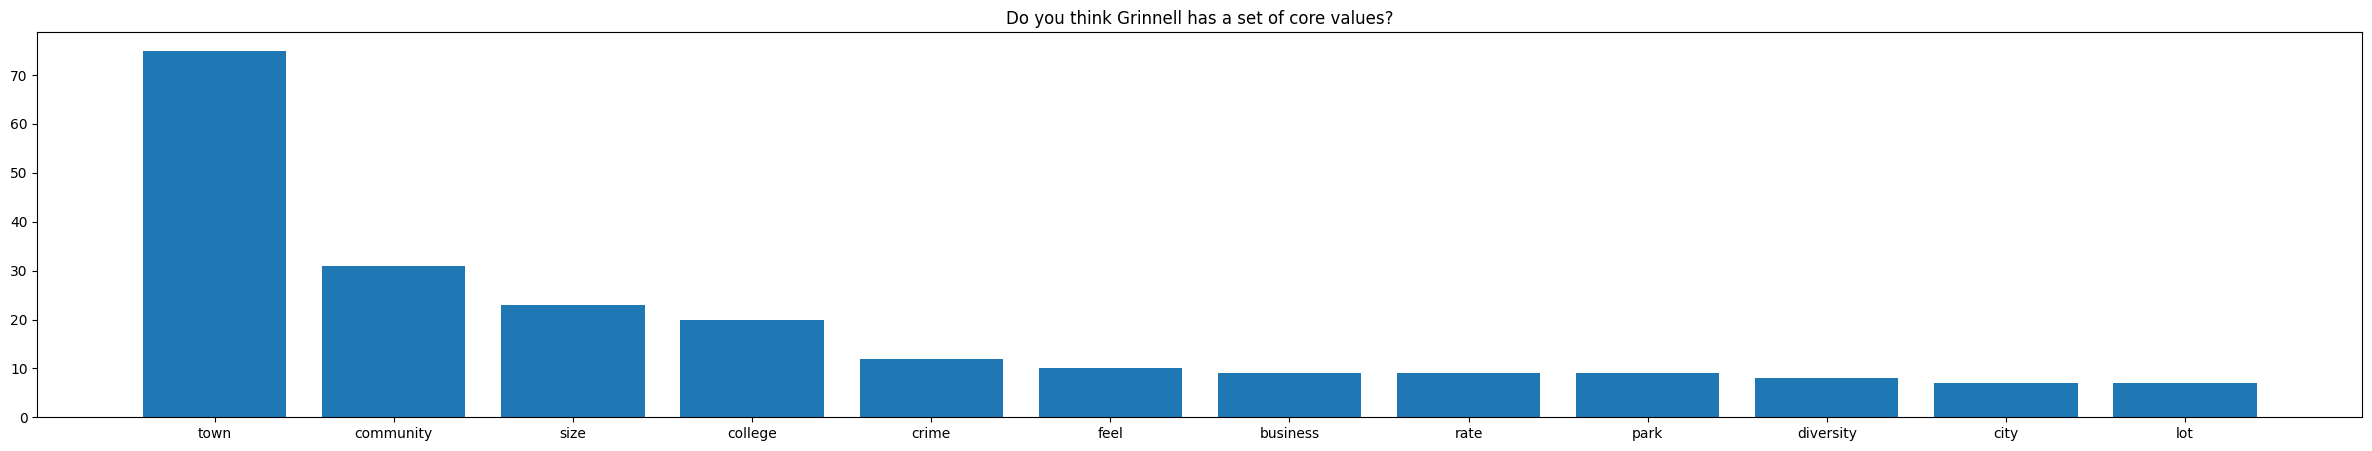

{'community': 47, 'value': 19, 'school': 13, 'college': 11, 'town': 10, 'thing': 10, 'city': 9, 'neighbor': 9, 'everyone': 8, 'care': 8, 'belief': 7, 'education': 7, 'idea': 7, 'core': 6, 'family': 6, 'year': 6, 'sense': 6, 'life': 5, 'way': 5, 'business': 5, 'population': 5, 'kindness': 5, 'place': 4, 'diversity': 4, 'kind': 4, 'work': 4, 'help': 4, 'opportunity': 4, 'time': 4, 'change': 4, 'respect': 4, 'friend': 4, 'country': 4, 'priority': 3, 'football': 3, 'resident': 3, 'group': 3, 'problem': 3, 'member': 3, 'difference': 3, 'support': 3, 'Education': 3, 'need': 3, 'event': 3, 'inclusion': 3, 'racism': 3, 'child': 3, 'responsibility': 3, 'money': 3, 'street': 3, 'state': 3, 'building': 3, 'feel': 3, 'health': 2, 'level': 2, 'park': 2, 'field': 2, 'committee': 2, 'income': 2, 'conversation': 2, 'attitude': 2, 'divide': 2, 'agriculture': 2, 'play': 2, 'le': 2, 'age': 2, 'pride': 2, 'etc': 2, 'vision': 2, 'opinion': 2, 'area': 2, 'disaster': 2, 'environment': 2, 'district': 2, 'imag

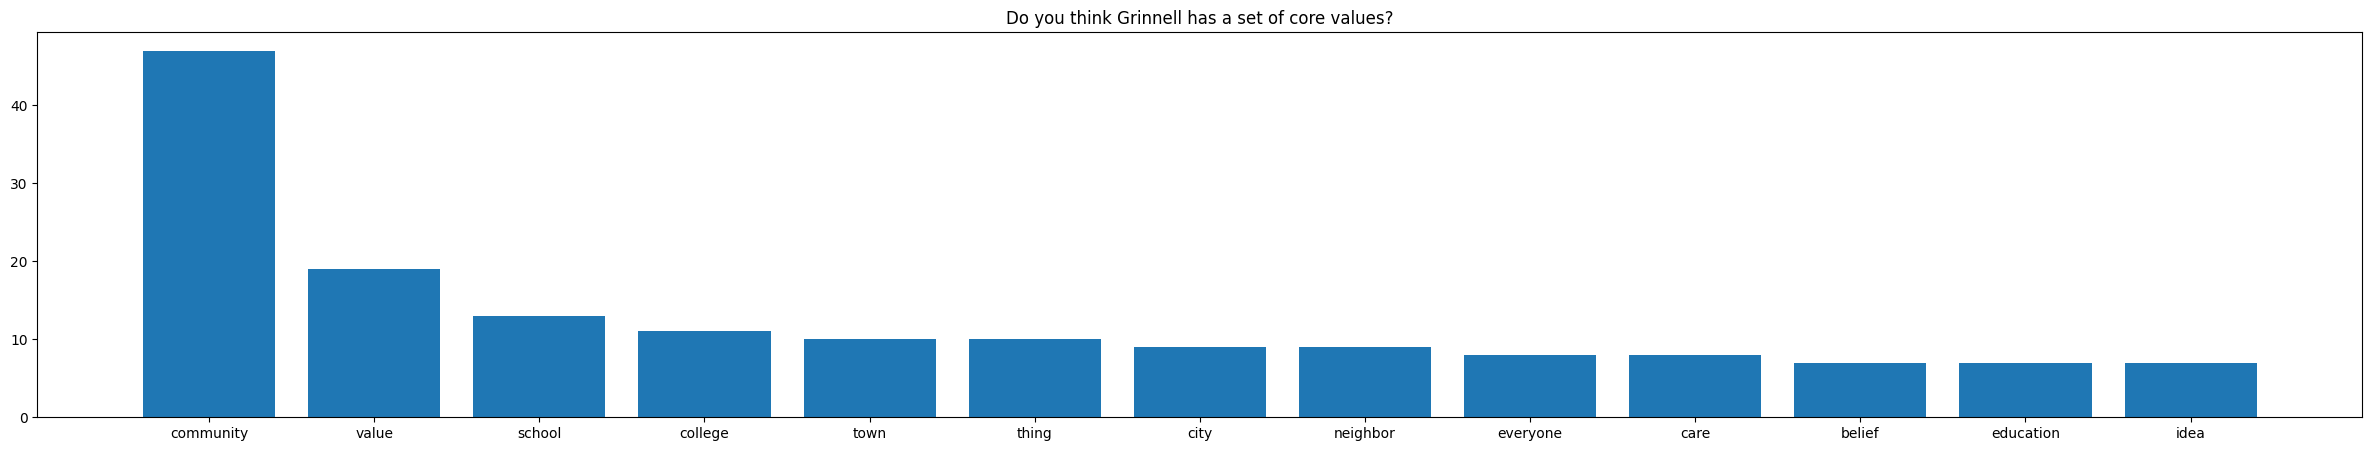

{'community': 16, 'college': 4, 'family': 2, 'member': 2, 'care': 2, 'support': 1, 'business': 1, 'generation': 1, 'transient': 1, 'progress': 1, 'mark': 1, 'graduate': 1, 'buy': 1, 'sense': 1, 'inclusion': 1, 'equity': 1, 'hesitant': 1, 'focus': 1, 'development': 1}


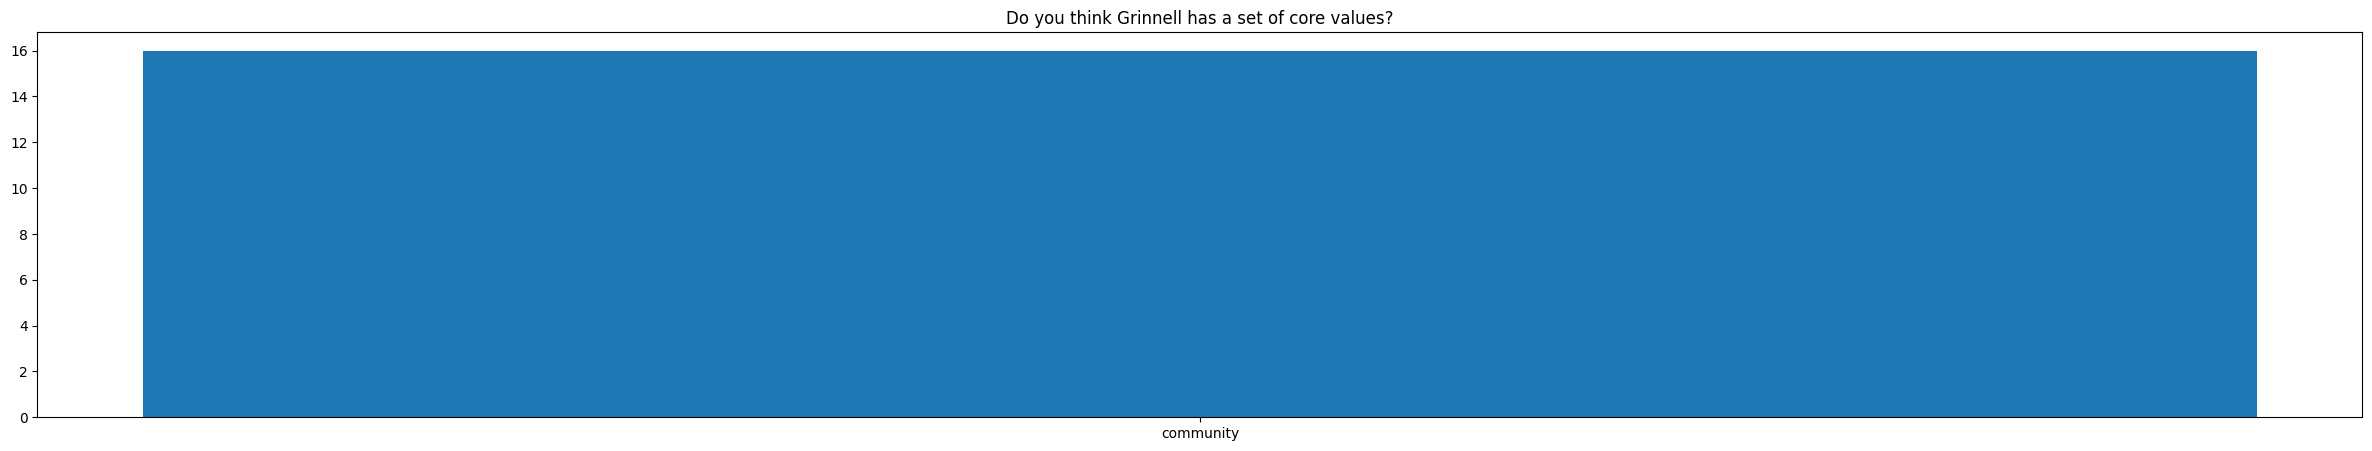

In [52]:
clustering4 = clustering(4)
k_clusters4 = clustering4[0]
print_clusters(k_clusters4)
clusters_noun(clustering4[1], "Do you think Grinnell has a set of core values?",  10)
clusters_noun(clustering4[2], "Do you think Grinnell has a set of core values?",  16)
clusters_noun(clustering4[3], "Do you think Grinnell has a set of core values?",  6)
clusters_noun(clustering4[4], "Do you think Grinnell has a set of core values?",  6)
clusters_noun(clustering4[5], "Do you think Grinnell has a set of core values?",  6)

# Question 5 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 31, 33, 35, 38, 39, 40, 41, 42, 43, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 76, 78, 79, 84, 85, 86, 87, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 122, 123, 124, 128, 130, 131, 133, 134, 135, 137, 140, 141, 142, 144, 146, 149, 151, 152, 153, 154, 155, 156, 158, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 177, 178, 180, 181, 185, 186, 188, 190, 191, 192, 193, 196, 197, 198, 200, 201, 203, 206, 209, 211, 213, 214, 215, 216, 218, 219, 220, 221, 224, 225, 226, 227, 228, 236, 237, 239, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 256, 260, 261, 262, 263, 269, 270, 272, 273, 277, 278, 279, 283, 284, 285, 291, 294, 299, 301, 302, 306, 307, 308, 309, 310, 311, 312, 314, 316, 317, 318, 319, 320, 321, 322, 324, 325, 326]

Cluster 3:
[1, 13, 15, 30, 32, 47, 63, 82, 83, 88, 93,

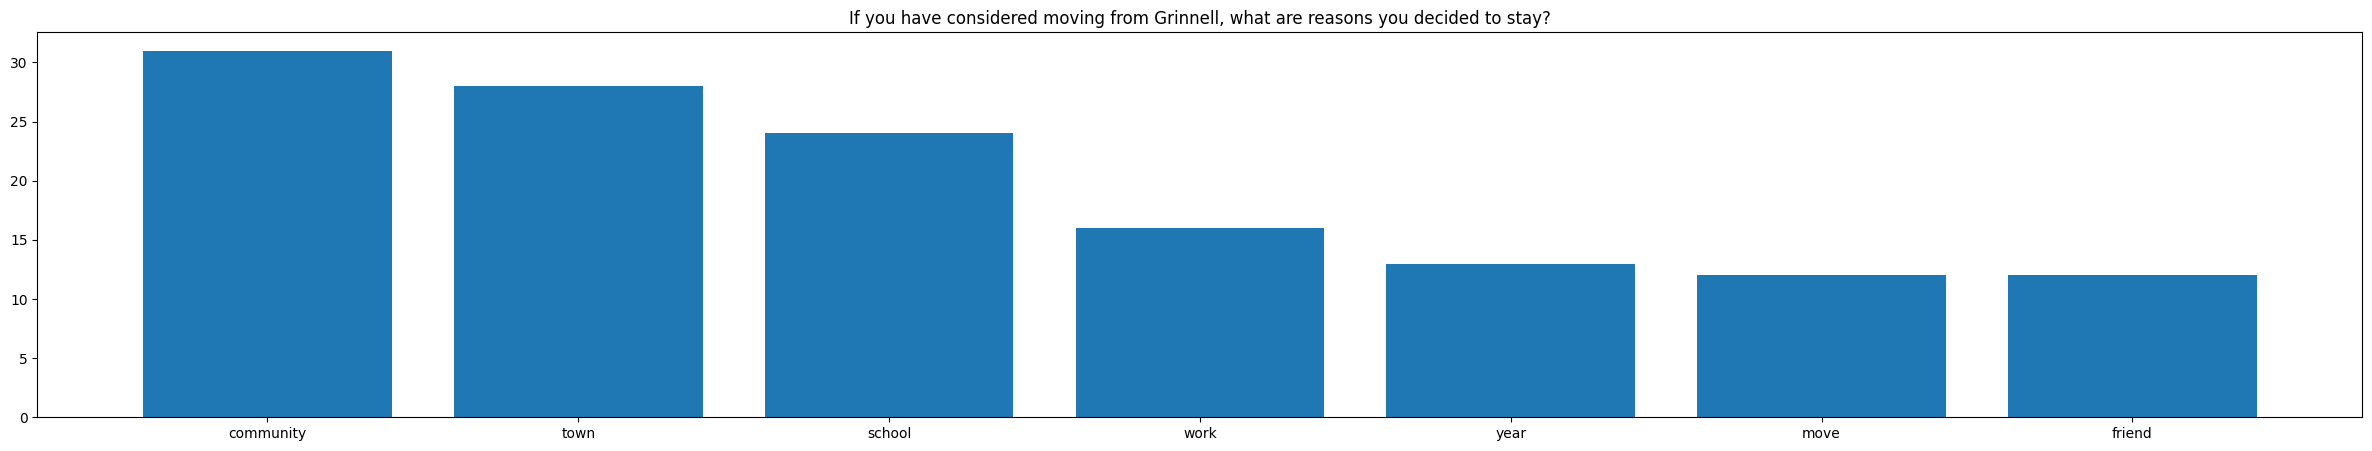

{'family': 6}


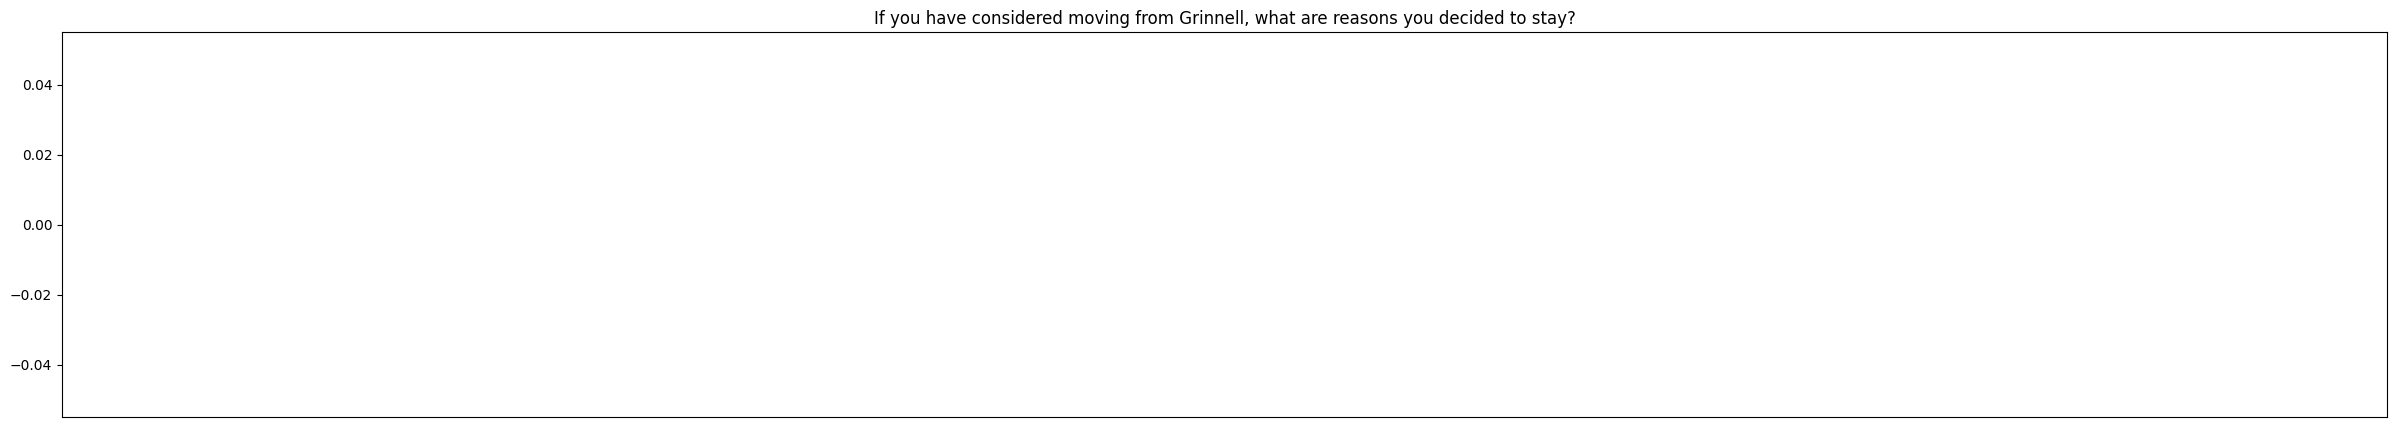

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

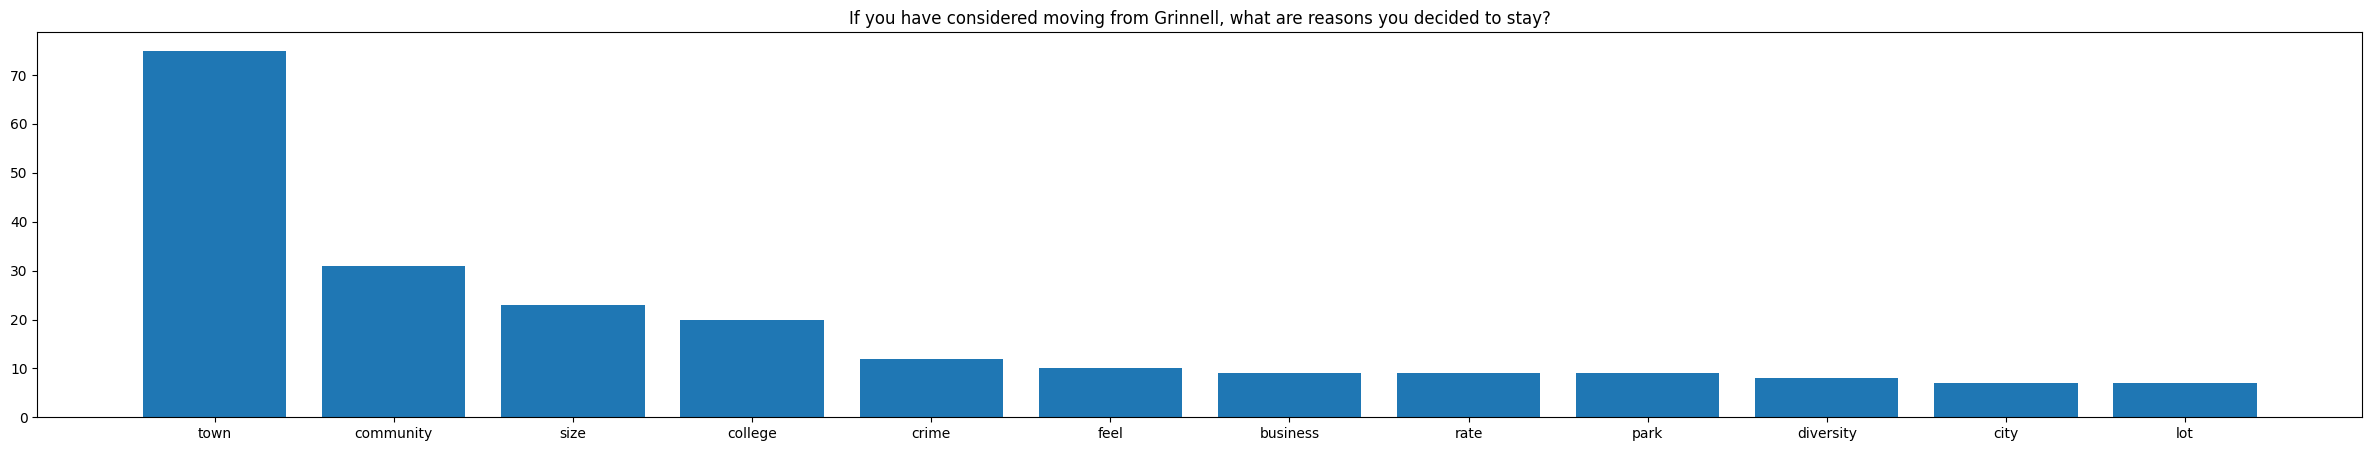

{'family': 31, 'friend': 9, 'community': 7, 'town': 6, 'life': 6, 'job': 5, 'connection': 5, 'home': 4, 'school': 3, 'work': 3, 'opportunity': 3, 'cost': 3, 'living': 3, 'stay': 3, 'college': 2, 'group': 2, 'reason': 2, 'place': 2, 'church': 2, 'grandma': 2, 'district': 1, 'security': 1, 'form': 1, 'kid': 1, 'amenity': 1, 'lifestyle': 1, 'customer': 1, 'proximity': 1, 'kind': 1, 'generation': 1, 'nature': 1, 'sport': 1, 'program': 1, 'lot': 1, 'student': 1, 'selection': 1, 'way': 1, 'variety': 1, 'shop': 1, 'entertainment': 1, 'restaurant': 1, 'love': 1, 'environment': 1, 'accommodation': 1, 'career': 1, 'partnership': 1, 'colleague': 1, 'value': 1, 'question': 1, 'move': 1, 'acquaintance': 1, 'enjoy': 1, 'vibe': 1, 'role': 1, 'bond': 1, 'help': 1}


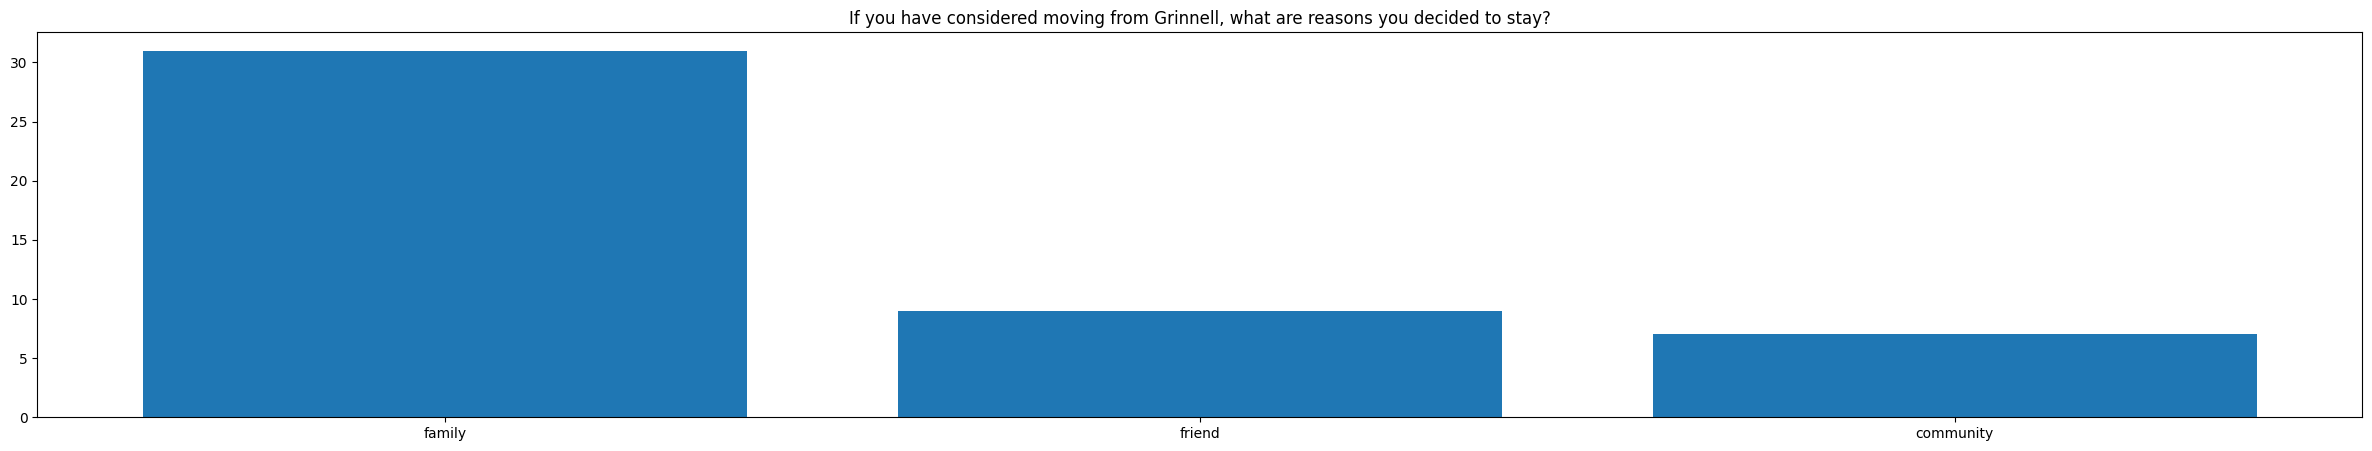

{'family': 4, 'moving': 3, 'work': 3, 'reason': 1, 'remain': 1, 'change': 1, 'staying': 1, 'friend': 1, 'education': 1, 'program': 1, 'sport': 1, 'activity': 1, 'parent': 1, 'tiger': 1, '”': 1, 'fact': 1, 'move': 1, 'opportunity': 1, 'time': 1, 'direction': 1, 'town': 1}


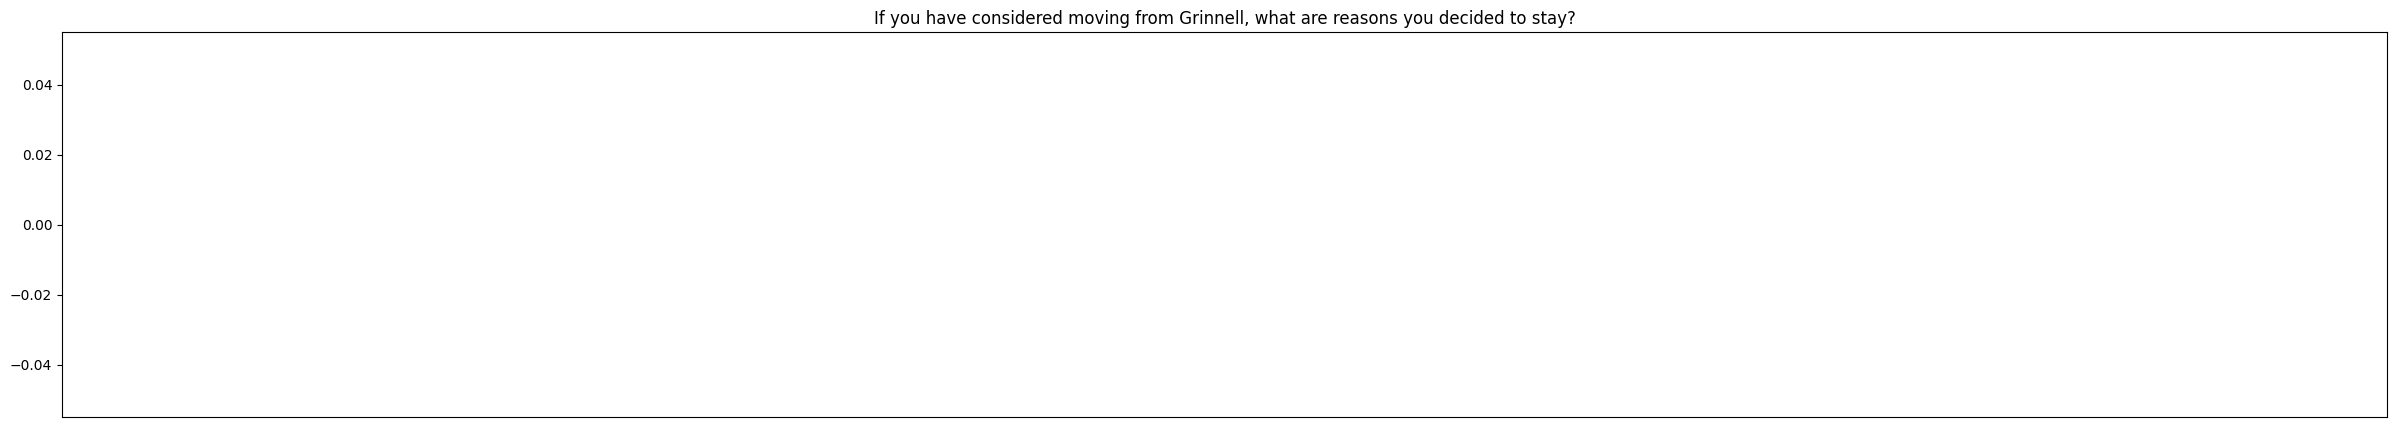

In [53]:
clustering5 = clustering(5)
k_clusters5 = clustering5[0]
print_clusters(k_clusters5)
clusters_noun(clustering5[1], "If you have considered moving from Grinnell, what are reasons you decided to stay?",  10)
clusters_noun(clustering5[2], "If you have considered moving from Grinnell, what are reasons you decided to stay?",  16)
clusters_noun(clustering5[3], "If you have considered moving from Grinnell, what are reasons you decided to stay?",  6)
clusters_noun(clustering5[4], "If you have considered moving from Grinnell, what are reasons you decided to stay?",  6)
clusters_noun(clustering5[5], "If you have considered moving from Grinnell, what are reasons you decided to stay?",  6)

#Question 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3:
[0]

Cluster 4:
[1]

Cluster 1:
[2]

Cluster 2:
[3]

Cluster 0:
[4]

{'building': 1, 'school': 1, 'concern': 1, 'affordability': 1, 'diversity': 1, 'job': 1}


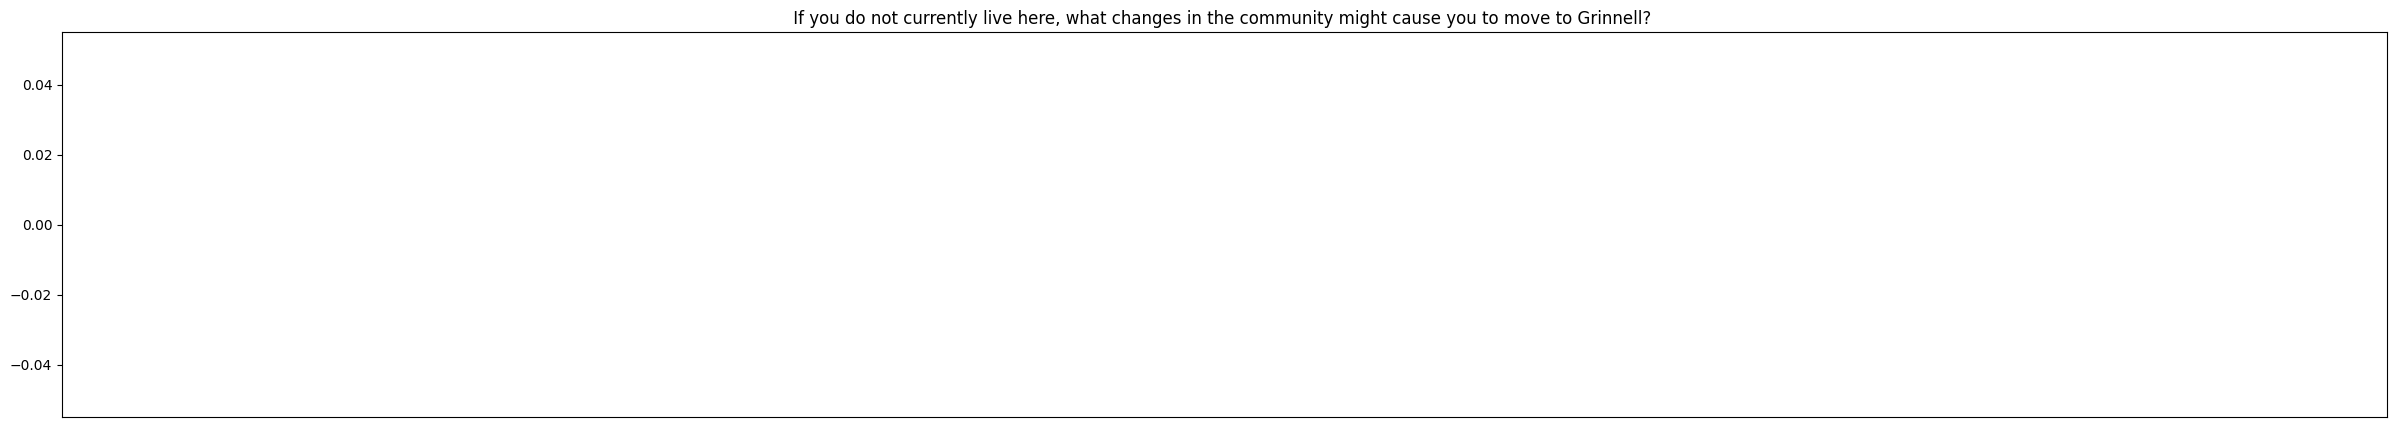

{}


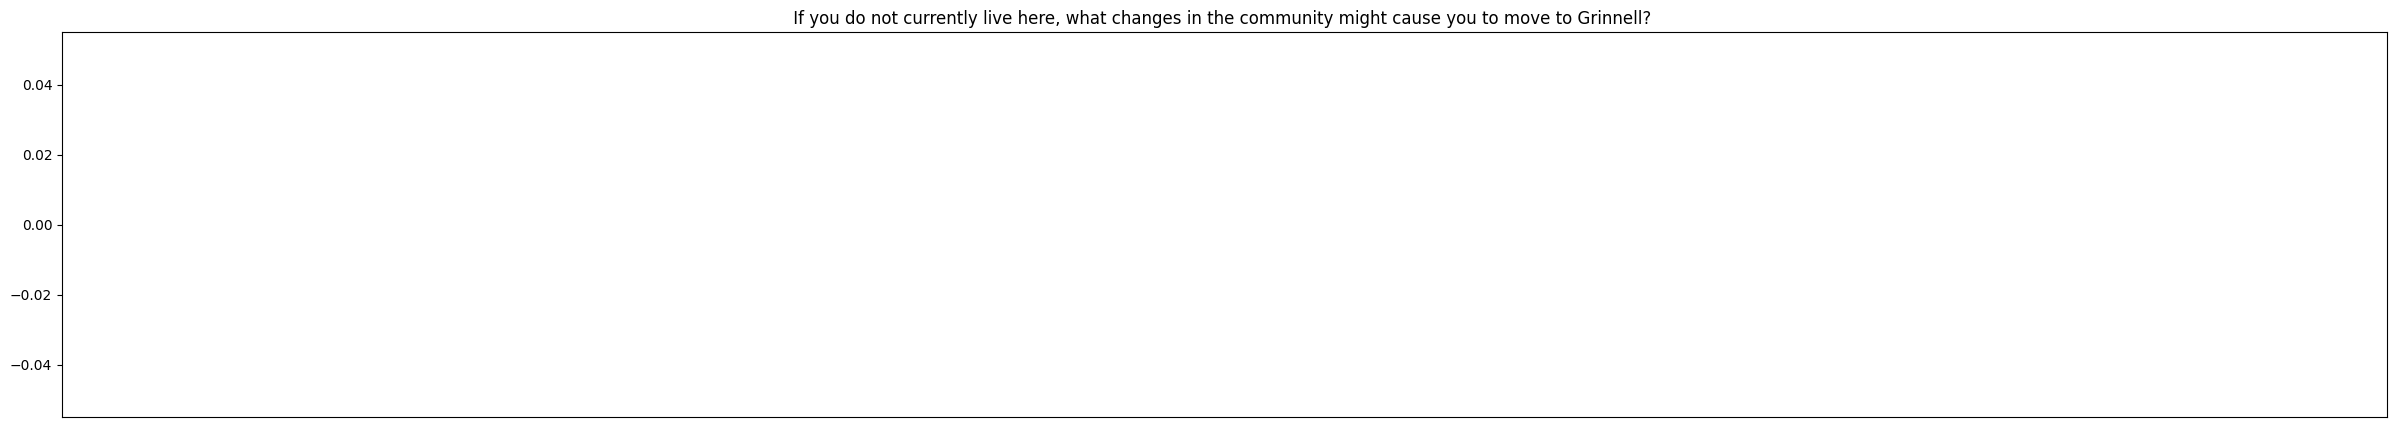

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

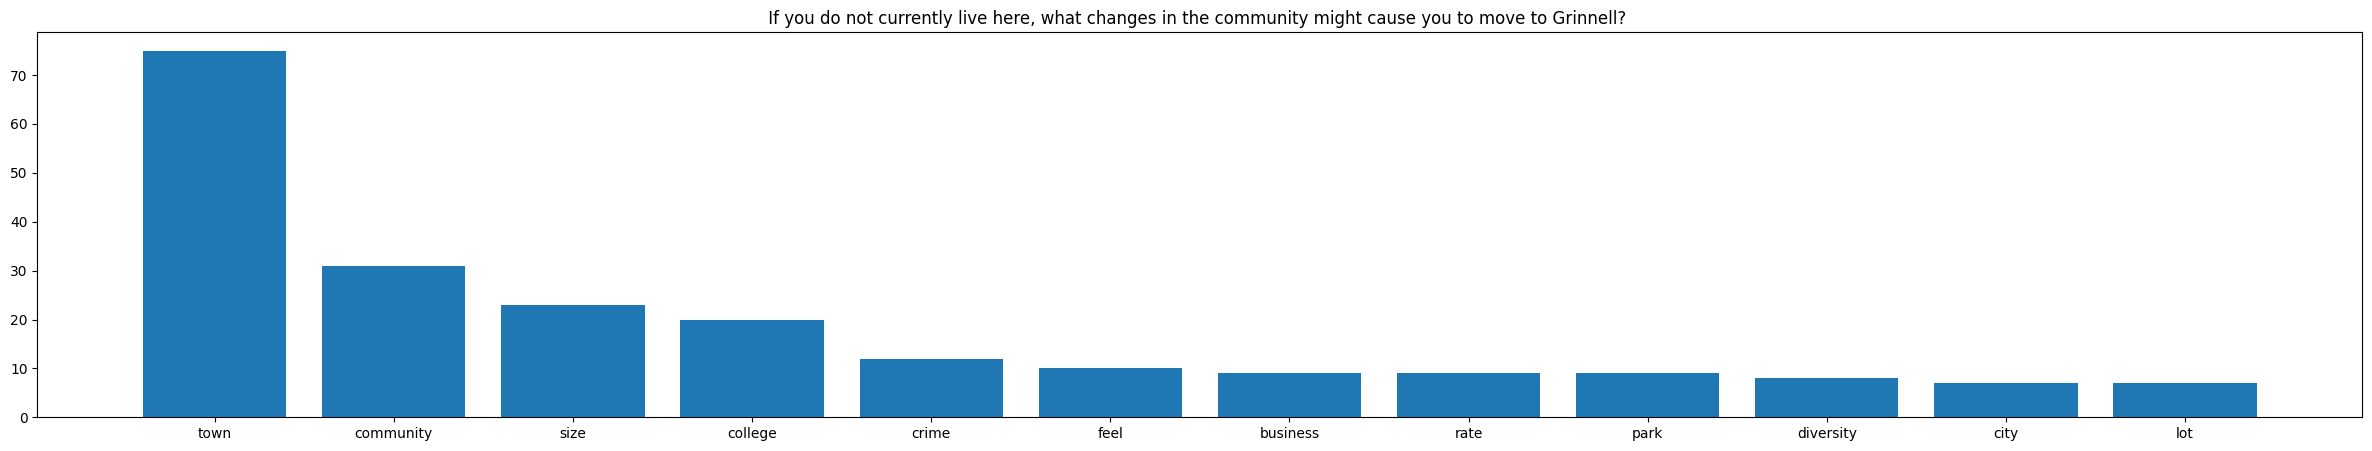

{'event': 1, 'thing': 1, 'storm': 1, 'help': 1}


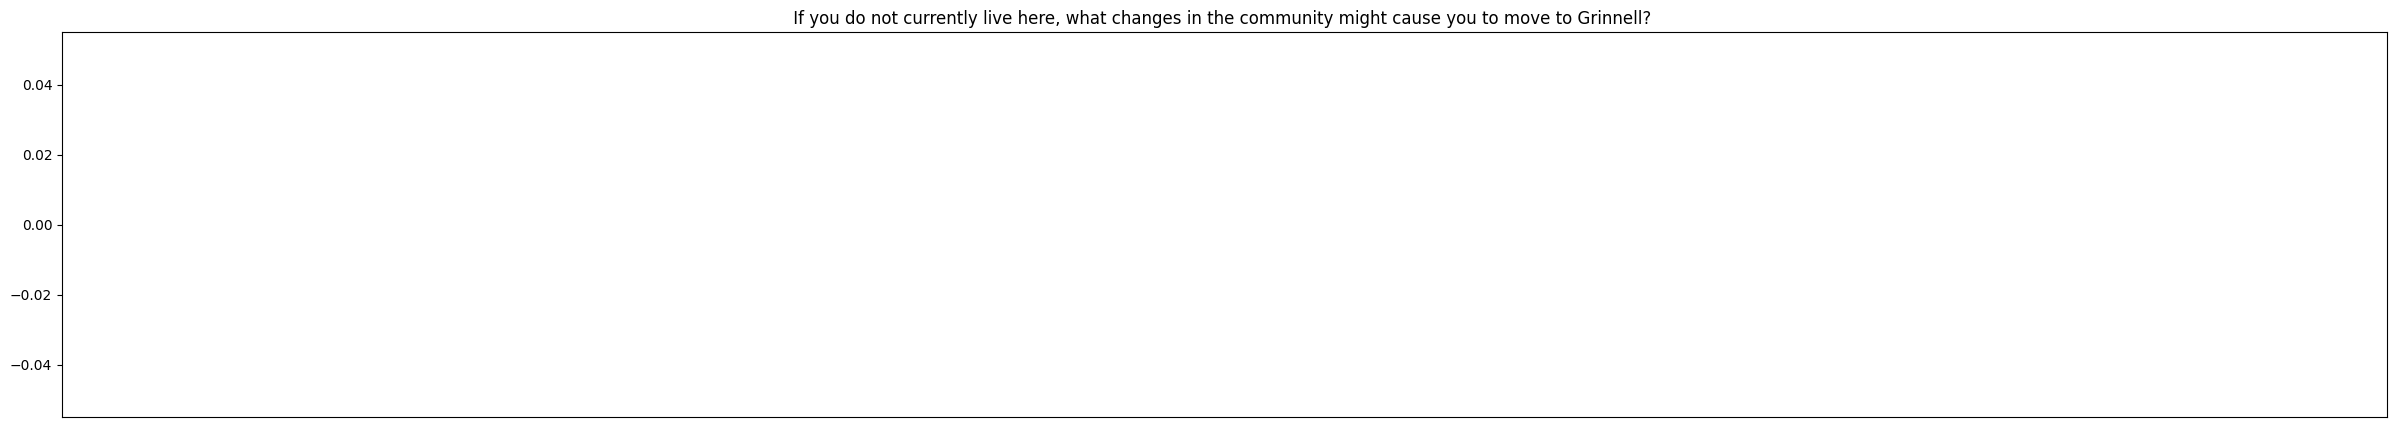

{'reduction': 1, 'property': 1, 'tax': 1}


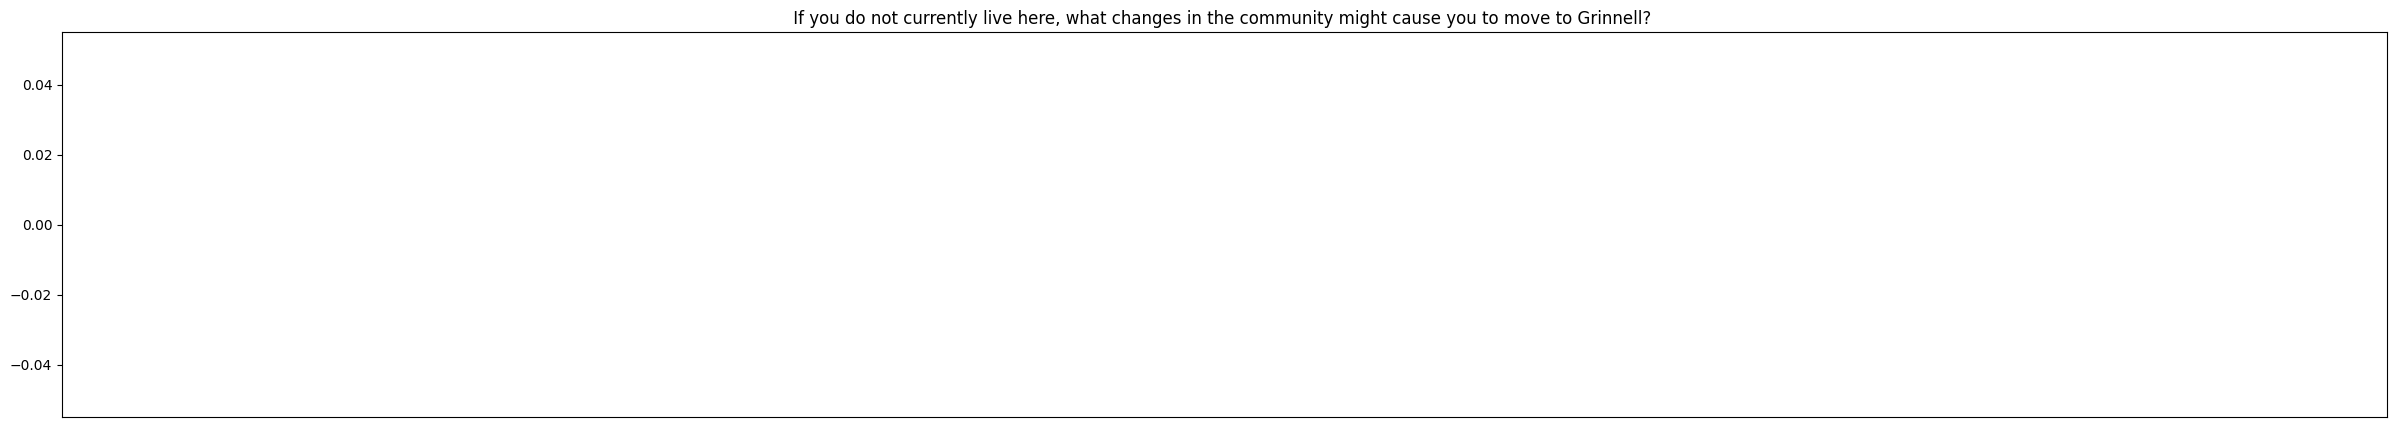

In [55]:
clustering6 = clustering(6)
k_clusters6 = clustering6[0]
print_clusters(k_clusters6)
clusters_noun(clustering6[1], " If you do not currently live here, what changes in the community might cause you to move to Grinnell?  ",  10)
clusters_noun(clustering6[2], " If you do not currently live here, what changes in the community might cause you to move to Grinnell?  ",  16)
clusters_noun(clustering6[3], " If you do not currently live here, what changes in the community might cause you to move to Grinnell?  ",  6)
clusters_noun(clustering6[4], " If you do not currently live here, what changes in the community might cause you to move to Grinnell?  ",  6)
clusters_noun(clustering6[5], " If you do not currently live here, what changes in the community might cause you to move to Grinnell?  ",  6)

# Question 7 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
[0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 27, 28, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 49, 50, 52, 53, 56, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 71, 73, 75, 78, 79, 80, 81, 82, 83, 84, 88, 90, 92, 93, 95, 96, 98, 99, 100, 102, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 118, 120, 121, 122, 125, 126, 127, 128, 129, 132, 133, 134, 138, 140, 141, 142, 144, 146, 148, 151, 152, 153, 154, 157, 158, 159, 160, 161, 162, 165, 166, 167, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 197, 198, 200, 201, 202, 204, 205, 207, 209, 211, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 233, 234, 235, 237, 239, 241, 242, 243, 244, 246, 247, 252, 253, 254, 256, 257, 258, 259, 262, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 276, 278, 279, 281, 282, 284, 285, 286, 287, 290, 291, 293, 294, 295, 296, 297, 300, 301, 303, 304, 305, 306, 

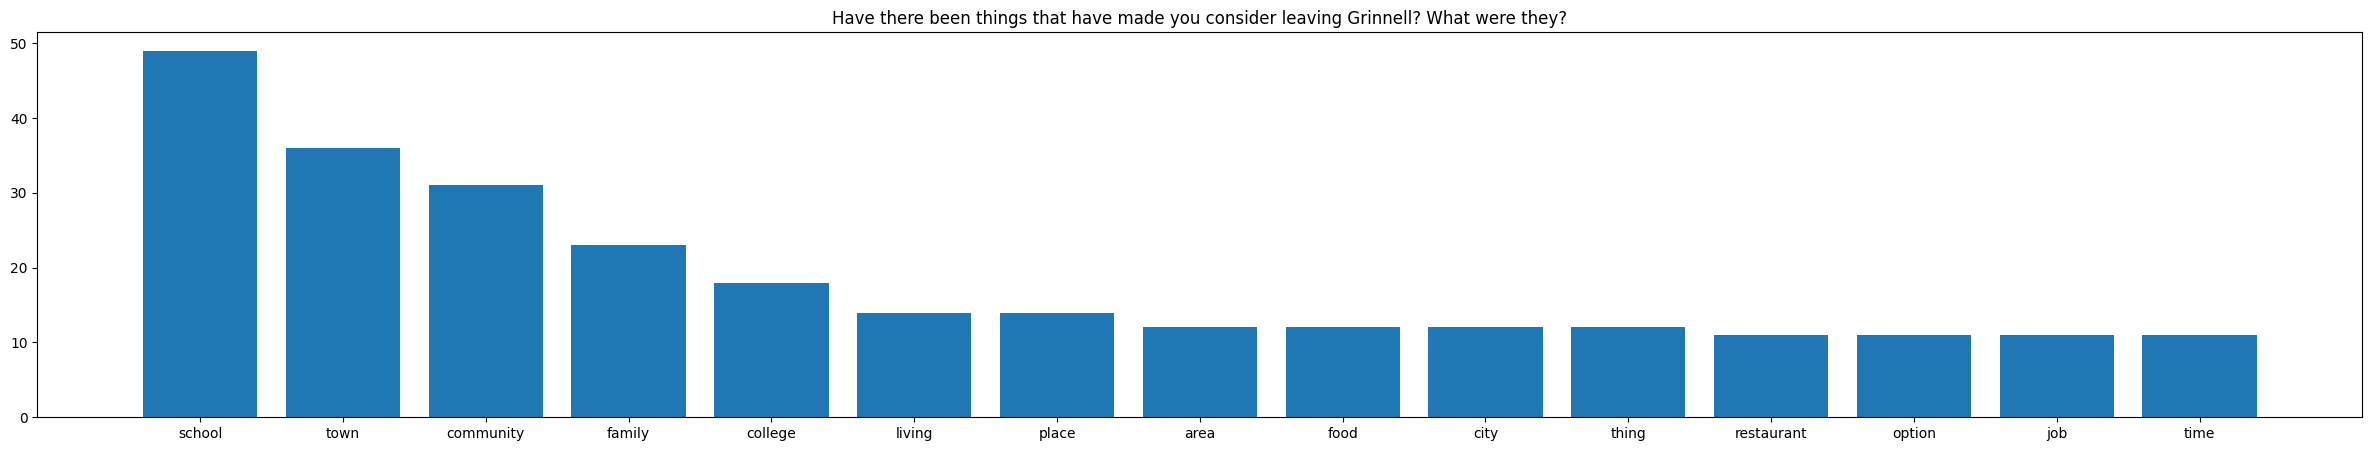

{'lack': 29, 'community': 28, 'restaurant': 26, 'option': 22, 'town': 16, 'school': 16, 'diversity': 13, 'food': 11, 'thing': 10, 'college': 10, 'activity': 9, 'housing': 8, 'variety': 8, 'opportunity': 7, 'shopping': 6, 'entertainment': 6, 'care': 6, 'resource': 6, 'place': 6, 'city': 6, 'store': 6, 'shop': 5, 'business': 5, 'quality': 5, 'access': 5, 'tax': 4, 'event': 4, 'downtown': 4, 'change': 4, 'water': 4, 'cost': 4, 'culture': 3, 'art': 3, 'child': 3, 'service': 3, 'car': 3, 'everyone': 3, 'family': 3, 'support': 3, 'student': 3, 'trail': 3, 'price': 3, 'career': 3, 'bond': 3, 'healthcare': 2, 'racism': 2, 'value': 2, 'part': 2, 'feel': 2, 'folk': 2, 'organization': 2, 'home': 2, 'appearance': 2, 'junk': 2, 'yard': 2, 'mind': 2, 'park': 2, 'divide': 2, 'amenity': 2, 'establishment': 2, 'member': 2, 'everybody': 2, 'lot': 2, 'road': 2, 'issue': 2, 'airport': 2, 'eat': 2, 'meeting': 2, 'antisemitism': 1, 'flags/other': 1, 'threat': 1, 'look': 1, 'course': 1, 'mask': 1, 'state': 1

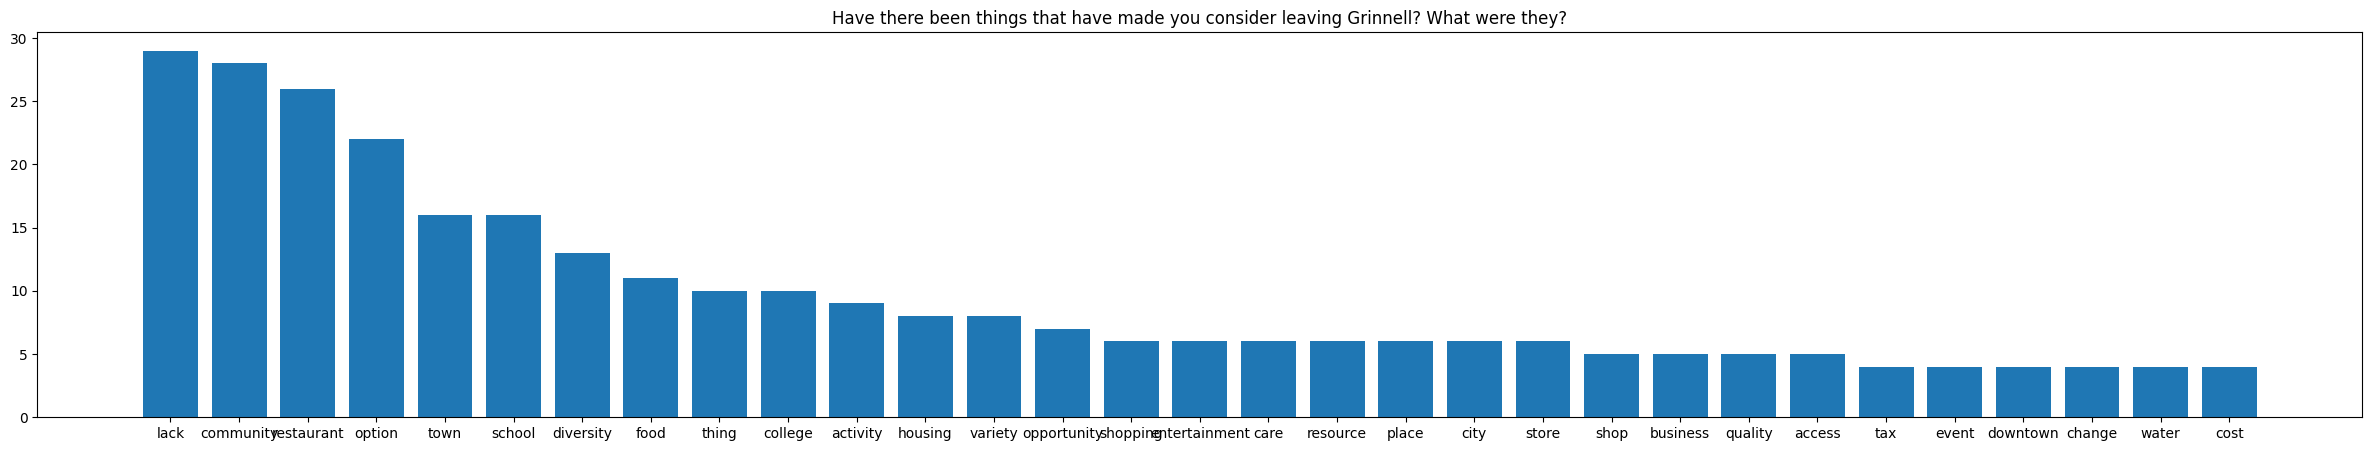

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

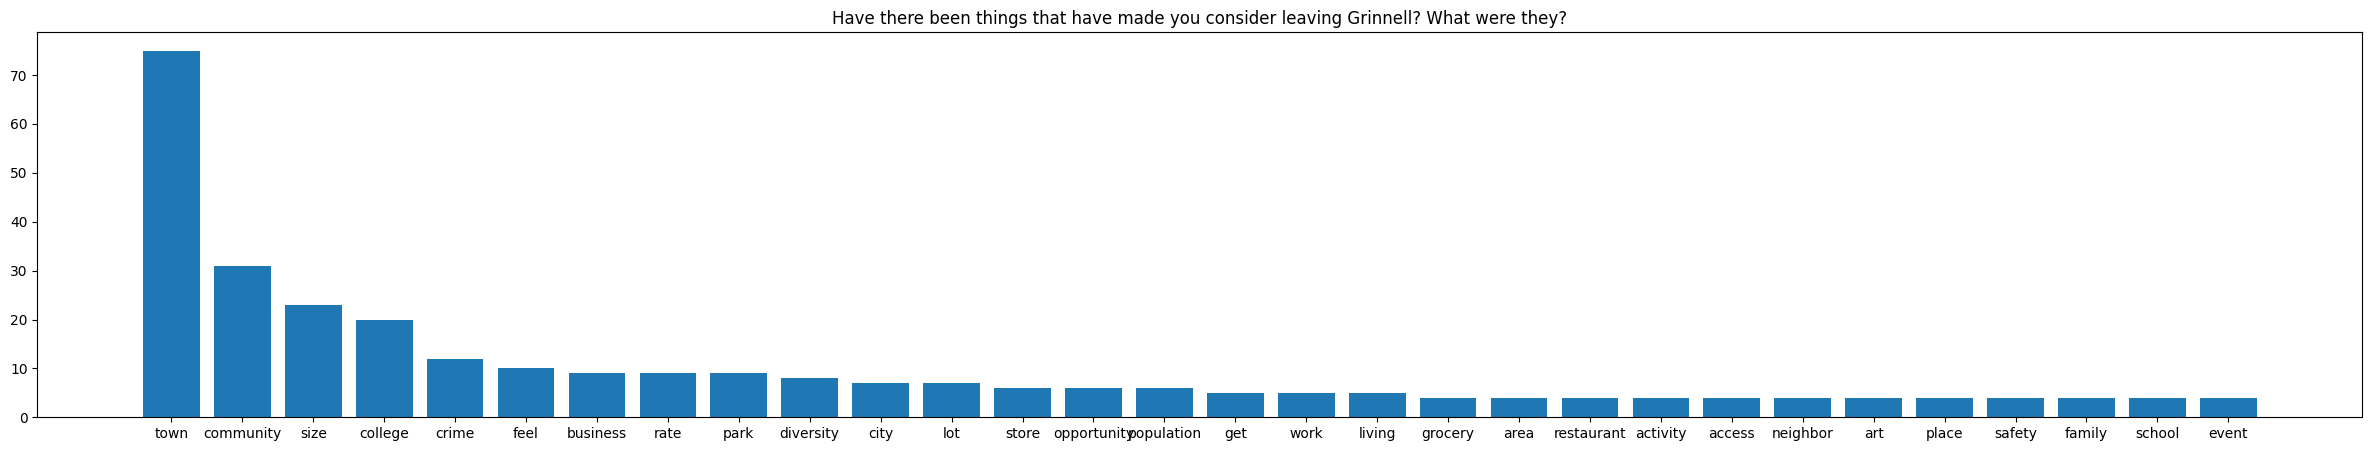

{'opportunity': 14, 'job': 7, 'family': 3, 'housing': 3, 'benefit': 2, 'cost': 2, 'option': 1, 'water': 1, 'person': 1, 'community': 1, 'voice': 1, 'way': 1, 'thing': 1, 'flexibility': 1, 'pay': 1, 'advancement': 1, 'field': 1, 'area': 1, 'time': 1, 'diversity': 1, 'discrimination': 1, 'work': 1, 'weather': 1, 'employment': 1, 'loss': 1, 'frustration': 1}


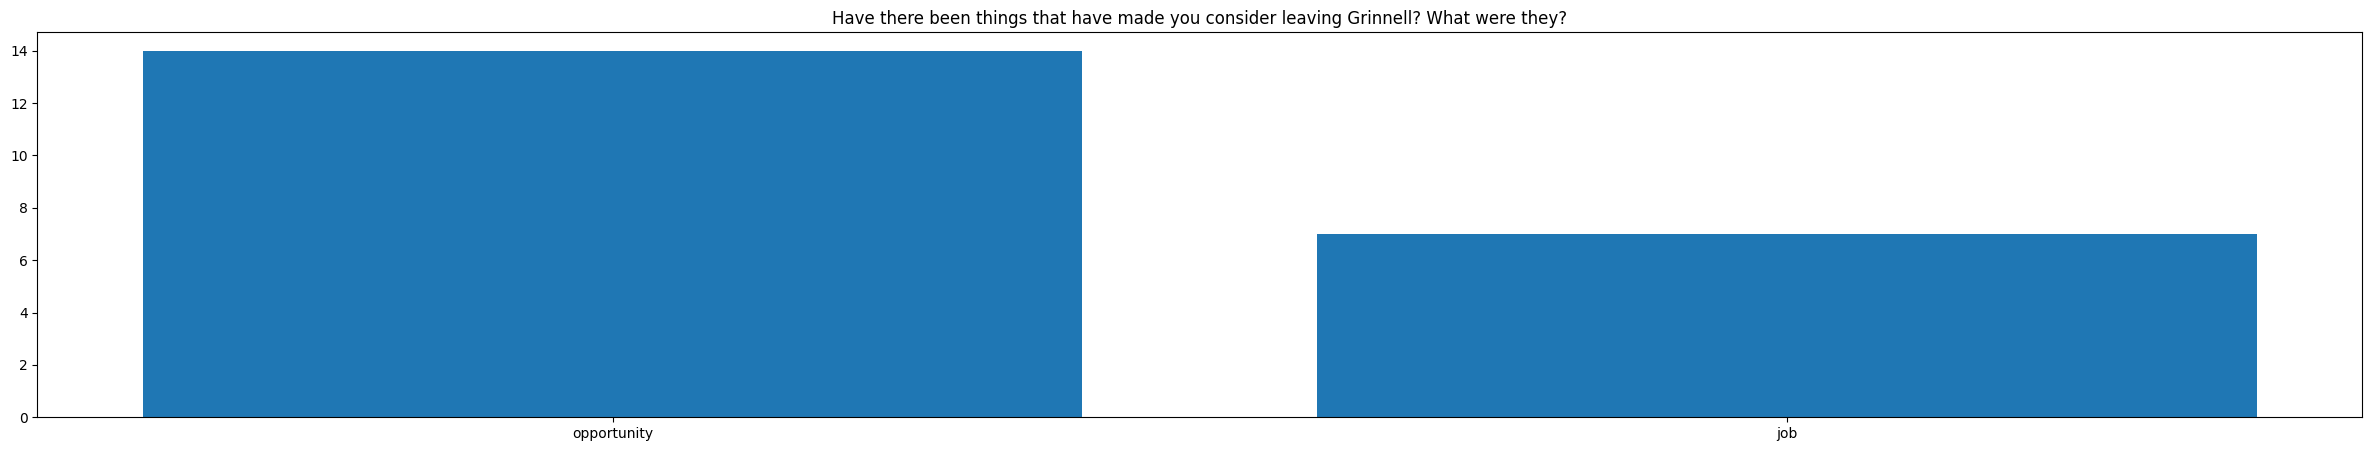

{'None': 3, 'none': 1}


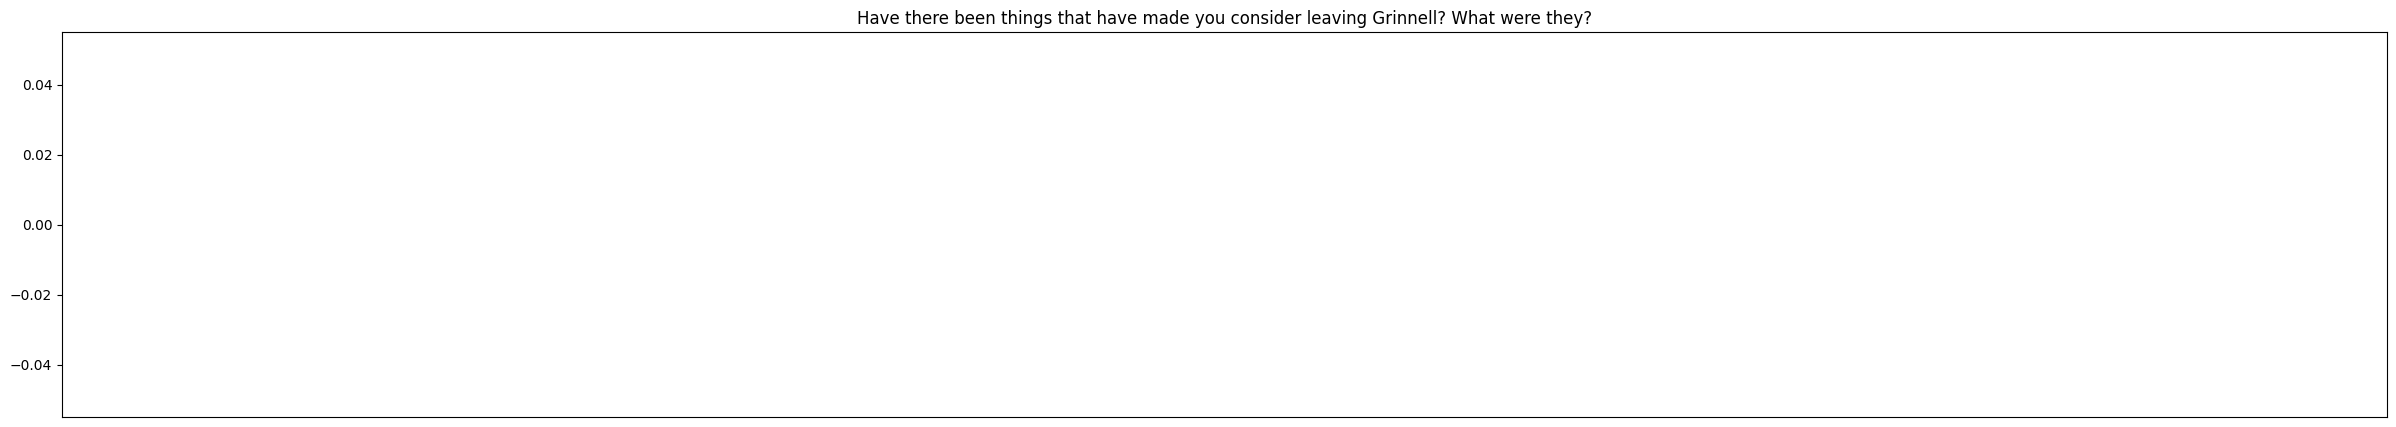

In [58]:
clustering7 = clustering(7)
k_clusters7 = clustering7[0]
print_clusters(k_clusters7)
clusters_noun(clustering7[1], "Have there been things that have made you consider leaving Grinnell? What were they?",  10)
clusters_noun(clustering7[2], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering7[3], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering7[4], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering7[5], "Have there been things that have made you consider leaving Grinnell? What were they?",  6)

# Question 8 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3:
[0, 1, 6, 8, 19, 20, 21, 24, 27, 30, 31, 32, 37, 46, 59, 61, 63, 65, 66, 74, 83, 86, 88, 90, 92, 93, 104, 105, 129, 133, 134, 135, 137, 140, 149, 170, 172, 174, 176, 177, 180, 182, 183, 185, 187, 188, 191, 195, 204, 207, 209, 224, 226, 236, 238, 240, 245, 254, 259, 265, 281, 283, 285, 287, 306, 322, 323, 324, 330, 345, 347, 348, 352, 355, 364, 368, 371, 373, 377, 384, 388, 389, 390, 394, 397, 399, 400, 402, 404, 406, 409, 413, 414]

Cluster 2:
[2, 7, 10, 11, 12, 14, 15, 16, 23, 26, 35, 36, 40, 41, 42, 43, 45, 51, 52, 54, 56, 58, 60, 67, 68, 69, 70, 71, 72, 73, 78, 80, 81, 84, 85, 91, 94, 97, 98, 99, 101, 102, 103, 107, 108, 109, 111, 112, 115, 116, 117, 120, 121, 122, 123, 124, 125, 127, 128, 130, 132, 136, 141, 143, 144, 147, 151, 153, 157, 159, 164, 165, 166, 167, 168, 169, 184, 186, 189, 190, 192, 194, 196, 199, 200, 201, 202, 203, 205, 211, 212, 213, 216, 217, 220, 225, 227, 228, 229, 230, 231, 233, 234, 239, 241, 242, 243, 246, 248, 249, 250, 251, 255, 256, 258, 260, 26

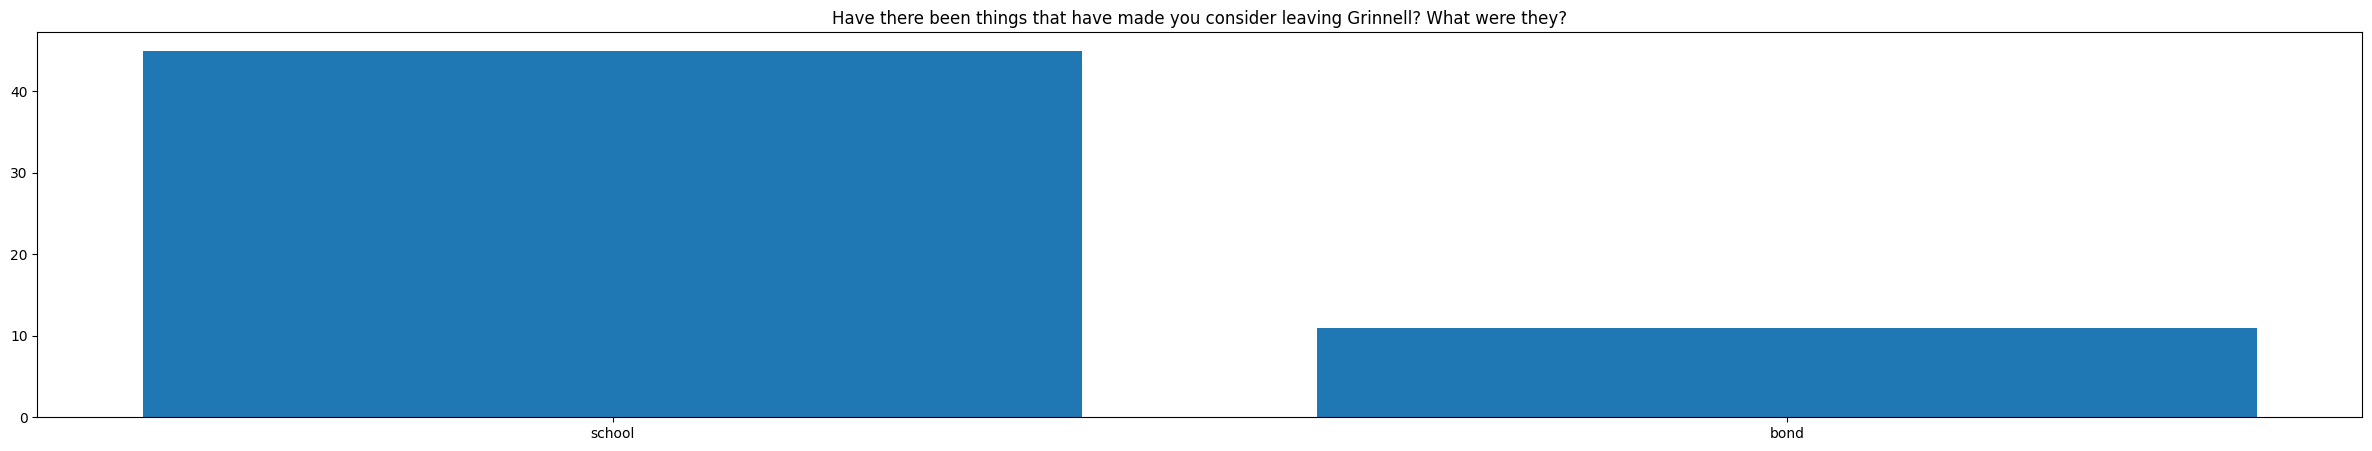

{'lack': 33, 'option': 26, 'food': 21, 'restaurant': 17, 'community': 13, 'place': 11, 'school': 8, 'thing': 8, 'family': 8, 'housing': 6, 'entertainment': 6, 'town': 6, 'support': 6, 'choice': 6, 'business': 6, 'variety': 5, 'city': 5, 'activity': 5, 'diversity': 5, 'college': 5, 'store': 4, 'number': 4, 'building': 4, 'event': 4, 'time': 3, 'childcare': 3, 'night': 3, 'care': 3, 'kid': 3, 'quality': 3, 'year': 3, 'job': 3, 'gas': 3, 'opportunity': 3, 'water': 3, 'improvement': 2, 'street': 2, 'sidewalk': 2, 'eat': 2, 'person': 2, 'culture': 2, 'child': 2, 'system': 2, 'development': 2, 'eating': 2, 'grocery': 2, 'transit': 2, 'retirement': 2, 'money': 2, 'suck': 2, 'interstate': 2, 'group': 2, 'maintenance': 2, 'lot': 2, 'station': 2, 'land': 2, 'festival': 2, 'issue': 2, 'weekend': 2, 'population': 2, 'program': 2, 'parade': 2, 'student': 2, 'infrastructure': 1, 'dine': 1, 'clothing': 1, 'repair': 1, 'neighborhood': 1, 'pizza': 1, 'antisemitism': 1, 'flags/other': 1, 'threat': 1, 'l

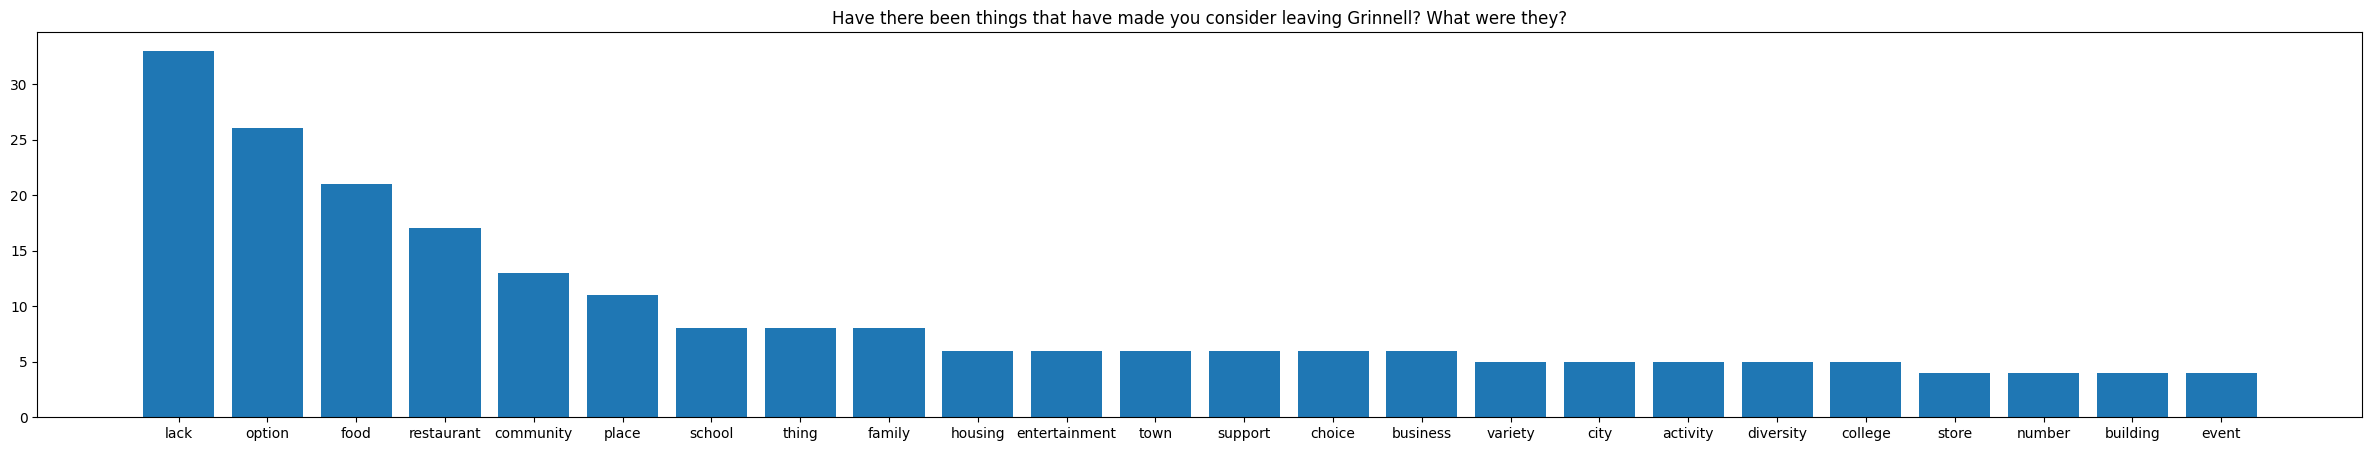

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

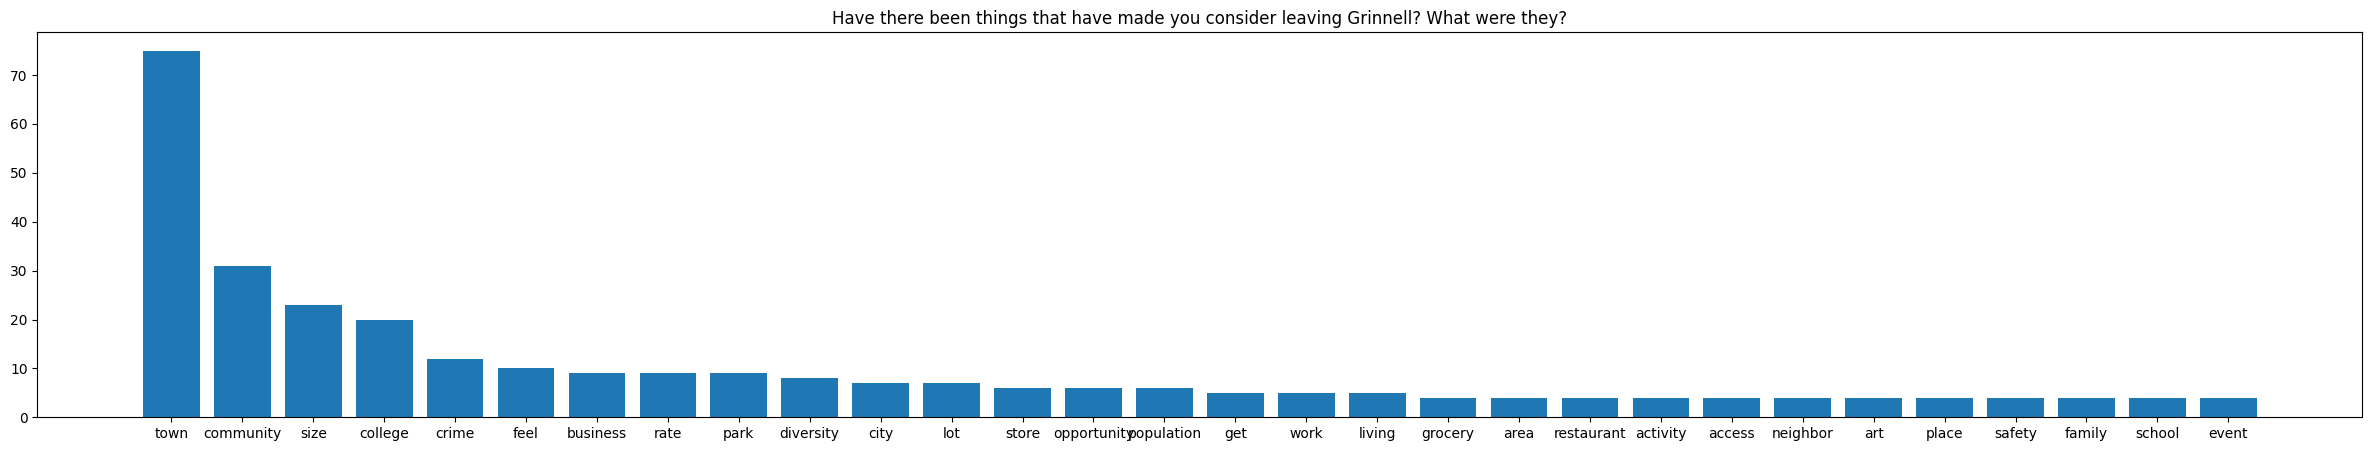

{'community': 81, 'college': 80, 'town': 59, 'school': 19, 'student': 19, 'place': 18, 'thing': 18, 'business': 17, 'restaurant': 15, 'member': 15, 'year': 14, 'family': 13, 'option': 13, 'tax': 12, 'city': 12, 'support': 11, 'sidewalk': 11, 'everyone': 10, 'issue': 10, 'event': 10, 'street': 10, 'property': 9, 'downtown': 9, 'lot': 9, 'lack': 9, 'change': 8, 'need': 8, 'food': 8, 'park': 8, 'money': 8, 'work': 8, 'house': 7, 'look': 7, 'way': 7, 'something': 7, 'housing': 7, 'sort': 6, '’': 6, 'time': 6, 'pool': 6, 'sign': 6, 'day': 6, 'part': 5, 'farm': 5, 'opportunity': 5, 'majority': 5, 'car': 5, 'professor': 5, 'value': 5, 'hour': 5, 'building': 5, 'child': 5, 'kid': 5, 'friend': 5, 'folk': 4, 'pay': 4, 'area': 4, 'safety': 4, 'number': 4, 'everything': 4, 'resident': 4, 'anything': 4, 'problem': 4, 'world': 4, 'crime': 4, 'get': 4, 'district': 4, 'term': 4, 'water': 4, 'road': 4, 'hangout': 4, 'someone': 3, 'concern': 3, 'income': 3, 'space': 3, 'struggle': 3, 'price': 3, 'policy

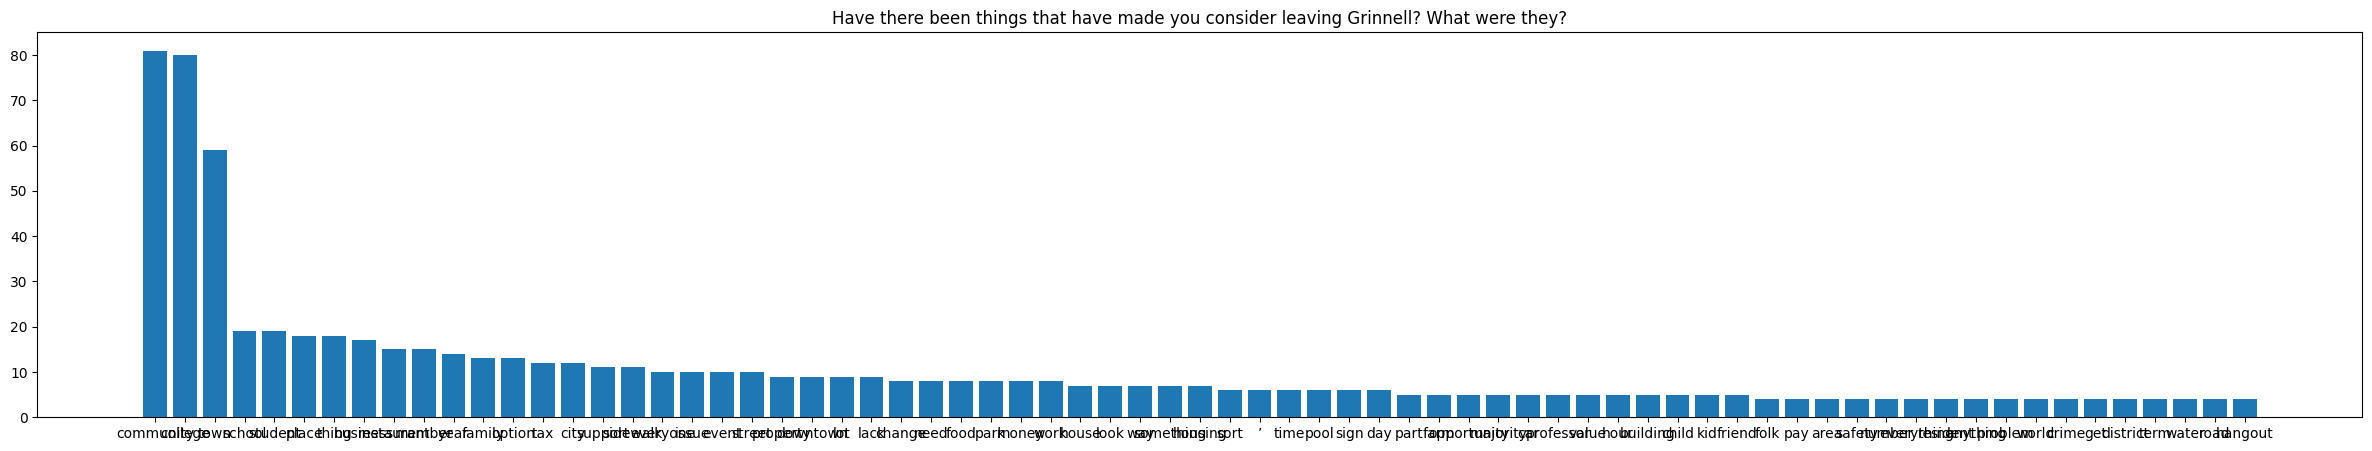

{'restaurant': 33, 'lack': 6, 'store': 6, 'town': 5, 'food': 5, 'choice': 4, 'thing': 4, 'loss': 3, 'business': 3, 'feel': 2, 'chain': 2, 'variety': 2, 'space': 2, 'option': 2, 'shop': 2, 'family': 2, 'diverse': 2, 'sit': 2, 'steakhouse': 2, 'night': 1, 'finer': 1, 'tax': 1, 'decent': 1, 'train': 1, 'community': 1, 'closing': 1, 'opening': 1, 'water': 1, 'value': 1, 'student': 1, 'traffic': 1, 'law': 1, 'walking': 1, 'feud': 1, 'gas': 1, 'station': 1, 'teen': 1, 'supply': 1, 'expensive': 1, 'protocol': 1, 'level': 1, 'le': 1, 'outdoor': 1, 'nothing': 1, 'fun': 1, 'activity': 1, 'lot': 1, 'place': 1, 'eat': 1, 'facility': 1, 'shopping': 1, 'year': 1, 'enough': 1, 'try': 1, 'source': 1, 'ingredient': 1, 'chemical': 1, 'agriculture': 1, 'frustration': 1, 'road': 1, 'building': 1, 'structure': 1, '’': 1, 'help': 1, 'entertainment': 1, 'need': 1, 'class': 1, 'resource': 1, 'time': 1, 'general': 1, 'kid': 1, 'age': 1, 'bring': 1, 'bar': 1, 'style': 1, 'menu': 1, 'patio': 1, 'reason': 1, 'som

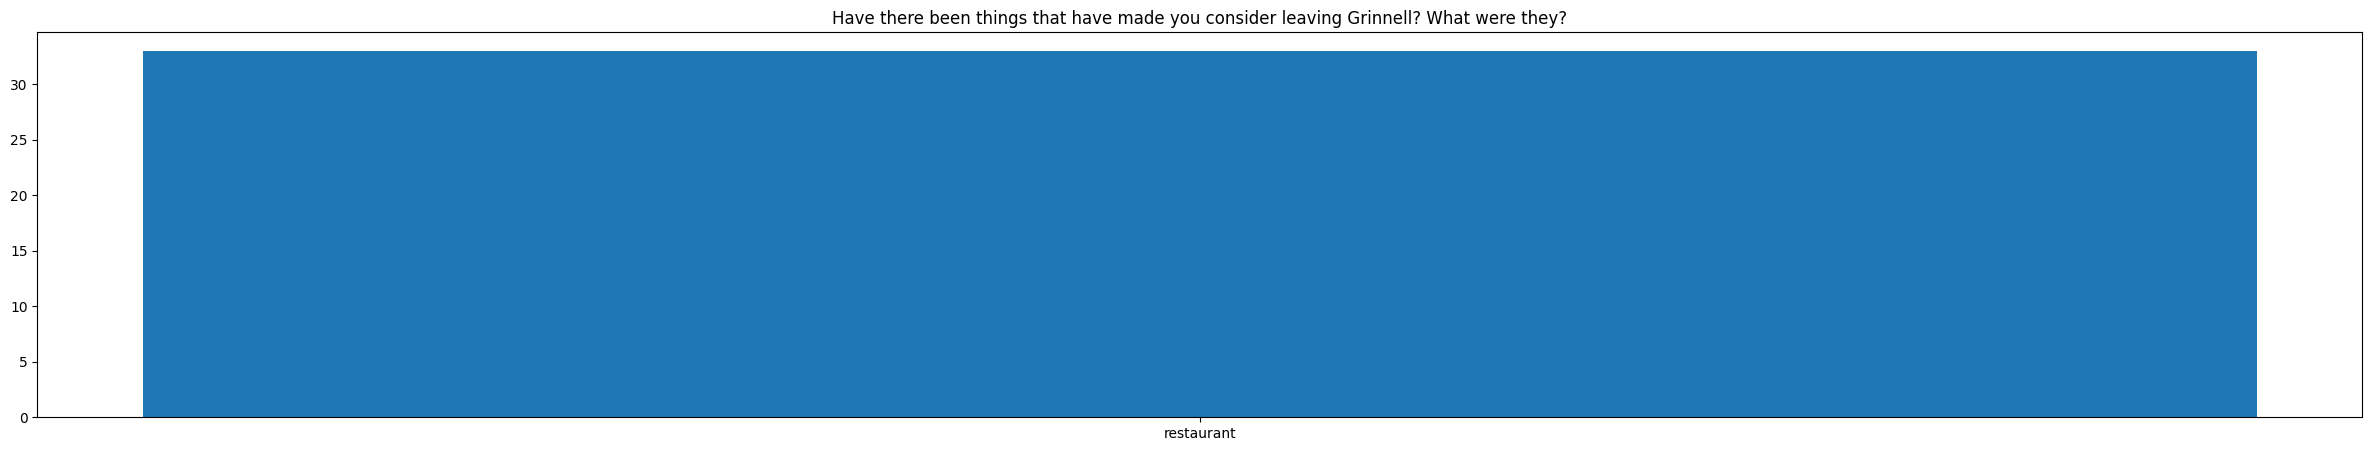

In [59]:
clustering8 = clustering(8)
k_clusters8 = clustering8[0]
print_clusters(k_clusters8)
clusters_noun(clustering8[1], "Have there been things that have made you consider leaving Grinnell? What were they?",  10)
clusters_noun(clustering8[2], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering8[3], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering8[4], "Have there been things that have made you consider leaving Grinnell? What were they?",  3)
clusters_noun(clustering8[5], "Have there been things that have made you consider leaving Grinnell? What were they?",  6)

# Question 9 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
[0, 2, 4, 8, 9, 15, 19, 25, 28, 31, 33, 35, 37, 39, 40, 42, 43, 44, 45, 51, 53, 55, 56, 58, 60, 64, 66, 68, 69, 71, 72, 73, 74, 75, 89, 97, 99, 100, 102, 105, 109, 113, 116, 117, 119, 121, 122, 124, 126, 128, 131, 132, 133, 134, 135, 137, 138, 142, 143, 154, 155, 162, 163, 167, 168, 175, 177, 178, 184, 188, 191, 193, 195, 198, 200, 201, 202, 203, 210, 212, 213, 214, 218, 219, 223, 224, 229, 230, 235, 237, 239, 240, 243, 247, 248, 251, 253, 254, 255, 257, 260, 261, 264, 267, 270, 271, 273, 274, 283, 284, 285, 286, 288, 291, 294, 295, 297, 301, 302, 305, 306, 310, 311, 324, 325, 330, 332, 333, 334, 337, 341, 343, 344, 347, 348, 350, 351, 353, 355, 356, 360, 361, 362, 365, 367, 369, 370, 373, 376, 377, 378]

Cluster 1:
[1, 7, 11, 12, 14, 16, 20, 21, 22, 27, 29, 30, 32, 36, 41, 46, 48, 54, 59, 61, 65, 70, 76, 77, 79, 83, 84, 85, 86, 88, 90, 91, 92, 93, 94, 104, 106, 107, 110, 111, 112, 114, 115, 118, 120, 123, 130, 141, 145, 147, 149, 151, 153, 158, 159, 160, 161, 164, 174, 176,

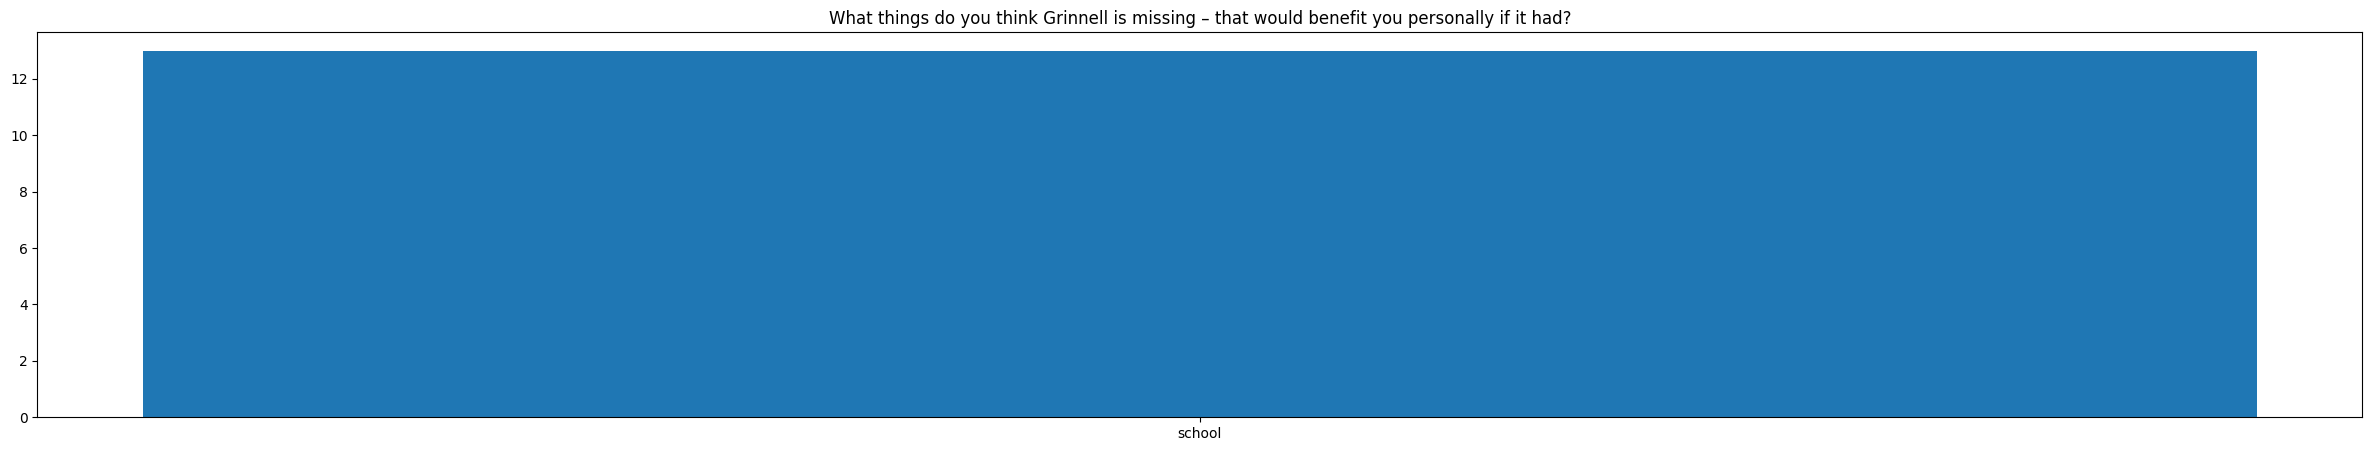

{'community': 57, 'place': 35, 'town': 31, 'thing': 22, 'park': 21, 'center': 20, 'time': 17, 'restaurant': 17, 'college': 17, 'food': 16, 'option': 14, 'area': 13, 'activity': 12, 'pool': 12, 'event': 12, 'space': 12, 'family': 11, 'student': 11, 'downtown': 10, 'year': 9, 'business': 9, 'something': 9, 'kid': 8, 'variety': 8, 'lot': 8, 'campus': 8, 'winter': 7, 'school': 7, 'building': 7, 'play': 6, 'eat': 6, 'service': 6, 'quality': 6, 'shop': 6, 'need': 6, 'work': 5, 'fun': 5, 'city': 5, 'bike': 5, 'tax': 5, 'money': 5, 'support': 4, 'child': 4, 'job': 4, 'transportation': 4, 'opportunity': 4, 'everyone': 4, 'recreation': 4, 'teen': 4, 'home': 4, 'system': 4, 'patient': 4, 'water': 4, 'path': 4, 'folk': 4, 'population': 4, 'size': 4, 'way': 4, 'part': 3, 'etc': 3, 'facility': 3, 'entertainment': 3, 'resource': 3, 'issue': 3, 'house': 3, 'life': 3, 'coffee': 3, 'environment': 3, 'get': 3, 'cost': 3, 'talk': 3, 'care': 3, 'month': 3, 'store': 3, 'hour': 3, 'lack': 3, 'example': 3, 'w

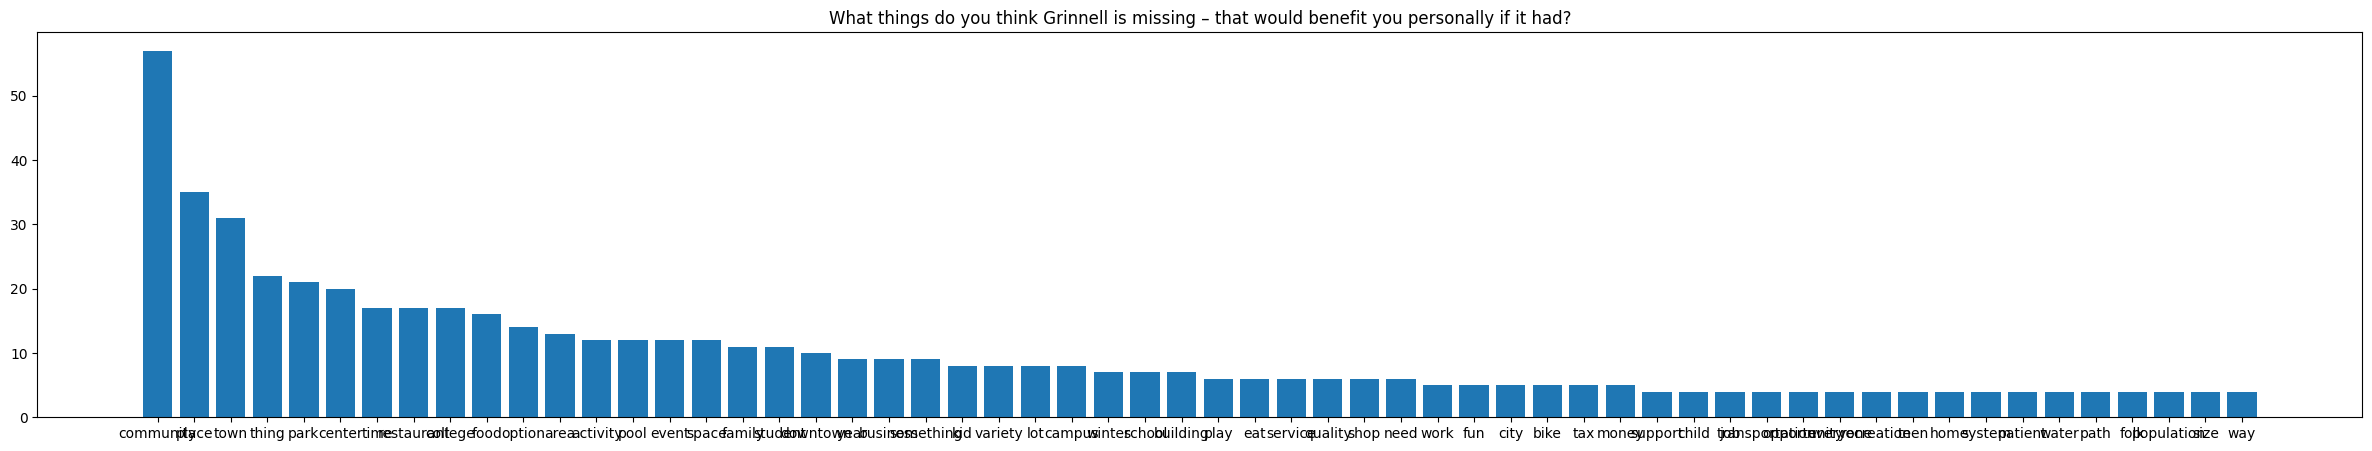

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

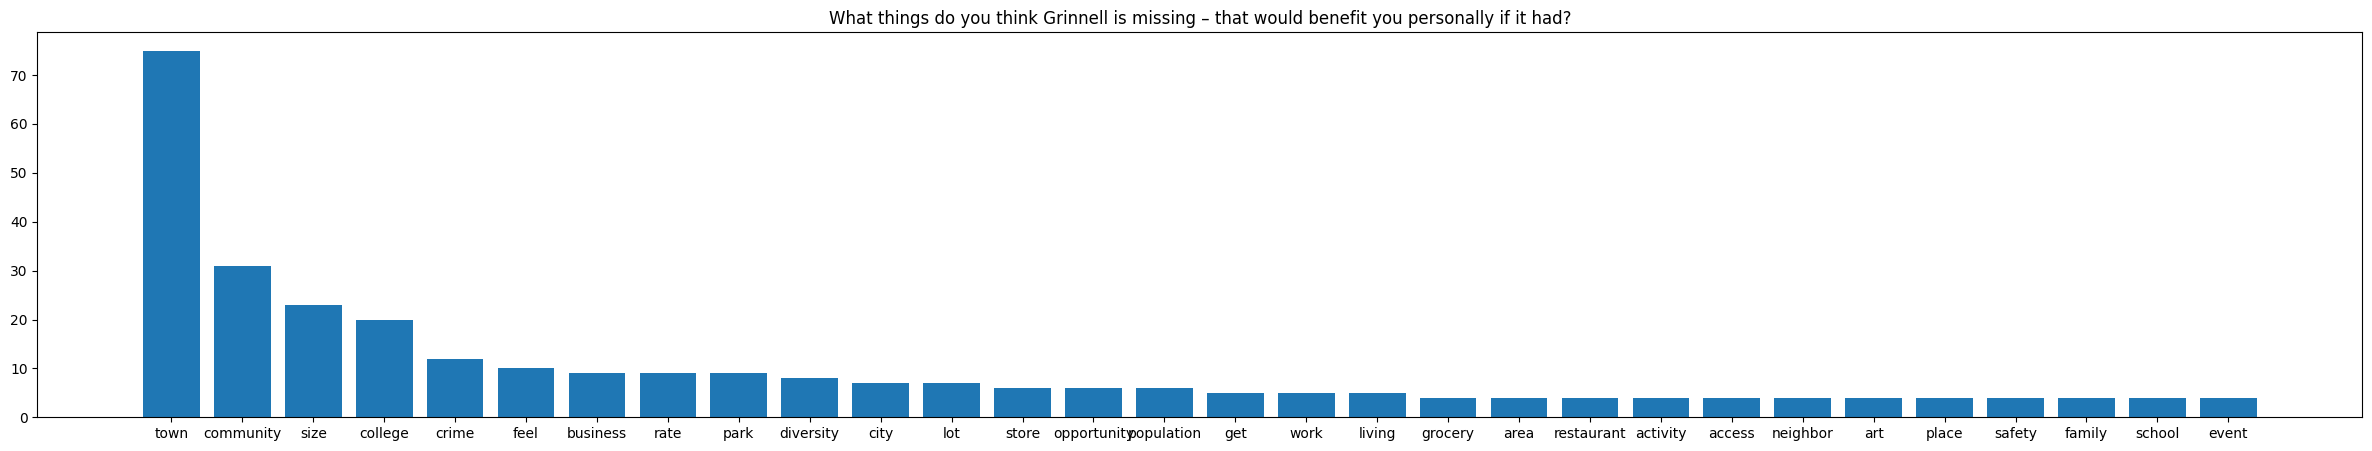

{'restaurant': 6, 'entertainment': 1}


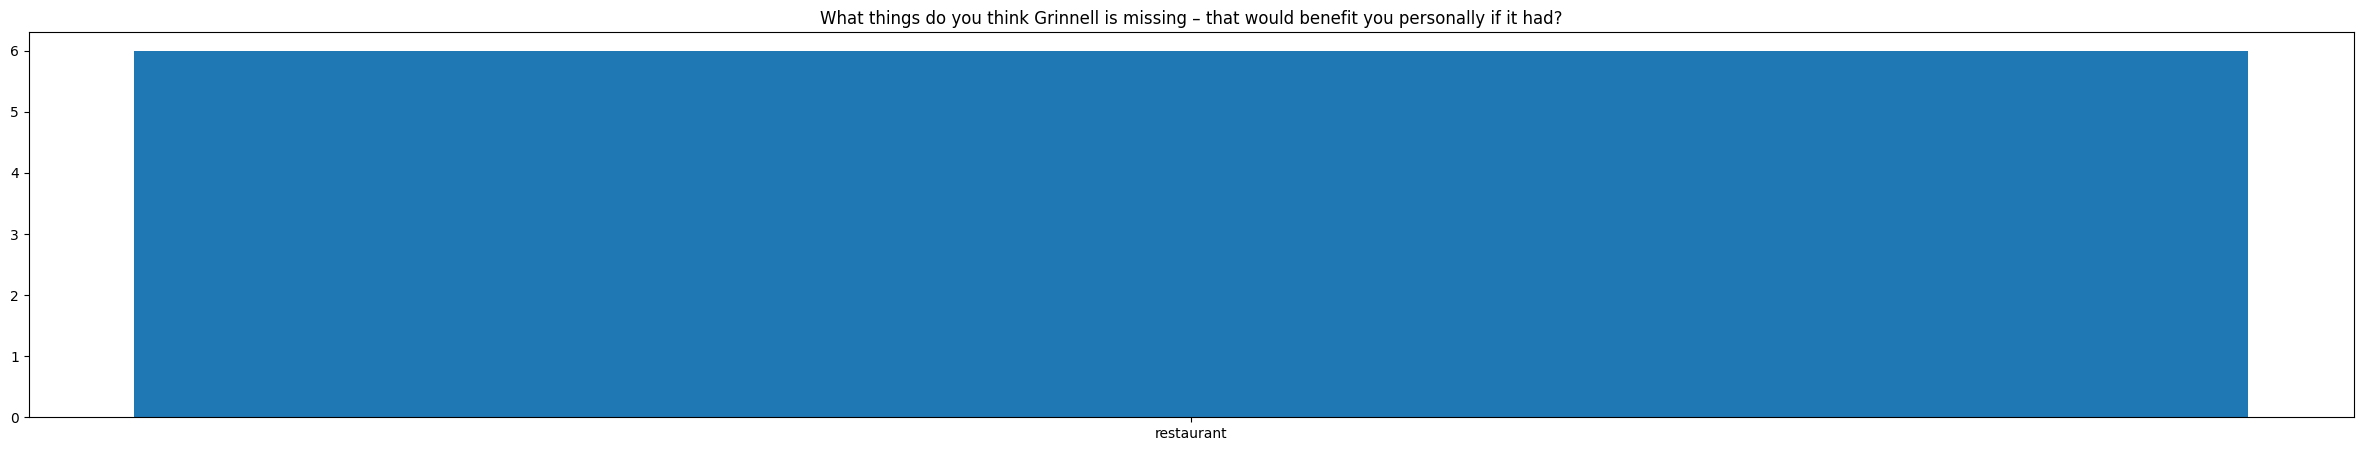

{'restaurant': 53, 'option': 25, 'food': 20, 'school': 12, 'place': 11, 'entertainment': 8, 'shopping': 6, 'community': 5, 'activity': 5, 'town': 5, 'opportunity': 4, 'thing': 4, 'center': 4, 'cuisine': 4, 'job': 3, 'building': 3, 'child': 3, 'chain': 3, 'facility': 3, 'diverse': 3, 'street': 2, 'court': 2, 'event': 2, 'park': 2, 'service': 2, 'housing': 2, 'kid': 2, 'bar': 2, 'coffee': 2, 'shop': 2, 'selection': 2, 'rec': 2, 'space': 2, 'mall': 2, '–': 2, 'variety': 2, 'hangout': 2, 'family': 2, 'choice': 2, 'TARGET': 1, 'location': 1, 'amenity': 1, 'retail': 1, 'fast': 1, 'hotels/conference': 1, 'year': 1, 'benefit': 1, 'shape': 1, 'district': 1, 'size': 1, 'care': 1, 'insufficient': 1, 'path': 1, 'recreation': 1, 'concert': 1, 'serve': 1, 'okay': 1, 'dining': 1, 'mention': 1, 'lack': 1, 'contractors/maintenance': 1, 'hang': 1, 'barbecue': 1, 'joint': 1, 'INTERESTING': 1, 'pho': 1, 'sushi': 1, 'grill': 1, 'type': 1, 'gallon': 1, 'mile': 1, 'read/meet': 1, 'friend': 1, 'yoga': 1, 'stu

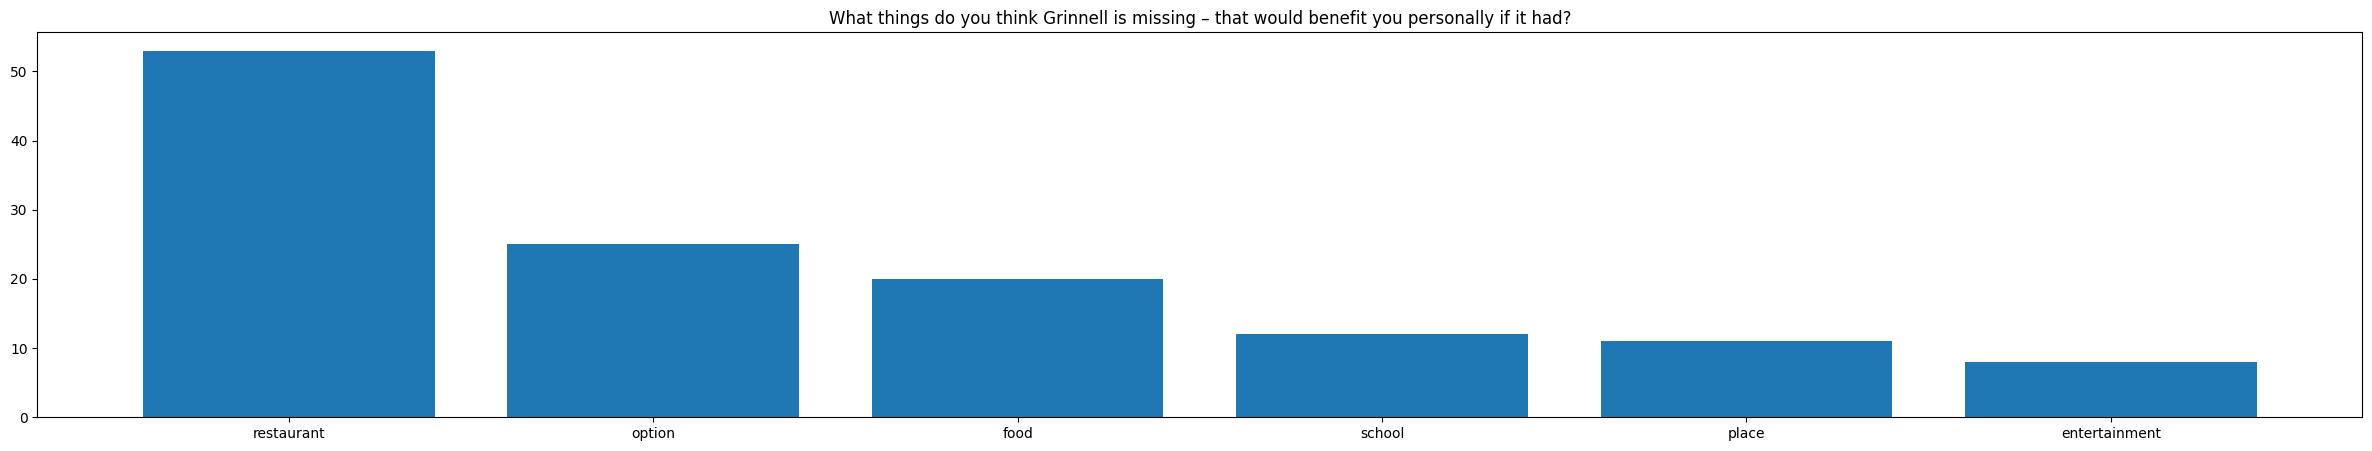

In [60]:
clustering9 = clustering(9)
k_clusters9 = clustering9[0]
print_clusters(k_clusters9)
clusters_noun(clustering9[1], "What things do you think Grinnell is missing – that would benefit you personally if it had?",  10)
clusters_noun(clustering9[2], "What things do you think Grinnell is missing – that would benefit you personally if it had?",  3)
clusters_noun(clustering9[3], "What things do you think Grinnell is missing – that would benefit you personally if it had?",  3)
clusters_noun(clustering9[4], "What things do you think Grinnell is missing – that would benefit you personally if it had?",  3)
clusters_noun(clustering9[5], "What things do you think Grinnell is missing – that would benefit you personally if it had?",  6)

# Question 11 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 3:
[0, 2, 4, 5, 6, 10, 11, 12, 13, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 49, 50, 51, 54, 56, 57, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 73, 74, 75, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111]

Cluster 1:
[1, 9, 16, 22, 47, 48, 55, 58, 63, 67, 102, 105]

Cluster 2:
[3, 7, 15, 35, 77, 92]

Cluster 4:
[8, 14, 20, 24, 34, 45, 46, 52, 53]

Cluster 0:
[42, 43, 44, 72, 80, 98]

{'job': 5, 'opportunity': 3, 'restaurant': 2, 'stuff': 1, 'variety': 1, 'schools-new': 1, 'building': 1, 'activity': 1, 'diversity': 1, 'space': 1}


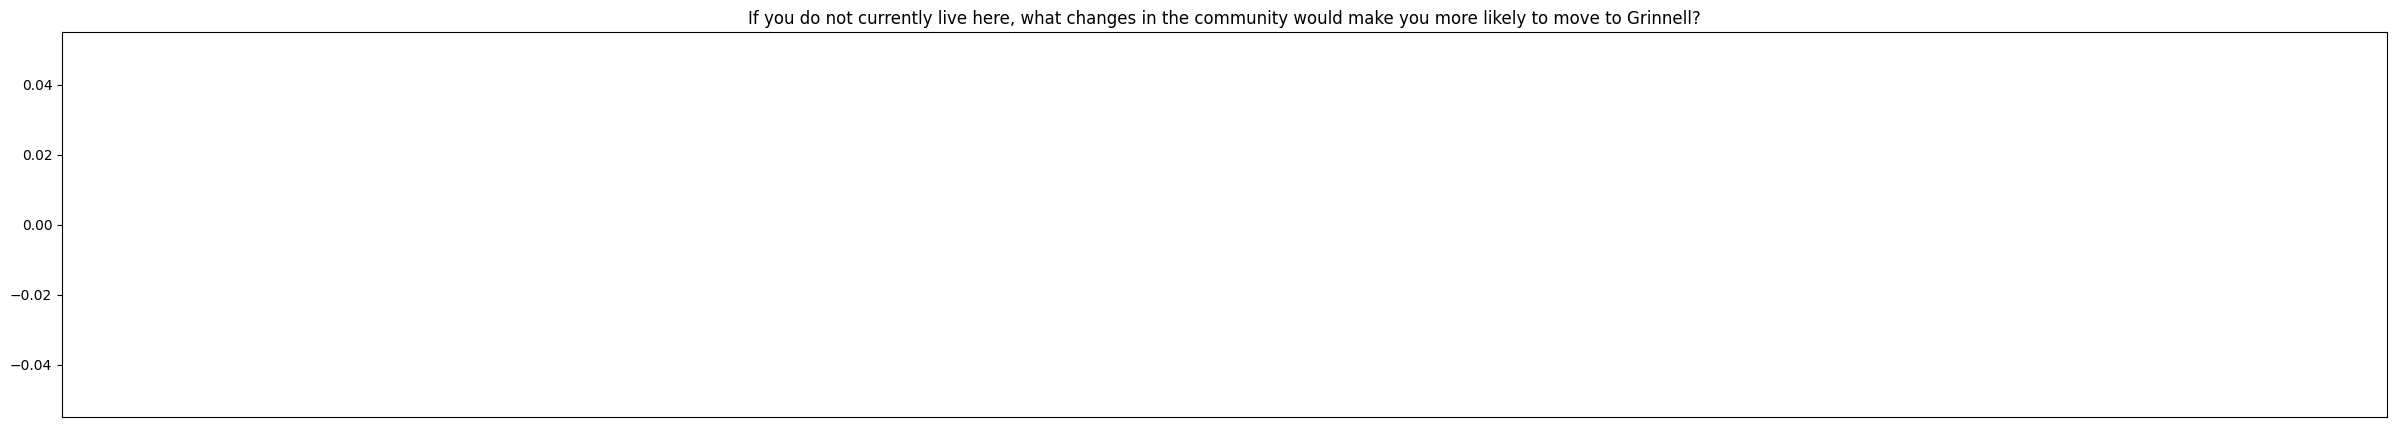

{'live': 2}


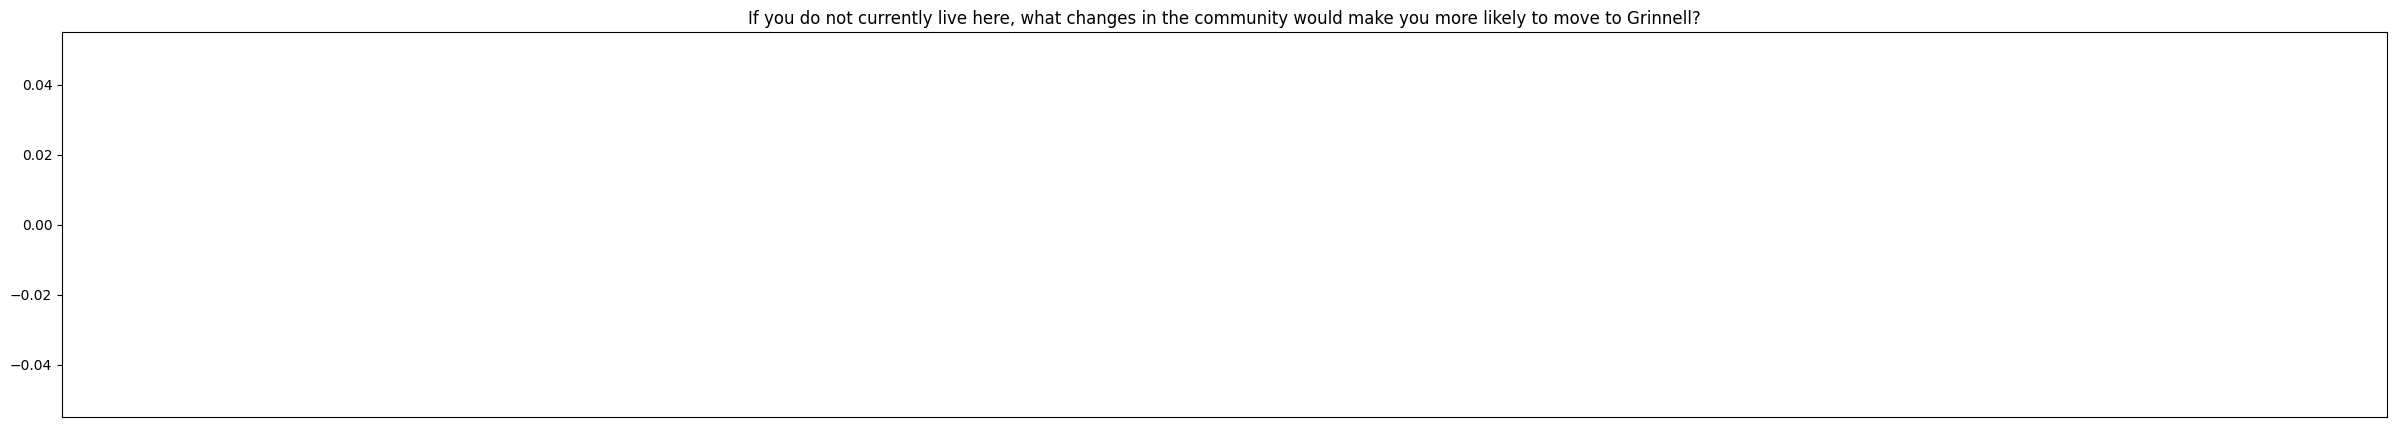

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

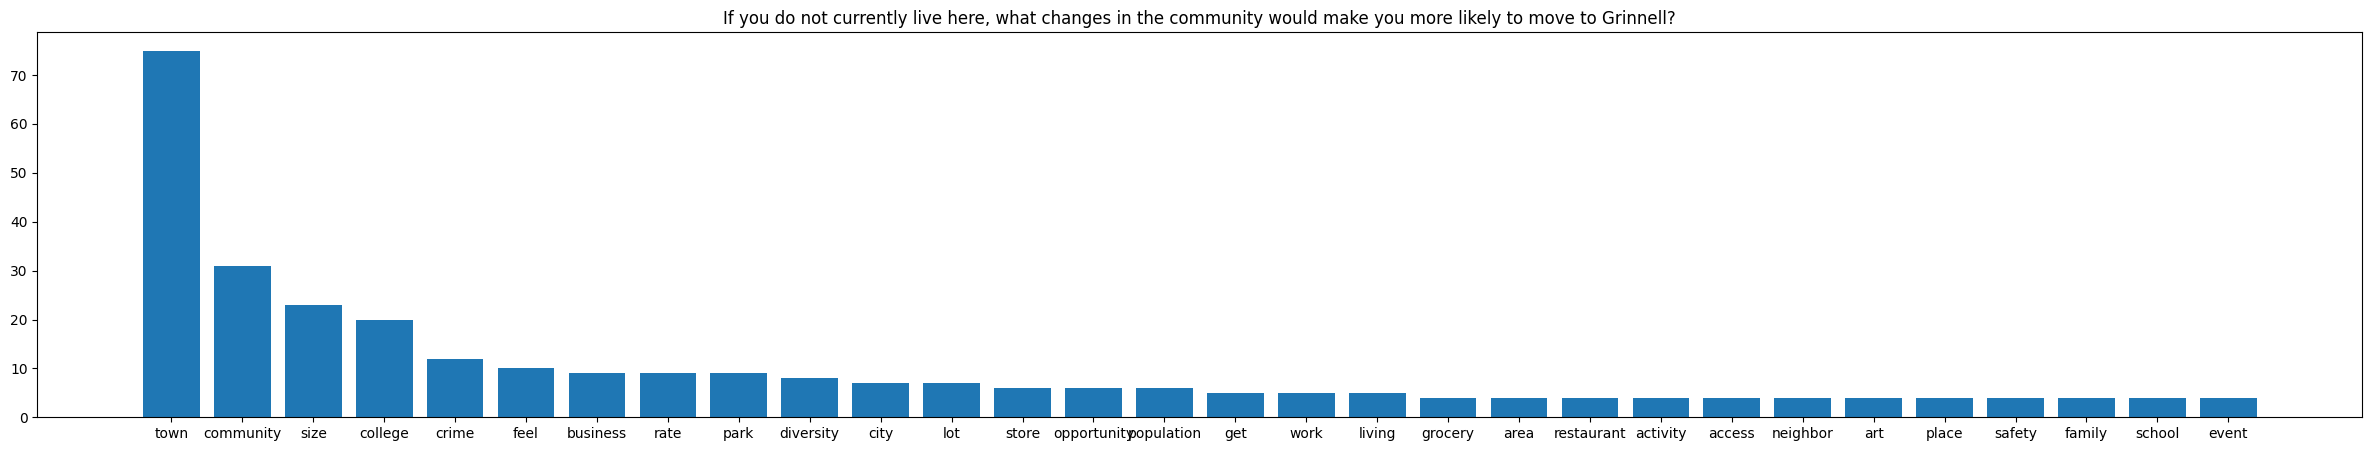

{'community': 9, 'school': 9, 'housing': 8, 'option': 7, 'restaurant': 7, 'store': 5, 'thing': 4, 'program': 4, 'year': 4, 'everything': 3, 'business': 3, 'attraction': 3, 'something': 3, 'price': 3, 'house': 3, 'change': 3, 'family': 2, 'income': 2, 'work': 2, 'form': 2, 'diversity': 2, 'event': 2, 'answer': 2, 'interest': 2, 'building': 2, 'college': 2, 'cost': 2, 'system': 2, 'kid': 2, 'job': 2, 'city': 2, 'limit': 2, 'education': 2, 'town': 2, 'center': 2, 'moving': 1, 'safety': 1, 'resource': 1, 'everyone': 1, 'workforce': 1, 'support': 1, 'parent': 1, 'hotel': 1, 'interstate': 1, '’': 1, 'make': 1, 'folk': 1, 'problem': 1, 'response': 1, 'comment': 1, 'racism': 1, 'addition': 1, 'activity': 1, 'apartment': 1, 'plaza': 1, 'venue': 1, 'land': 1, 'tidy': 1, 'Tourist': 1, 'inclusion': 1, 'individual': 1, 'convenience': 1, 'downtown': 1, 'etc': 1, 'pick': 1, 'water': 1, 'road': 1, 'relatability': 1, 'proximity': 1, 'fun': 1, 'offering': 1, 'class': 1, 'trade': 1, 'trail': 1, 'ft': 1, 

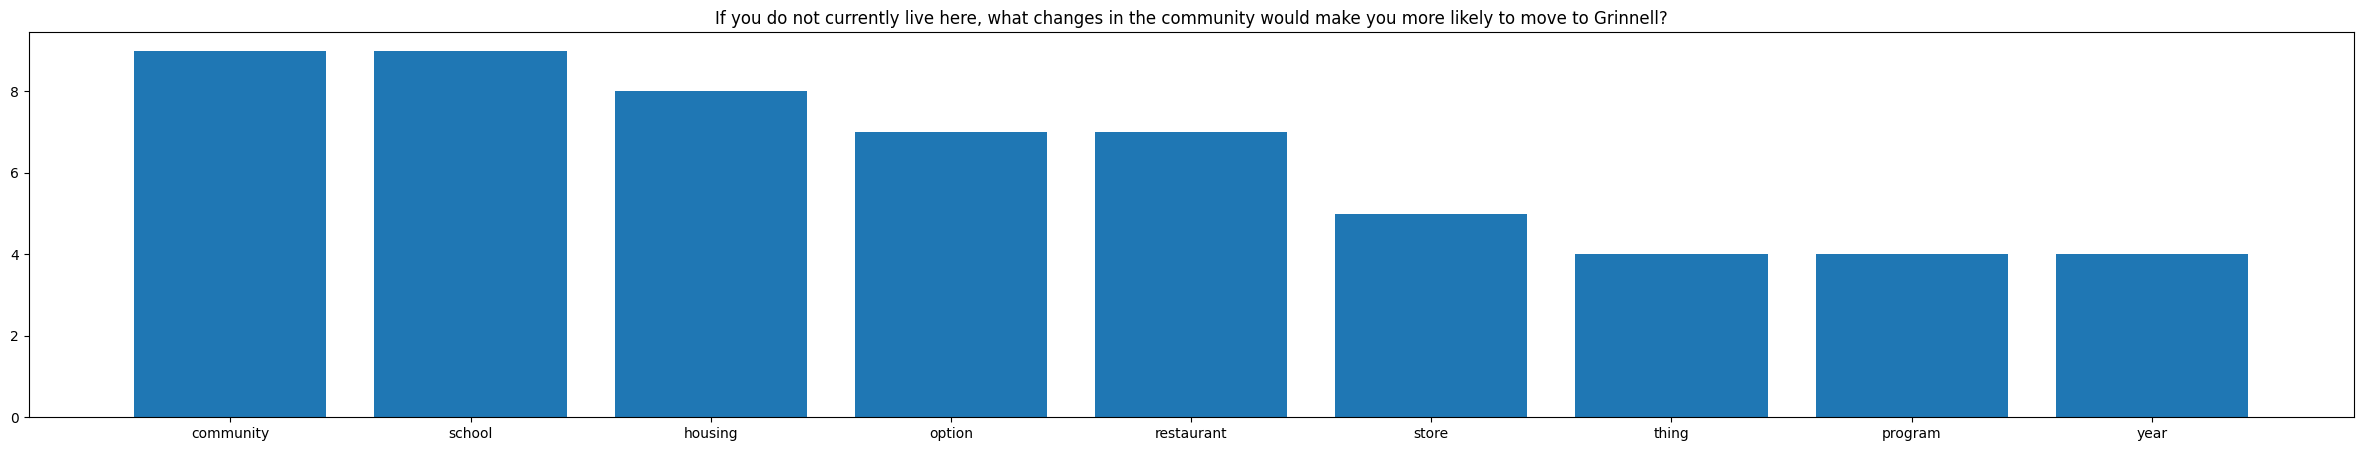

{'year': 1}


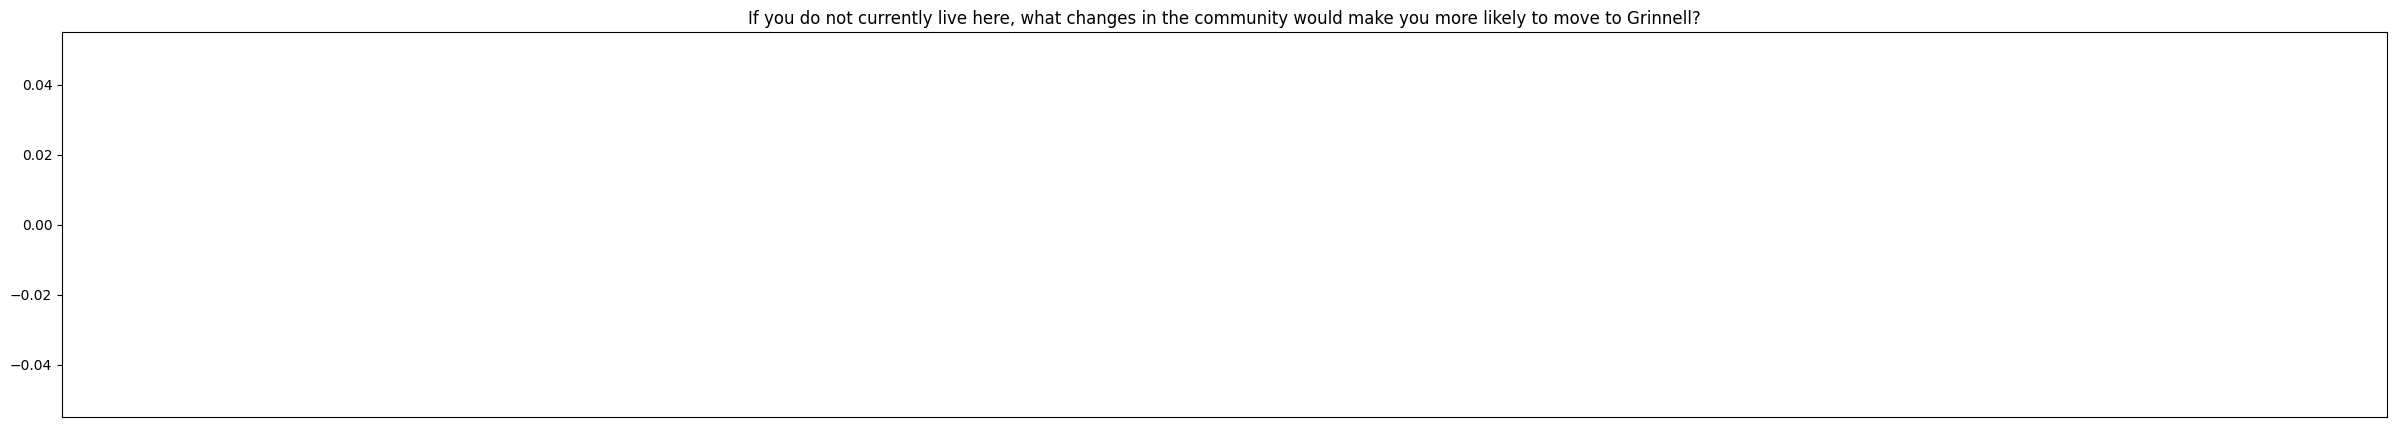

In [61]:
clustering11 = clustering(11)
k_clusters11 = clustering11[0]
print_clusters(k_clusters11)
clusters_noun(clustering11[1], "If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?",  10)
clusters_noun(clustering11[2], "If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?",  3)
clusters_noun(clustering11[3], "If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?",  3)
clusters_noun(clustering11[4], "If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?",  3)
clusters_noun(clustering11[5], "If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?",  6)